# Lens modeling with `lenstronomy`

GitHub page of `lenstronomy`: https://github.com/lenstronomy/lenstronomy

Documentation of `lenstronomy`: https://lenstronomy.readthedocs.io/en/latest/?badge=latest

Useful tutorials: https://github.com/lenstronomy/lenstronomy-tutorials 

In [2]:
# make sure lenstronomy is installed, otherwise install the latest pip version
try:
    import lenstronomy
except:
    !pip install lenstronomy

     ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 6.9/6.9 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 23.9/23.9 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 49.5/49.5 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing m

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cirq-core 1.1.0 requires networkx~=2.4, but you have networkx 3.1 which is incompatible.
classiq 0.22.0 requires networkx<3.0.0,>=2.5.1, but you have networkx 3.1 which is incompatible.
pyquil 3.5.0 requires networkx<3.0,>=2.5, but you have networkx 3.1 which is incompatible.
qctrl-commons 17.13.0 requires networkx==2.7.0; python_version >= "3.8" and python_version < "3.12", but you have networkx 3.1 which is incompatible.
qctrl-commons 17.13.0 requires scipy>=1.9.3; python_version >= "3.8" and python_version < "3.12", but you have scipy 1.9.1 which is incompatible.


In [3]:
# import of standard python libraries
import lenstronomy
import numpy as np
import corner
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

## Load imaging data

The data and the PSF needs to be provided to `lenstronomy` using the
dictionaries `kwargs_data` and `kwargs_psf`.

In `kwargs_data`, we also need to proivde information on the noise level.
Either the pixel-wise noise map can be provided using the `noise_map`
keyword, or simply the `exposure_time` and `background_rms` can be provided
for `lenstronomy` to create the noise map by itself.

The keywords `ra_at_xy_0` and `dec_at_xy_0` are the RA and Declination in
arcsecond units at the (0, 0) pixel. The keyword `transform_pix2angle` is
the transformation matrix from pixel number coordinates to (RA, Decl.).
These keywords are used to convert pixel coordinates to RA and Decl.
coordinates. If you want to convert one 2D coordinate system to another, you
 will need to the offset between the zeropoints of two coordinate systems
 and transformation matrix that specifies the scaling and rotation of the
 axes. So, the keywords `ra_at_xy_0` and `dec_at_xy_0` specify the zeropoint
  offsets, and `transform_pix2angle` is the tansformation matrix specifying
  scaling and rotation.

For the first example of lensing data, no PSF was used to create the data.
Therefore, `psf_type` is set to `NONE`. For real data, there has to be a PSF
. We will work with PSFs in later examples.

In [5]:
data = '''-6.212699811186230825e-01 1.746510972845403131e+00 2.929101077590933189e-01 2.491278335152005696e-02 -7.866070255264145938e-01 1.104311406888252245e+00 7.208359624861006010e-01 -6.836572033548864447e-01 1.516358426776629686e+00 -1.593798168972889950e+00 9.011442891702979852e-01 -3.414991467012429283e-01 1.007296047571571540e+00 3.860961860637954213e-02 -2.623163678226840267e-01 8.115226197905881511e-01 8.749947240267410553e-01 1.113336558358273498e+00 2.450226331530954704e-01 1.430837219921935466e+00 1.500289112435376326e+00 4.221770949552917651e-01 -1.596125920265905718e+00 2.221903653832010495e+00 -8.179059957317842411e-01 1.933522870813056960e+00 2.380471975769077986e+00 -5.222861175206678919e-01 8.891724531657142494e-01 -8.382211555816271309e-01 1.480148384267587991e+00 1.017989819553367425e+00 6.302615711154382350e-01 1.303616100795763622e+00 -2.847037788339090714e-01 7.385490983729546821e-01 5.088414860257817196e-01 -2.891271672435865581e-01 1.259416654869388807e+00 2.998845552707192774e-01 -8.531624459121441850e-01 2.268908177665352466e-01 1.458146458627752828e+00 -6.356524233831256643e-01 -1.172821806578827619e-02 6.794361278292422313e-01 -1.324021646107769179e+00 1.469965588643430410e-01 1.115079398216499929e+00 6.139502319109498840e-01 1.181623129777995995e+00 -6.554375283723712364e-03 1.450212545979091550e+00 -4.778034754982031784e-01 1.052734274607209475e+00 -5.941793590279618176e-01 -4.732351385189987325e-01 1.472154003450310666e+00 -3.470572463491921056e-01 -8.456988899891162426e-01 1.134415904882708048e+00 -8.823224406393137542e-01 -1.055904862769627250e+00 2.883353722124860075e-01 3.752261006816628996e-01 7.321233352402218841e-01 1.080536928793706553e+00 -1.183113000013733096e+00 2.560176028398784887e+00 -3.094707209836180528e-01 1.333523572581139183e+00 -2.212785762434203995e-01 6.810661863495935942e-01 1.037804409292035324e+00 -9.255969969229737027e-01 -1.204487311473089184e+00 4.939186881592103062e-02 2.545233695622306058e+00 6.397562056624922500e-02 -1.391719435809737782e+00 -3.055663263829773157e-01 9.863509387901736591e-01 7.022750012580463164e-01 1.975434741578710129e+00 -4.463762408294186246e-02 -9.150747647565016241e-02 8.630366115944505534e-01 -4.690987460724643232e-01 -8.468550016760442722e-02 3.728389415545906305e-01 -1.920230041062456205e-01 -1.268983014641698326e-01 8.360111510967292991e-01 -1.586168630494402543e-01 -3.412839267942602284e-01 1.773748671250753306e-01 -1.568832535536038020e-01 2.519049779516234766e-01 -5.103349607161317136e-01 7.978128224303199234e-02
-3.683057747220034317e-01 -1.262176846139680286e+00 -4.906237029544549544e-02 -1.621431476166266039e+00 -1.211142003773306941e+00 -3.675337043006223769e-01 1.138977254659578442e+00 7.962740655704219073e-01 -7.129294364657237093e-01 -9.830859630370281099e-01 -1.550578721344255007e+00 -3.070779855580068052e-01 -3.971861974925057770e-01 -2.260454914177662533e-01 7.148632694772157903e-01 1.334076032041219495e+00 8.196888419694509098e-02 -3.012593949694357676e-01 -1.022876620365757105e+00 1.043268757784659106e+00 1.960485574518915919e-01 7.936407498213413625e-01 1.925934496363291171e+00 -1.304679473040495141e+00 7.832335383735494760e-02 2.339714922739753344e+00 -1.723480521439386126e-01 7.054947176419748001e-01 -9.579787328590931850e-01 8.861985385312298735e-01 -3.715016148197995971e-01 6.721820763626048523e-01 5.224884864012854235e-01 6.826212149824002484e-01 -4.441657719876779264e-02 -2.718227401482301575e-01 2.167067353224052972e+00 1.873724000257822375e+00 -3.122216669977977421e-01 5.457946864451865832e-01 4.500333631237350418e-01 -2.211043643158324024e+00 2.197370123146539456e+00 3.531897151730499118e+00 1.980449781353850192e+00 5.985224102383350786e-01 1.916026765794101028e+00 7.705667938965607977e-01 8.957710619844899691e-01 1.237126182158282628e+00 -4.305549492093457831e-01 1.495904451448546002e+00 2.056323875138843515e+00 3.276432211680516127e-01 2.218605490703635663e+00 1.550703632740812132e+00 -3.478718797974864607e-01 4.919771688961290801e-01 -2.967115354258242910e-01 9.351800839687205436e-01 -9.559185601426140044e-02 1.237543258627308740e+00 2.361444869927348811e-01 9.803868044632388923e-01 1.815870756892427940e+00 -1.683854238896795197e+00 2.379077782465801039e-01 6.597452217907981975e-01 4.176100697130541439e-01 1.630215792130826902e+00 -6.519796701612943224e-01 4.900406982337403572e-01 1.721174971855201186e+00 6.606710634387300551e-01 -4.104307846667648585e-01 -4.143009627141098772e-01 2.526036228327570576e-01 -3.659718880876751679e-01 -4.043227658362715804e-01 -6.615494542141129308e-01 -8.369788330615736127e-01 -5.862356646689794726e-01 8.644440111069554011e-02 1.123073846754490068e+00 -4.153310559055437001e-02 4.678433545451368136e-01 2.039427589229718674e-01 -1.318228082683476687e+00 -7.851556559728909424e-01 -4.863419162996381884e-01 -9.371545051942125060e-01 6.896430421780809228e-01 9.897066023440725946e-02 5.127979709995312829e-01 2.338628571529026701e-01 8.107242413813835480e-01 1.447696502398564955e-01 1.016565077676762074e-01 1.605489986573634953e+00 -7.837760155284492214e-01
-1.951406347259309615e-01 -3.195438819999347757e-01 1.559106635831726706e+00 -1.379209689616126333e+00 2.941738546684278255e-01 1.281685585431398433e+00 1.880954263899882184e+00 -1.181721292496472620e+00 1.620634496637750055e-01 6.966326010738257413e-01 -1.083668088395642604e-01 3.994160515693307989e-01 1.308362228919358827e+00 -2.926904330312163904e-01 2.762572012371362629e-01 -2.189968638701311754e-02 8.189465500067698578e-01 4.149511570993877352e-01 1.129778640305112436e+00 -9.167061390557080802e-01 1.673997149474565571e+00 1.186847790934447922e+00 -4.835170109140028427e-01 -7.695302782089621374e-01 4.771257757422950330e-01 -2.575546389904058153e-01 -1.110737735246433822e+00 -7.549963440497974299e-01 -5.963435065049886852e-01 -7.683311087128619210e-02 1.669685859348493562e+00 1.241748901822312234e+00 -4.523460753341648211e-01 1.789626634506261027e+00 3.193647614009485824e+00 6.053796241428621716e-01 6.650232982416182104e-03 3.228808590026610581e-01 -2.723436793130311617e-01 3.974279745145161691e-01 2.353245216031480069e+00 1.457069675669971698e+00 2.664097586969555564e+00 1.304750784027471244e+00 -6.770497072899211988e-01 -1.260762219037292464e+00 8.839102582472875280e-01 6.100150222436009351e-01 6.263067723085422589e-01 5.559476588161098576e-01 6.991439309538973745e-01 3.622689068815827529e-01 1.033679408475186801e+00 9.179805479658509348e-01 1.589110017532186503e-01 -6.278403844706954562e-01 2.695646931310844430e-01 8.053038528192788537e-01 9.680583550142478622e-01 2.493702583686714824e+00 1.341581546081241028e+00 6.819868722031713348e-01 1.595668815773401805e+00 8.794742306780581886e-01 1.518453419461770260e+00 2.358574194914664912e-01 5.999009958276124710e-03 -1.093417781566889513e+00 1.522461560641525491e+00 1.020657208657253512e-01 -1.729511334573223258e-01 1.935185353076849690e+00 -1.591678842215599632e+00 -8.188107492855481451e-02 2.694408113241624769e-01 5.112708796121607779e-01 8.688577207822305581e-01 5.077969003470004239e-01 -7.089202770604438597e-02 -1.913730833766198458e+00 -5.816373956999068007e-01 7.161768210693528758e-01 2.915116077460561117e-03 -8.097709767768710432e-01 1.245697293372940995e-01 -9.837118697135829315e-01 -5.353593303156150007e-01 1.968570633615306820e+00 3.847466263913816298e-01 2.838163863615363047e-02 7.422350918471446457e-01 1.846212280881629475e-01 8.222484887187252456e-01 -7.716487395850391007e-01 5.981720310418401354e-01 1.826326754465557867e-01 1.012600948585172800e+00 3.929521662714173247e-01 -3.497347191350569373e-02 1.232009675887881656e-01
-4.225754033715305447e-01 1.201116662339350327e+00 3.084933577455268305e-01 1.092881668769605463e+00 -6.455300827103715999e-04 -1.677353286067594651e-01 6.379474792841222097e-01 5.161019675093436732e-01 -9.875069320197207290e-01 2.072287359027106812e-01 7.044027529121059672e-01 2.243404014881158481e+00 4.400267160863995386e-01 7.924937332039092563e-01 1.185992603556974778e+00 9.604987485619360665e-01 4.684435575841178201e-01 -1.328465368438818683e-01 1.286624820667001678e-01 3.604792788343780807e-01 -3.110679308894689354e-01 2.450171465084508338e+00 -1.184986434860130666e+00 -1.207539363080092798e+00 -6.383773111771469111e-01 3.079284683828781066e+00 1.829331997743288252e+00 -2.426610801334383449e-02 1.252213201694300171e+00 1.132221719177359254e-01 4.342790470282031912e-01 8.242389945378213456e-01 -3.178231882946774833e-01 9.401325992791071950e-01 4.602033964316589731e-01 1.225841757188665948e+00 2.094147567803136489e+00 1.879684700014842669e+00 1.791142614424976021e+00 1.012711718589863974e+00 2.250194952018663708e-01 2.114876288279208261e-01 -3.317678445518211783e-01 2.810549388936339210e-01 1.619288168080893708e+00 -1.768499219444956694e-01 1.009825449275673304e+00 6.788839434533666672e-02 1.692372070960735719e+00 6.837477294471662193e-01 1.630656289711945650e+00 2.223376893796109144e+00 -1.547536697764698710e-01 1.183011836033126318e+00 -5.569371099958745353e-01 7.067060146434773760e-01 1.203898159217947184e+00 -7.269822673259617174e-01 -8.086970674732455455e-01 6.369864903844691950e-01 -8.356900823224613362e-01 -1.492432863531314657e+00 -1.645570569532254779e-01 1.509581678000623928e+00 2.075054858917386724e+00 1.724377566908803061e+00 3.491143868537209261e-01 1.235071841819123106e+00 -1.338886970840452939e+00 2.078768408710243154e-01 5.944314986907806020e-01 -2.530257595278164739e-01 -4.612922517090813912e-01 1.526453008546282852e+00 7.616794684205068222e-01 9.079424349032820807e-01 7.759720230251614115e-02 5.200721513295643028e-01 -1.662586961758987791e-01 1.548437548184119272e+00 2.399555540644244811e+00 1.384762308068700376e+00 1.444979420931273406e+00 1.416863216546151882e+00 2.221204505227104276e-01 8.961604609892759310e-01 -7.813072083889195385e-01 -1.239110721757862299e+00 -2.566248525056424867e-01 -9.414352056863548590e-01 9.588869272665702381e-02 2.163735882331542237e-01 -1.222580337209053347e+00 -1.291670298459443256e+00 -1.685568763661522640e+00 1.310131598921207896e+00 -1.787566895849206361e+00 -1.644170417130406125e-01 6.516471219822084215e-01 -3.679622900849157219e+00
-1.922260234931902623e-01 8.066626991644508804e-01 -4.267773472992896222e-01 1.963574390582196183e-01 8.070685464077826943e-01 3.300105336908948361e-01 5.500039588305054572e-01 -9.736528429061905299e-02 -3.962583270840715488e-01 1.382488883679209968e+00 -7.821418484458964038e-02 1.146408079929008839e+00 4.372597189568295795e-01 -8.922457837727516550e-01 -4.865566614107319499e-02 1.040074106336220439e+00 2.457655870280347488e-01 8.029301775601354052e-01 1.426617789215865129e+00 1.015766903289251566e+00 -1.349327191356429090e+00 -7.486020049509505281e-01 1.676401845524571499e+00 1.375156404290094891e-01 2.741601764387484597e-01 -3.079914469995623794e-01 7.357542830885925866e-01 -4.336291290402233267e-01 6.946525815034219065e-01 6.368524330197470329e-01 1.476503086148670540e+00 8.665972748438497408e-01 -1.265755291474491617e+00 1.121642718133467165e+00 4.881276588791659266e-01 9.433983730326130912e-01 9.868421360964392264e-01 1.842786039715739399e+00 1.163587626705528066e+00 5.535552295158729930e-01 7.246795776759372698e-01 -1.606430041790363195e-02 8.420800557221586047e-01 1.243971994504033951e+00 2.664027345492738785e-01 -3.441577514737406140e-01 5.346054196687991533e-01 8.051423264160111337e-01 1.121013201590032926e+00 -7.247827328800715563e-02 3.426110043999714416e-01 -1.335048088989253756e+00 -1.362744787591394946e+00 1.897408618725147544e+00 1.651658904212408130e+00 3.518183665216313427e-01 1.200044555005664870e+00 7.193659408470000072e-01 -4.406640692007762761e-01 4.579092141625414891e-01 3.815418559143669563e-01 8.764577481629418632e-01 1.306149163913633338e+00 1.692570591037701744e-01 8.296694614894219999e-01 -5.260328552092904397e-01 -9.271300367492681938e-01 2.439694200239359567e+00 3.063524448701060998e-01 1.656346205851094489e+00 -4.638557334088100892e-01 -1.261986753773707060e+00 1.015423364073170465e+00 -1.039533378957323784e+00 -1.550609689424589988e+00 1.392839264485963069e+00 3.270904978273961206e+00 1.479957542413440352e-01 2.804183577918096248e-01 1.062324397239044149e+00 9.385939466555413002e-01 1.469979984761296432e+00 1.575412099756137163e+00 3.996068433480712834e-01 8.164850888168830867e-01 -2.772470659317041175e-01 1.275981963240945927e+00 -4.139263233120987762e-01 1.820614049267893497e-02 9.977510344016282673e-01 -1.231448773719201251e+00 -1.277364460139302604e+00 1.357634671714603725e+00 -3.734610416588109993e-01 -5.859521399576457235e-01 -6.795119219581495507e-02 6.123130745345395365e-01 8.991440531179984985e-01 -6.276505180261261752e-02 -4.356569624916736827e-02
-2.457151836011814972e+00 1.804341446441525720e+00 7.245655762737901462e-01 1.470642086172121221e+00 -9.594420436025248300e-01 -7.385665491997723819e-01 -5.253336613889061368e-01 1.931751688565380265e+00 -3.270973203429848875e-01 1.145005619235518246e+00 -8.634954069069809002e-01 8.109586730407229993e-01 -1.831850606462430142e-01 -1.275057332381597464e+00 2.895424552015313790e-01 1.188025049610105688e+00 1.254723853560423819e-01 -8.381728307988662863e-01 -7.697892768186718193e-01 2.045670908366775675e-02 3.359250424138208180e-01 1.119933040574076832e+00 8.516730218116730367e-02 5.734091652199163613e-01 1.653079744078794322e+00 -4.634472368360301742e-01 -3.532154536914213772e-01 1.649649308215473287e+00 9.556493189594688076e-01 -4.458171844808317408e-01 1.726991432994053444e+00 1.305582604255448143e+00 5.679494926405771471e-01 1.484113785851536083e+00 6.547325041383356137e-01 -1.202854536642539163e-01 3.892249037077433194e-02 -2.966012857824407156e-02 1.182431863819551454e+00 2.671255636435806435e-01 3.024667371200268073e-01 1.707772128801290812e+00 5.570372727287835612e-01 -1.058536588423029112e+00 3.304313312911426048e-01 7.231695347241392513e-01 1.086019581592513328e-01 -5.072113342484030341e-02 1.841552756879186514e+00 -5.410158291945897924e-01 6.157876746380468447e-01 6.062903326633256595e-01 -7.464558874646751718e-01 3.761486918817008585e-01 -2.140646741244099927e-01 2.601775580658065579e+00 1.993109669117222982e+00 2.924672513416919917e-01 1.851019558774803508e+00 3.086659700875638013e-02 9.643715857142196590e-01 1.162114232728342911e-01 2.276461112753332128e-01 -4.970710178619311415e-01 9.255797446886102620e-01 1.619332034562559475e+00 1.526473386210311645e-01 2.171937386408060444e-01 1.950112871522216684e+00 -2.318350931296599970e-01 1.162711152166199469e+00 2.663976345306444671e+00 -7.915965885989336703e-01 2.320304683981329941e+00 6.028893658578653447e-01 -7.341823630847599258e-02 8.603757984737309128e-01 4.143293158702145984e-01 1.227759860649888096e-01 2.671341416261130419e-01 4.099063931706275477e-01 -4.518476061916912867e-01 6.577673018298382246e-01 1.060507669248744289e+00 -9.402776059071926706e-01 2.864975472156181091e+00 1.144572657912548586e+00 -2.948333846819163329e-01 -4.602692621262799433e-01 1.635207662942422147e+00 1.108937004832886597e+00 2.109729450773044634e-01 1.289915115758785147e+00 4.285317271370187586e-01 7.449900179759907370e-01 2.693335454032386167e-01 -2.022678526347398087e+00 -2.163034839612270499e+00 1.280655920308094720e+00 4.443652639089068490e-01
1.039789103441028484e+00 1.926675942291661947e+00 4.165205354247312197e-01 2.062991813436761745e+00 -1.303057830360646041e-02 -1.062661023045434749e+00 7.069480258381706239e-01 1.187268848946509275e-01 8.951446595316396859e-01 5.163336387214151335e-01 1.954887507771539523e+00 -4.606392012232830013e-01 2.455523344504876582e-01 1.022543146991645724e+00 5.756684890323078285e-01 -4.281291249853824699e-01 5.934944505663621861e-01 1.418768173110307007e+00 1.509565064770354237e+00 1.115899132295298246e+00 -4.880770073184668156e-01 -2.526616201705791931e-01 1.541323902879660368e+00 1.585311959566779727e+00 -1.402310886390880862e+00 -1.407140478965751118e+00 2.552280394366260863e-01 2.012465293761212415e+00 1.863506675885938435e+00 -6.992314817431722895e-01 1.600002739800638007e+00 -1.719909568719288906e-01 2.206865121496649707e+00 1.873032764872332168e-01 8.436077783597280000e-01 -4.325328527905070164e-02 8.854242709499998698e-01 1.051604212378005387e+00 -1.687822210323751682e-01 1.398853074356203541e+00 1.194379427248146275e+00 5.054001856310370577e-01 1.755194016863931061e+00 4.535023721575731082e-01 6.240088396988471287e-01 3.467195021141800115e-01 8.579460220718846397e-01 4.870731678495001660e-01 8.769626168129762700e-01 1.657133295662847283e+00 1.917018529099534963e+00 1.897483016230678832e-01 6.406602431443286783e-01 1.595459549972455537e+00 4.786248571799154861e-01 9.077792314489152581e-02 1.094678354272943466e+00 -4.921118058602833578e-01 2.981686920978529276e+00 4.491366020921522262e-01 5.564068887126697449e-01 -2.027490642280311839e+00 -5.549297083223111438e-01 -5.694900389124279982e-01 -2.055692294438664081e-01 -5.417588167023852375e-01 -8.081212460682662968e-03 -1.051780371620510413e-01 2.871638624153516339e-01 2.358397013586753133e+00 6.400182573322392710e-01 -5.355831683746747895e-01 6.796756732825703917e-01 5.462888252516757692e-01 7.984600536169420559e-01 3.272668660694748044e-01 1.321937668330896765e+00 1.093843317948412608e+00 -3.802001377291975293e-01 1.298413477183754550e+00 2.658763769296484281e+00 -9.840496122127817546e-01 -1.606958383985765959e-01 1.604383530523230128e+00 5.075625108531934826e-01 -6.128024701047126710e-01 2.418754956554073354e-01 -1.367902746044090456e+00 -2.511393915651719544e-01 1.184371985618779322e+00 8.273169751399266081e-02 4.989249276574152514e-01 -1.638091394470175377e+00 5.263255969690208147e-01 -3.843136282315789409e-01 3.951321887642810782e-01 3.470997281486889463e-01 -1.630527000830248596e+00 4.403298062931543244e-01 1.140052757622715074e+00
8.841087311369953960e-01 2.203756263058847420e+00 1.900874356604150384e+00 2.976798532400239949e-01 6.663301794267230127e-01 1.076352908803945185e+00 1.394201933403788285e+00 -4.045176627411737891e-01 -9.925296573553904489e-02 -4.646758359468038391e-01 -7.227175264736056537e-01 1.250641920221719494e-01 3.635766123850101006e-01 1.450045840194496227e+00 6.450756186194739339e-02 1.571116621861777807e+00 -1.389976328055531063e-02 1.538937034199989728e+00 9.863714796523727069e-01 -1.455544121152974046e+00 4.023772334202524448e-01 1.215236699849016055e+00 7.918402307652874228e-01 -2.522244193689187064e-01 -7.654912134096770737e-01 -1.159443053616252772e+00 2.822810510742094214e-01 -3.494080333287445939e-01 1.435758665496001951e-01 7.278818726730574840e-01 -1.421423005789211880e-01 2.445850828417600820e+00 -1.862414085136829822e+00 7.198709969784602425e-01 -5.685629121095346905e-01 1.211547166586492752e+00 8.365912944270323948e-01 7.637538357708342218e-01 1.816180294881412305e+00 6.254486456720995680e-01 7.952958034002817200e-01 1.239901328676349834e+00 6.784002184734492236e-01 -9.014886299247272250e-01 -1.601532936187047840e-01 2.633955969047376833e+00 9.467434068992656160e-01 1.802775324044455507e-01 -1.389393136114794203e+00 2.379547058535289139e+00 3.882697222773877077e-01 -7.686591085047175254e-01 1.956717822206509805e+00 1.156320901563652193e-01 -5.161437079264911132e-01 4.479764707843205684e-01 1.476650222051157701e+00 -3.213601013163449593e-01 7.697686027942636233e-01 -3.063122315498012505e-01 2.261519888297437442e-01 -5.779192886056023770e-01 1.467393267865961359e+00 1.785620917692862353e+00 7.276735847694506543e-01 -8.239944454866614532e-01 1.086773882596212992e+00 -1.393703539376727196e-01 -6.286048938592793123e-01 1.687092341866287815e-01 8.683652723059998024e-02 -6.344747800663119719e-02 -1.916774712191644747e+00 -1.377516892594357945e+00 -1.328377125775050960e+00 1.217717684811365109e+00 2.316073315478071049e+00 -8.959408587848091687e-02 6.668927162303603939e-01 -2.125482683451365151e-01 6.852441355511831311e-01 3.667207626857326708e-01 2.787443768842948755e-01 5.952275158696785917e-01 -2.882250453798500534e-01 5.492038097400200325e-01 1.727657668179330752e+00 -2.553902083000135215e-01 1.840363668995132485e-01 1.351026691508634192e+00 1.240066614949720369e+00 -1.396756282828690354e+00 8.946810199928841856e-01 2.504408022382524357e-01 -7.827902420411927409e-01 -6.286570245945498625e-01 6.702831685082786262e-01 -4.609266272066533943e-02 -3.148273669706794231e-02 2.905474129607696021e+00
-5.371537970712617072e-02 1.163660431665883621e+00 -8.612329173377052394e-01 8.743417913433273458e-01 1.699116785185070255e-01 1.483686395662970225e+00 -8.921768636295359656e-01 -1.999594989518896693e+00 2.348789801029836088e-01 -2.701650993450708249e-01 1.047577272064123544e-02 -1.468739911331954140e+00 7.279900687246021462e-01 -9.382498331593986940e-01 -6.424870253506678175e-01 -4.748725207892657285e-01 4.591325550598046590e-02 -4.318751452636405141e-01 8.098727954766189452e-01 5.720873025760531139e-01 1.716337828982996028e+00 1.401012492464813519e+00 9.860487395252597320e-01 2.797894177946315786e+00 -2.050095656517051390e-01 2.045670554637670779e+00 -6.834141196630791892e-01 2.194217080850321411e-01 3.023558031248762212e+00 2.143473263786002669e-01 -7.422120632221288483e-01 5.245555624738702516e-01 5.393401572870410998e-01 9.781491582600684298e-01 1.243138160134610759e+00 7.716743400559807897e-01 1.134352701455195511e+00 -3.515031787503140048e-01 7.226503682375978732e-01 2.916240299944635739e-01 6.850707702446257041e-01 1.963781538950756689e+00 2.634518968516473159e+00 1.607146045398044176e+00 2.493391382388025157e+00 3.841340644752680999e-01 1.070047500522658845e+00 2.130575757579754814e+00 1.530037460360702983e+00 5.695432467182335312e-01 2.336326630358707135e+00 2.024461695254320404e+00 4.616156488726884111e-01 1.514378586243781966e+00 1.154102768175307325e+00 7.471562633786326124e-01 1.896472174234576702e+00 7.007261110556152195e-01 8.384900817559085562e-01 -2.201208170583611068e+00 2.504671074732302660e+00 1.301541970322344532e+00 2.710351957252233657e+00 1.909232763759312279e+00 4.699839110633585726e-02 1.853660706249749546e-01 -7.197076329562975827e-01 8.574894418991076961e-01 8.026761797140378185e-01 5.612434820513351186e-02 1.336361671968613996e+00 -1.179146957406949636e-01 2.595057747422869210e-01 -1.509320504062172219e+00 -2.096456996649401994e+00 -1.435124441284158392e+00 -2.864411648388157650e-01 7.109375353643389017e-01 -2.884333297556694875e-01 9.019555636862428560e-01 -1.090251124034742558e+00 8.553850634009477760e-01 2.356825612026230976e-01 1.396772653786453322e+00 -4.722542697729420480e-01 -2.816343823366683208e-01 1.546716022214667197e+00 3.147145982853275514e-01 -6.162238271860249750e-01 1.018572357507557952e-01 -1.592109103223530830e+00 -6.244920398402189488e-01 2.910473401699533169e-01 1.550151279161501083e+00 -1.225329651677389720e+00 1.816796101653221918e+00 -1.165748279530541831e+00 9.894304949155392492e-01 9.582400329466214117e-01 -6.140770271625221044e-01
1.639068707008427328e+00 1.349372548252955273e+00 -7.966270237592762982e-01 -1.449857279935683474e+00 4.173438681903417491e-01 1.040445890475358404e+00 5.590965282727414221e-02 1.293114072565928030e+00 1.652267983155715436e+00 -2.148507222389452465e-01 -2.561421264638163109e+00 1.638200563513822372e+00 -1.682547348091760098e+00 -5.099542979614144489e-01 -5.794527666946449607e-01 1.654021621228796701e-01 -4.457500797858162112e-01 1.557856743868770932e+00 4.378803339370854752e-01 2.613755221369344461e+00 -1.624874745009163846e-03 -7.182278922721089254e-01 9.941409051310756695e-01 1.880565448657257832e+00 -2.604647338097210163e-01 1.969149536657634147e+00 -2.396361218445393071e-01 6.694657365919537417e-01 1.103423717668629234e+00 7.144315488274082249e-01 1.257903070275317781e+00 8.696804490962920520e-01 7.964702861553565327e-01 9.101046437296279601e-01 1.225601015271700067e-01 1.198518808023733673e+00 2.705517377706077031e-01 2.049426754557591490e+00 1.845249160530967547e+00 4.287734681409345328e-01 2.053734911474200509e+00 -4.707101500858039689e-01 -2.793513157886227116e-01 2.450123716958146680e+00 2.135590278936546849e+00 1.594526574501758276e+00 1.026372035716631492e+00 4.518293704260082366e-01 2.908738453620184350e-01 1.702073016527876792e+00 -4.165187741019290568e-01 -4.715558476657888409e-02 1.327096098222488640e+00 -1.368886027730956689e-01 1.235655373423354408e+00 -7.676840175172592318e-01 1.800013045283962887e+00 -3.718226627607985613e-01 1.041927765034589726e+00 7.269473846634133540e-02 1.372744946808715838e+00 -2.267812876772946407e+00 -1.504630917473388507e-01 1.609119639690914649e-02 8.024365216982066729e-01 5.030553990294919231e-01 1.113097153276562779e+00 6.724931358356684985e-01 1.935304237578605813e+00 1.613492213310114609e+00 8.030327952845963679e-01 9.194215494135165034e-01 -2.807516069684829474e-01 1.641313372037049190e+00 -2.040827829795434312e+00 2.731036379308990347e-01 1.178765059205401367e-01 1.362308062207680859e+00 2.213629037828099833e+00 -5.484774550004339888e-01 -1.378316144812636423e+00 2.915198251364162552e+00 5.363837653630577629e-01 5.418482535754420848e-01 1.526985870614657070e+00 7.517267454488908707e-02 6.173037542117965071e-01 -4.765989328761597865e-01 -7.645117524137834408e-01 -2.139744305826551396e-01 2.899241864214051612e-01 -3.149088132376766658e-01 -1.651193700097180583e+00 8.197925013781134362e-01 -6.381113563021029167e-01 -1.000435980079635301e-01 3.033646237636948850e-01 4.684739530733197377e-01 3.851799935536287522e-01 -2.745487710942413895e-02
-4.242497624993046834e+00 1.014328022613111280e+00 -1.783713742520951273e+00 2.000635663326713498e+00 -1.220892686802751981e-01 1.896454273047039729e+00 -1.305195734884770087e-01 -6.277174346830317608e-01 9.475892226249059691e-01 1.443320107518633932e+00 2.437873373089435580e-01 1.935785825341230226e-01 5.690923486446846091e-01 -2.926762469453625393e-01 -1.282202698661976670e-01 4.630763456743616224e-01 9.394675643891040595e-01 -5.518817907254054411e-01 9.845401014296993880e-01 -9.710301860572562171e-02 -1.467753179964900845e+00 -6.133261744199548504e-01 -6.185550642725659021e-01 2.623816310288690778e-01 1.835292328157125952e-01 -2.389322704856978952e+00 1.555411091225442188e+00 6.635249188047058766e-01 2.032071050442768367e+00 2.569849211852237580e+00 1.237928321082040206e-01 1.493699347340842198e+00 2.282516940346389855e+00 4.554335732813920568e-01 2.624223024628914658e+00 8.776688040251698908e-01 1.236807105065110601e+00 4.162389788519391232e+00 -6.298250793166857431e-01 5.748535652915840455e-01 5.762313980015558723e-01 1.894614471260804844e+00 3.088417499772084795e-01 6.685202761584474462e-01 1.303687668023222113e+00 9.711449411070578464e-01 2.975823056593217553e-01 1.464076619822350045e+00 -4.982402704014821104e-01 1.788556380445578187e+00 2.576445833988735501e+00 1.374776154878530221e+00 2.541076296970877557e+00 7.111690999034906424e-01 1.879716174327826117e+00 -2.436062224075896676e-01 2.579099492986392406e+00 1.049407301266593429e+00 8.983349964472422400e-01 1.844588196446248496e+00 6.403304922012209577e-01 1.375487203411248860e+00 1.946450181358881037e+00 1.804180936455969664e-01 1.302928177673281507e+00 -2.129956359756383644e-01 -8.826745127377825240e-01 6.490031508448721453e-01 1.522207604222824751e+00 -7.443063821310655914e-01 3.089846587875139106e-01 4.098041401838907749e-01 2.480953869002565371e-01 -1.526308886338358928e-01 5.449682891520124528e-01 1.873618730377035746e-01 3.016458538489824814e+00 -7.262349440078573748e-01 -1.312182090723015726e+00 4.725144870570013866e-01 -5.780800219970996245e-01 7.960632132347624790e-01 8.149970816140251761e-01 5.243896495820379311e-01 5.904086431384933942e-01 -1.026205406154548472e+00 -6.764198835410999422e-01 8.757681678839539519e-01 -1.114290200734889158e+00 -4.549656795995419278e-01 -4.196745515179947095e-01 -5.714599394022082945e-01 1.819005496023862467e-01 1.023464765055896786e+00 -6.344215366909163878e-01 -3.227904745359849725e-01 -1.048879142400199471e-01 -1.458415861816012793e+00 -8.906521496971187002e-01 1.483983528208757452e+00
1.792823001048693410e-02 9.804846484624110681e-02 4.074043083276190913e-01 5.319536379546750959e-01 1.393796891855856313e+00 8.658558574240807770e-01 -1.923858477326416405e-01 2.564186298227564720e+00 9.320806505681829002e-01 3.020516475419452451e-01 -8.281405730314408409e-01 3.034894871587131782e+00 -2.053288565787077413e+00 1.633935202241383888e-01 1.838875973488051763e+00 4.934294229281411814e-01 1.767817886898522262e-01 6.884700112516353165e-01 1.625645259884340277e+00 2.237498723731064842e+00 -2.153213413403398668e-01 1.098726117224132492e+00 1.214259017755303649e+00 -3.722246167489853264e-01 1.269248608039861281e+00 1.932018241883004528e+00 1.514719324881022899e+00 1.259741475264338550e+00 7.442785760743171330e-01 -3.003378368018140288e-01 1.629861348976454405e+00 1.180344317381990304e+00 1.746623177396467552e+00 2.550877473839643361e-01 1.294590708737735740e+00 1.112521532854421125e+00 1.343407919070173984e+00 2.706390108259758343e+00 1.648335138427292179e+00 1.637700877426268242e+00 1.292296404833948031e+00 2.234690247615301217e+00 2.762430851643439933e+00 1.518552340429057956e-01 2.197606881994565331e+00 1.562966229347021230e+00 1.878674726152706143e+00 2.732440802597865037e+00 2.744882664970087482e+00 1.719335847943585627e+00 1.870961923420304540e+00 1.817853789597454472e-01 1.254105892389384636e+00 2.013489493439263534e+00 2.461662838537188147e+00 1.484698155524593055e+00 1.399520702792569349e+00 1.055182453766580375e+00 -7.780191383644947667e-01 1.106859510191115170e+00 1.508624126301560509e+00 1.385230828249965018e+00 2.473905211809802607e-01 1.661741679090226853e+00 2.429380963551077688e-01 1.522546092411928065e+00 4.994109265637547423e-01 -1.445234063919532685e+00 1.147041199328250105e+00 7.030251908415214857e-01 -4.923106529435318235e-01 1.101913422580718671e-01 8.466875233038873017e-01 -8.224741276707923099e-01 4.667457772312390007e-01 3.111105640231155989e-01 -5.773304192106145649e-01 8.306939121165155537e-01 -4.147984387034195364e-01 1.302758888360880274e+00 8.671507883482367784e-01 -5.995690356228100537e-01 -1.760193759422345350e+00 9.296497250663701140e-01 9.217854180263351793e-01 2.879855384378170458e-01 9.679161586112036142e-01 -2.738546049858206488e-02 -6.722950526560917961e-01 1.171612522865459471e+00 -1.020777780583638883e+00 -2.921254225029980556e-01 -3.583520496421469526e-01 1.345126213965584794e-01 2.405089519208357451e+00 1.054278991742654964e-01 7.152041690048970279e-01 -8.227880620890029584e-02 -5.869809841250459015e-02 -1.538172763824601441e+00
3.011738224052784574e-01 1.192187531051351002e+00 1.193862111641567969e+00 3.180418483824045683e-01 -7.956504731130416008e-01 1.303884160889693833e+00 1.448876499351528624e+00 -1.031541442183689705e+00 1.000516153142524844e+00 7.372610051755157379e-01 1.471229479859805789e+00 1.661912433019531621e+00 2.243241693734541631e+00 1.787752671799336834e+00 1.022601807899210735e+00 -1.869885523238669522e+00 1.008208738095690560e-01 -2.197478907641922663e-01 9.713863344400686106e-01 -2.099598387611614214e+00 1.320910522901750372e+00 9.743937262847947034e-01 8.514524439793808019e-02 1.159462039948107481e+00 1.199745504198407975e+00 6.289714858750925508e-01 2.769779820703701656e+00 7.799321105975021151e-01 6.216754015047238902e-01 -6.300775241698031159e-01 1.827335835033373490e+00 -2.208418291366465169e-02 8.515698975231397183e-01 1.148394023761476479e+00 2.262099737812411249e+00 2.633527708868099726e+00 1.235228515440737196e+00 1.782586660644294607e+00 1.872313964797607255e+00 2.477058178015498768e+00 3.043337860931947247e-01 1.105115163848139126e+00 4.898062128805150683e-01 6.461139689737050995e-01 1.478923992268880383e+00 1.657113446547435753e-01 1.357371621878726842e+00 1.146668188159817081e+00 -4.263849614885140138e-01 -8.626388075209132644e-01 8.326850998786762270e-01 1.111991539929417128e+00 5.820244679705006696e-01 1.348565493595294429e+00 6.549435087940997935e-01 6.745771717138513424e-01 3.996376527015434998e+00 1.510435993552047940e+00 -7.559087235682382389e-02 2.841810198030724210e-01 2.437532202663682757e+00 1.665304131453165137e+00 -6.294622775389314695e-01 4.379248196654477732e-01 1.450889218479118448e+00 1.130973495000088924e+00 -1.314185137843426610e-02 1.701053395803157287e+00 -2.724910595995632678e-01 1.083758080132354751e+00 -4.780388238661740785e-01 -1.443465322308897236e-01 8.578576094804243324e-01 5.267966431749987466e-01 8.321557900711160638e-01 6.634161798638290586e-01 1.343214638412620676e+00 1.749707805976557617e+00 1.443018083834523457e+00 -2.068980443959009818e-01 1.123371361991383904e-01 3.118987176028003017e-01 -9.145322018584037815e-01 -5.847686768370528032e-01 1.644309589541457228e+00 1.156738089656142110e+00 -1.610351813903926788e+00 2.044421915397071632e-01 -3.995314750294751138e-02 -5.563071805503522205e-01 1.700789946974116340e+00 -2.027202795477095698e+00 4.701725409565106761e-01 -4.443622949850063453e-01 -1.807099757135378626e+00 4.558588462245404260e-01 -5.214396760687556309e-01 8.950513792065767360e-01 -1.483665858331090770e-01 2.751538567412544101e+00
2.220877357969785137e+00 3.873916473225738621e-02 8.060142496549765889e-01 -1.857174341421604091e-01 1.699599037687039793e+00 -6.465541711598739028e-01 2.109314060007124514e+00 1.698255322818185808e+00 -1.672418297246690777e+00 8.442466738942056015e-02 -1.362998924759224462e+00 1.166848855488716641e+00 1.510797763647278469e+00 2.758405033160470365e-01 -8.195434913691890255e-01 8.304755140983712813e-01 -6.289030718055965696e-01 -4.496142009934306905e-01 7.328661496819590671e-01 2.193031757882654142e-01 1.605276163826913072e-01 -6.002657475202826109e-01 5.513200882665323377e-01 1.685087975893047041e+00 5.252694365998229475e-01 1.418785326489743204e-01 1.023876274116862550e+00 9.592941648551390754e-01 1.267768385332067815e+00 1.189245269439555219e+00 1.691684888298518930e+00 -5.674344155862491856e-01 -1.552081691266691710e+00 2.920460450463367330e+00 3.780429696076636148e+00 4.736361950235024043e-01 1.490041409269743822e+00 6.283703597184162604e-01 4.668888485885569484e-01 2.005218095639979659e+00 1.811849001457980446e+00 -5.731033748609879463e-01 1.451418568868513059e+00 1.104292447588305137e+00 1.188415113315065996e+00 7.305692707535998975e-01 5.619431273141877181e-01 1.406999329944465194e+00 1.226292108966896777e+00 1.438306383099770214e+00 1.954422131340896929e+00 3.456575423614680176e+00 6.582245864308250427e-01 4.120147216653570199e-01 2.463788790875723667e+00 1.362284669069943499e+00 1.054982180839915129e+00 6.796553724226327420e-01 1.607240068623042362e+00 8.264521839745496701e-01 1.659723411176786234e+00 6.263320452183929188e-01 6.487331596242000842e-01 2.332005359986216941e+00 8.042617530474323040e-01 1.149965608934909955e+00 4.166964750204257273e-01 1.283414799308329801e+00 2.924816505987032356e-02 6.284482184477646616e-01 -3.246734766423124974e-01 1.440719710446281665e+00 1.865370705510508154e-01 7.245227713858405361e-01 -1.891011644511253476e+00 -1.174249631027072027e+00 9.411056959011792067e-01 -1.066408186907865430e+00 9.457231915599320082e-01 9.296273061808733029e-01 6.180240633786087123e-01 -7.666425677163752894e-01 -1.070004420544155566e-01 1.677964243543725031e-01 6.511375274974101623e-01 -3.129361205265760448e-01 7.385070084043071637e-01 -2.132228812310829336e-01 -1.774384560842849068e-01 6.582489302873231196e-01 -5.205327531214988257e-01 6.036220539235365168e-01 4.977388636872798200e-01 -2.708117239911583818e-01 8.717877896342594024e-01 -1.300719418057743049e+00 6.327251995541562923e-01 -8.262921048579274785e-01 7.261716971391771192e-02 -5.977002172155551074e-01
-7.249630612707306243e-01 -4.361341256929857080e-01 -1.930023616939505748e+00 7.079964482939667958e-01 1.642285053781640247e+00 4.435115854201223673e-01 -2.075039783607538213e-01 9.702740335117535642e-01 1.304769350299218367e+00 -4.560702979737129015e-01 4.240509127678010470e-01 1.605917410809609702e+00 8.889558527856256109e-01 -8.308022663655665330e-01 1.934825941315104492e-01 5.823538168759894162e-01 2.063966192225877627e+00 5.918812019934303059e-01 8.333399566985404405e-01 -2.136598390031331229e-01 -4.877148665966765106e-01 1.158424369128336462e+00 1.496023298287508130e+00 1.737589941319252373e+00 -4.480009006483257616e-01 -6.147972067863083367e-01 2.395128104111792666e+00 2.204641383464956972e-01 1.741234922933835527e+00 -4.093109132662212657e-01 1.278207986112636085e+00 1.069420092187233218e+00 1.305358852587452656e+00 8.435645636356201571e-01 2.457297871481537221e+00 1.001449341652139946e+00 8.308897748367130021e-01 1.715224310246088235e+00 1.241618768219311386e+00 2.105466527157332735e+00 1.742409049456231873e+00 1.403934030046247727e-01 1.538749074231149594e+00 1.136959519650972972e-01 1.764820087737206444e+00 2.317809450752466915e+00 2.045335915721778086e+00 1.407107895161726407e+00 2.372715986429322577e+00 1.024845709322691256e+00 1.323782385344713042e+00 2.559067148396130698e+00 1.853566796154201946e+00 2.919420849915048244e+00 1.053079801550105943e+00 1.456895779534407076e+00 1.250752842567712353e+00 2.754902696026216624e+00 1.285752671579609485e+00 -2.974495640290534260e-01 2.361708504372549200e+00 -5.351801288145401347e-01 6.786175327454430084e-01 9.240730460241270983e-01 1.632754875035375974e+00 1.711969961826896647e+00 3.669703097699164029e-01 4.657276534485990105e-01 2.345426520066779208e+00 2.185683916879670896e+00 1.297777775518252463e+00 3.997111102567169616e-01 1.084667245448977191e+00 1.420631382861312852e+00 2.538734237831929086e+00 -1.307495832834047356e+00 -5.903221107686793534e-01 6.928690553390608464e-01 4.921153069346390074e-02 7.056501559721821693e-01 1.430708438994775955e+00 -5.600969322350257684e-01 1.090498142994485775e+00 -8.202500528608149821e-01 1.022564430015403314e+00 2.139208522820919556e-01 2.028571242472608560e+00 -5.777226435923026315e-01 -3.730107017893825594e-01 -7.236824595787584302e-01 8.460661501196355960e-01 1.911873053225741526e+00 6.719231989311061359e-02 -1.009771945921299902e-01 -7.942954920311782185e-01 1.925363276269682899e-02 8.987924316062768648e-01 -1.962638783208255355e-01 5.695666835979844578e-01 -2.443384314024049653e-01
-3.595066598678099412e-01 8.948991520185185788e-02 -3.271258230029984837e+00 2.973547439748618904e-01 -1.614205038401442360e+00 5.870869630844438580e-01 -9.854060539492180970e-01 -1.058226611790562988e+00 7.167169621874222574e-02 6.828073639543004170e-01 3.604267686725955766e+00 1.071597708299211194e+00 3.144123488501561425e+00 6.540094273053727036e-01 -3.035119891300641637e-02 5.637379882864509417e-01 -1.039435337470138832e+00 2.018358803186954820e+00 8.478983138252258467e-01 4.207033988679795278e-01 7.647525346127512780e-01 1.545856480768587726e+00 1.103252064669252297e-01 -8.652068322508118525e-01 -2.851756710267417949e-01 6.234639335036611385e-01 1.555707870306644036e-01 1.903285718820797889e+00 2.075863380425716720e+00 1.158251799988956332e+00 8.445544733824049688e-01 5.407872616589176618e-01 -1.749485531171761643e-01 -1.708435565922770127e+00 2.075355811486214730e+00 4.574287977522677462e-01 2.457828297193144884e+00 1.220068793353163539e+00 1.423884940165173640e+00 1.433998257443115154e+00 1.366153873230090632e+00 3.366060044040438903e+00 2.980391098503440084e+00 1.326223065195246686e+00 2.887656051661235068e+00 2.947235990611375200e+00 1.439003949586955322e+00 2.396546178074929756e+00 -1.560479878979978974e-01 1.438519107860798840e+00 1.143336676514275840e+00 2.806033298960449507e+00 8.988827848400990916e-01 3.075474130937515760e+00 5.503106087904534593e-01 1.307855476879416168e+00 1.426943828572868611e+00 1.019559448844613581e-01 1.700745282660664603e+00 -1.113215568549591472e-01 2.605365514191757548e-01 5.944260842034305714e-01 1.270344873871914526e+00 7.734332996470695276e-01 -1.182426045401790304e+00 3.408115289336769216e+00 1.557104537680413348e+00 -3.879805334756027957e-01 2.042209767228199357e+00 7.503621255904009413e-01 -9.420990073189108305e-01 8.646358769186603954e-01 2.842811264631616708e-01 8.896355253095580284e-01 1.456319895036798151e+00 6.655167485966904106e-01 -7.769819576294978436e-01 1.056296167454372270e+00 -1.802737466567076452e-01 -2.407033790417463681e+00 9.860666156005084559e-01 -3.926152936047972442e-01 5.263757246655140776e-01 -9.887008783800363410e-02 2.165570681637064787e+00 2.823344683534317334e-01 6.425315854385532655e-01 -9.280454777776744324e-01 -7.386795875310890880e-01 -4.029574351430940116e-01 8.749719078225285385e-01 -1.016330862107039046e+00 -1.710147071913138417e-01 4.563292484679438987e-02 1.552171664527863593e+00 -4.736545766546665925e-01 3.464353619428407471e-01 7.262990702984477576e-01 -8.302532617288204131e-01 -8.035038762264802292e-01
5.686593762390557139e-01 -1.319828817638161456e-01 4.460684938550130152e-02 2.478146223997891306e-01 1.200860913663914370e-01 4.788745769400019059e-01 5.349691085401718782e-01 2.837154405046656280e-01 -1.834939029237801222e-01 -2.624494434862616465e-01 -2.697651324764150371e-01 1.171023143965423285e+00 2.222783539287311427e+00 5.917591481156171396e-01 1.323521170586317020e+00 -1.750296611762421350e-01 4.519533045275221372e-01 1.537938837470973485e+00 -1.521557498853920887e+00 1.776700020745189401e-01 5.290912124919884274e-01 -4.824419292676951354e-02 -7.785467716847882524e-01 1.497477774403841888e+00 6.745872497229040698e-01 1.198885283057779638e+00 4.675880715687049660e-01 1.365920286736210354e+00 1.772988578637847423e+00 9.218625000621992749e-01 -1.358579945484890139e-01 1.325081304985646025e+00 1.305859217513961168e+00 3.402762682699696839e+00 1.958561249924646530e+00 1.585844781404757153e+00 2.149261629772670990e+00 3.314450569406299785e-01 2.824144033376759566e+00 1.268560876158931983e+00 1.153789438829279534e+00 2.332130712999971767e+00 9.736216170070037812e-01 1.551938736647240802e+00 1.859919446535435394e+00 2.336742605286772356e+00 2.352306419727841824e+00 8.442543556834252172e-01 2.077977254498128090e+00 2.349412807222960087e+00 3.559871419585316055e+00 1.672130395725490493e+00 1.687007313804340436e+00 1.362824413470587581e+00 2.635756132244982730e+00 -2.788905959021534819e-01 1.807756924599470016e+00 9.662182145195022942e-01 9.419460149029470486e-01 -8.893230372621723223e-01 1.858293330830034229e+00 1.230631638783595605e+00 -1.244384533080201471e+00 1.238586189207407706e+00 -1.384157346593842153e+00 1.621967345696481155e-01 4.516232462949880677e-01 2.506546638687137674e-01 -9.735787923903254093e-01 -1.585177625095976151e+00 1.203248302842822026e+00 3.816703549419455666e-01 -1.529868616655398750e+00 -2.662913351425344466e-01 -1.009450377739905536e+00 5.302581777586982126e-01 1.564290585312568815e+00 6.311736461416670441e-01 1.143404831310619318e-01 7.100213857696529018e-01 6.472402041368422454e-01 1.934635322749408137e-01 1.197073183842767730e+00 3.662915766441527943e-01 4.503225867958149387e-03 1.324721301146816632e+00 5.540182635765263930e-01 6.163313898627348353e-01 4.075100476877681066e-01 7.277054959652867749e-01 -4.845968505273899329e-01 1.235215432624681142e+00 2.347826395861550564e-02 -7.505517691617631382e-01 4.580192607841408470e-01 -1.431189917203179007e+00 6.590162574994279376e-01 -2.382638006945702325e-01 1.222326870457604575e-01 1.105379183854263425e-01
6.747158721691636218e-01 -4.835074528907400970e-01 1.249370641089701861e+00 -2.649447993080141783e-01 7.374853616770472853e-02 5.680576248183321075e-01 -1.795187882958084957e+00 1.917378732304407529e-01 -9.697452533734509661e-01 1.061738021375892238e+00 5.662183276142545019e-01 -6.278857159889599249e-01 7.105379590331337702e-01 1.395606326033867806e+00 -4.737112000132818190e-01 -1.087565518081004212e+00 8.070908725607307543e-01 5.939727558867976542e-01 1.506277434054169029e-01 2.170792421188743937e+00 -4.168004463255854386e-01 1.870189167963884347e-01 1.036159298714257826e+00 1.010095612739116078e+00 2.206743497981347613e+00 8.926998094883287216e-02 4.284852052692608715e-01 2.143941104633726891e+00 9.063706669065388910e-01 1.030549367785499326e+00 6.319539992703443465e-01 6.534553891593507524e-01 3.902776406005766807e-01 1.985445418794898664e+00 2.719609457578676892e+00 1.208162790586576829e+00 2.225426971140061383e+00 2.792309864110057660e+00 1.458032325002431184e+00 3.518330732854542564e+00 3.601443509892907180e+00 1.065926685602372137e+00 2.206699710060662678e+00 3.159521349932670198e+00 1.209151391054925195e+00 1.542814581751944303e+00 2.609365502072242826e+00 3.497445780409715432e+00 7.305527216814540203e-01 3.686204835136317470e+00 2.079388871750645684e+00 1.596849588338660419e+00 2.719363168585170243e+00 2.418037969227782025e+00 2.526984408654310510e+00 1.871516557852950235e+00 9.696225639489655101e-01 1.937894216048928087e+00 1.154818110417057619e+00 1.787148552439953297e-01 3.298431162895750779e-01 8.793421965446130972e-01 9.420629362148947861e-01 7.387764678031722987e-01 1.059668830932714023e+00 5.840071087634943758e-01 5.779917133034780941e-01 8.960078551112957701e-01 -7.138135392299451709e-01 2.026586276900967487e+00 1.669711124341033637e+00 -7.215864342519207053e-01 -4.233603465147959266e-01 -2.263127116118279325e+00 1.462972219272810293e+00 1.556942511682037900e-01 1.367670232641765793e+00 -4.240740996992554690e-01 -1.367398081052355829e+00 -6.924507720075828709e-01 5.220920865425970891e-03 -2.562663429671582782e-01 -7.492603047779169412e-01 -2.436381423248289435e-01 8.751181524154765246e-01 -1.249365160489392390e-01 5.594822758338164892e-01 -7.958104607652362050e-01 -1.754187152117782367e-01 9.263243785417618614e-01 1.210029882369834109e+00 1.760045510722182183e+00 -1.626674126471014947e+00 2.129440814588345887e-01 -8.824781333097518887e-01 -5.741603002630264463e-01 2.179306066556669474e+00 -5.607064361153062393e-01 4.409867037095731579e-01 6.877994578287822680e-01
5.815743290795620801e-01 -4.977853379294575054e-01 -2.829330546125897738e-01 3.931273521546926331e-01 6.135666990783522623e-01 -3.551027422753459950e-01 5.048156181094305417e-01 5.236808829212820093e-01 -1.431462630655759405e+00 6.491971933401348149e-01 9.702436151943978349e-01 1.280851296528565220e+00 1.822683982816089010e+00 -2.118788393871749443e-01 -6.520596077007103641e-01 1.727685040876096645e+00 5.629227688950984021e-01 6.054416375275235573e-01 -2.661824970437938198e-01 1.540572628569151004e+00 -7.240629254412024318e-01 6.602479013234726635e-01 8.218602312420232314e-01 1.455627613521708330e+00 1.876639448684374489e+00 -3.800431509506596583e-02 1.409814360000130939e+00 2.296072386831313317e+00 3.800207760566585158e-01 3.049378750891392542e+00 -2.329498191305754418e-01 1.544238156471674728e+00 1.665699832489456078e+00 1.974354685210190752e+00 2.067374858798101123e+00 2.371812887355037258e+00 1.737927934864934354e+00 1.158474047934359596e+00 9.576371532364581496e-01 2.509287668677263383e+00 2.520059654797164761e+00 3.970907993381182166e+00 2.429167608600030004e+00 2.476035003809252455e+00 3.487361471023652015e+00 2.289566588367551780e+00 2.173836727903175170e+00 2.288104009867276911e+00 2.853171486748014907e+00 2.698918374027221123e+00 1.215808314678810120e+00 1.609873009209491945e+00 4.695709771855167691e-01 3.209284063315456237e+00 1.859256616026853548e+00 9.175847438607741546e-01 1.624301314100235594e+00 3.557480345875905225e-01 1.828620517081680941e+00 2.377406228174256064e+00 1.265653374199399162e+00 1.354219282950124059e+00 2.679232139499942988e-03 -3.884778812206191034e-02 2.193989112896729043e+00 1.754781599402595038e+00 1.426088433213747564e+00 -1.252811361117354139e+00 -6.799658401525690010e-01 1.197326383326811960e+00 6.200467786215656529e-01 4.430555687125150577e-01 4.639350575861861392e-01 6.320830114312141479e-01 3.244508951650087458e-01 -3.384258737367311642e-01 6.688520510063356017e-01 6.541419944645661122e-01 5.507430528853751728e-01 1.619881215578462319e+00 9.332205546472551738e-01 2.184095503782507997e-01 3.062589212524133853e-01 6.826239802066337292e-01 -1.506053975009616241e+00 6.296336832954624319e-02 1.448211636197112573e-01 -5.109250568557011096e-02 3.321631228563723393e-01 -1.332169255735235813e+00 -2.418063992631825920e-01 9.081291059171504587e-01 -3.885715456770344467e-01 -2.872611948742995747e-01 1.291355510885691560e+00 -2.414165433401383343e+00 7.359481447881516258e-01 -7.688316833039403608e-01 6.503558534169341376e-01 -1.180469762275656365e+00
1.172882295036571376e+00 1.145684097574361626e+00 -2.603296915632189457e-01 1.076032411423026414e+00 -4.942140634730377569e-01 -8.246237555670440367e-01 1.815720748370547033e-01 -8.916655838396452260e-01 2.069307281743769433e+00 -1.343119330471195472e+00 8.103236936674879098e-01 5.756150252089753394e-01 -8.250372203727609488e-01 -4.572745106309431540e-01 -3.582819066430685817e-01 1.419651910557315766e+00 1.616199794630158060e+00 7.329454779103180551e-01 2.385998778035291146e+00 4.343860864474184957e-01 1.383070865497324942e+00 1.212107111140036775e+00 -4.588866628042538309e-01 -1.207459710827651911e-02 1.694718012322917078e+00 8.627215423878035194e-01 1.180664556587126546e-01 2.537421543812168778e+00 1.854874737402034457e+00 1.676310025983944740e+00 2.358362715910053531e+00 9.892920466109922373e-02 3.147708420083375813e+00 1.966167172996734713e+00 3.054128730706021422e+00 1.661773603264304233e+00 8.643368162535740584e-01 9.496718516285593825e-01 2.683168280574022013e+00 1.872836380679603563e+00 1.034893723325183146e+00 3.146655977206737731e+00 3.185606647056086427e+00 1.047172243579371997e+00 2.490297268225201588e+00 2.151310905272921126e+00 2.089071709436964852e+00 2.883901503050039228e+00 1.021154357496636855e+00 1.928951162785367934e+00 2.207143565661596973e+00 2.875270676827776484e+00 2.434345316427517503e+00 1.971904344901999062e+00 1.629522655207900295e+00 2.101707267021904801e+00 -1.271732469073594274e-01 -5.733601489210284896e-01 7.050847864042757429e-01 8.297633443429913713e-01 8.708998634943042605e-01 1.001491010450168195e+00 2.755590503551105241e-01 1.771127385877678595e+00 1.512087487457137058e+00 -3.590850229287626538e-01 2.044228413561659519e-01 1.743523621914369048e-01 4.127953461456519424e-01 -2.709112507981608076e-01 -1.982771322758219767e+00 1.234207546986591186e+00 -1.397961363872952667e-01 1.399854650073456330e+00 1.659215408988114371e+00 3.990882705594887003e-01 -3.956191630015084559e-01 -1.549314880529519267e-01 6.678125113293666981e-01 -1.453051672754222867e+00 1.639832227109566887e+00 -6.848516185406050560e-02 8.991201417391940787e-01 5.343450177851244431e-01 -1.386745713589307760e+00 -2.216249959056759700e-02 3.649382409396831894e-01 -6.975632529785982805e-02 8.079228476355910793e-01 3.295015090993889117e-01 -8.840428092937941962e-01 1.086281298559153230e+00 4.436997898684692798e-02 -7.410074075765056278e-01 -4.152185141277343616e-01 1.190417919624781717e+00 -5.257979875960304694e-01 1.971425117704201369e-01 -1.264118385789223531e+00 2.883624174998496437e-01
-2.525681528493265438e-01 2.465744459898647212e-01 1.383097506366338880e+00 -1.763158714001972216e+00 4.114234319811553853e-01 3.326290674958746196e-01 1.612897074669682684e+00 -6.324157089041555491e-01 -7.258524011095264239e-01 3.674121147659701769e+00 1.054014487925590826e+00 -6.961373346901159609e-01 1.728465598446434104e+00 8.374874611150815440e-01 5.644213541085354446e-01 1.244632846500675516e+00 1.126399838484713367e+00 1.694547752015422848e-01 3.358081658904137345e-01 2.480693472423824986e+00 -8.563821159656541671e-01 1.513985516102889006e+00 1.977122872177503599e+00 -4.180948037747341806e-01 1.280831045779251998e+00 1.359371575172761304e+00 1.380594400162218349e-01 -5.919793729054001474e-02 -9.204719249594142116e-01 1.700484413547415974e+00 4.520286649375571120e-01 1.538427394589571895e+00 6.076710021986148069e-01 2.392835672515647882e+00 8.733314247229641003e-01 9.932031486506475160e-01 2.287462618516021173e+00 2.286422871230104903e+00 -4.524464046286928998e-01 2.284261941624109227e+00 4.690694569660716517e+00 3.402331707260415783e+00 3.620504927566099873e+00 2.902462316721663438e+00 2.160253830892949978e+00 3.076983393380158027e+00 4.298553549869427393e+00 1.920327415866408760e+00 1.821252763999308355e+00 2.352772184270268241e+00 2.661859801267314918e+00 1.504631216508077518e+00 2.149844841886661584e+00 2.539478495283291615e+00 1.405940241693609760e+00 1.819697694877469907e+00 1.225850183820245132e+00 3.954386115385828404e+00 1.565820523810497633e+00 5.995169549576907508e-01 3.882873590888613613e-02 1.852029140907508253e+00 1.033203249327239615e+00 -3.600584737381344880e-01 1.675723821576602601e+00 1.802003363275048065e+00 -1.350797438453558152e+00 1.354385601496105096e+00 -3.309499974963288071e-01 -3.345810745056599922e-01 5.608166371563816366e-02 1.148492495655491386e+00 -5.467016449806726408e-01 -1.698136429931102476e-01 -7.853825386777002482e-01 8.536972086681164917e-01 1.582949764871790066e+00 3.857473900137795564e-01 2.196913620169584025e+00 -5.120062481174159075e-01 9.105896092011971366e-01 -1.535053651695507781e+00 4.106906361262505079e-02 2.600499179726065146e-01 -1.423440108692363371e+00 -4.277776625478463268e-01 8.127633180046474060e-01 7.791612553795407292e-01 9.169602881294135477e-01 1.925520646734022456e+00 5.298867779105611575e-01 7.759011950072680630e-02 6.384787732237102720e-01 8.018033293388944216e-01 -2.142590848874616150e+00 1.157190419884055910e+00 -8.274036606207638145e-02 -5.770368638984194609e-01 3.635813443328522743e-01 -7.582548214773807693e-01
1.656728891896969147e-01 7.610342160669421041e-01 7.400406266417201007e-01 -1.342526758549480448e-01 2.394428923216445071e+00 -1.253969587466499114e-01 1.308954813165855935e+00 -1.798989426579140183e+00 5.377007690681259167e-01 4.738097420516994562e-01 1.141406842084332629e+00 1.165548656870101230e+00 3.687590388460005308e-01 1.831889290358168054e+00 -8.466312938381859166e-01 -8.388779910748469515e-01 -6.469069578747461691e-01 2.869485921800391526e-01 -4.670553833920109144e-01 2.058092004950755172e+00 9.212084916258121980e-01 5.350510635885132871e-01 2.851053777991529703e+00 -9.146077955677958116e-01 4.786060364848936377e-01 7.926616293482832143e-01 3.908441965782649685e-01 -4.726212410780614714e-01 1.266270870916990310e+00 -8.120059978837868009e-02 2.269898624693226452e+00 1.571630156083671404e+00 1.116599023197712981e+00 1.863983383884139089e+00 2.590730924922823863e-01 1.640203055178917291e+00 2.746057841649034437e-01 1.809384649280655788e+00 4.099849905147842755e+00 1.748557430748367558e-01 1.131364718742762898e+00 1.447863012037571062e+00 2.372246818490904907e+00 2.864735372581842299e+00 2.086101509742205540e+00 2.893718692045112117e+00 4.226511179439590649e+00 1.654161041622628447e+00 3.441929150745516086e+00 1.761162923317646678e+00 4.255763658127301063e+00 2.715734705010615979e+00 3.092697389636358984e+00 2.749748555350323809e+00 1.850882747347579738e+00 3.457180208626135176e+00 2.130109954529265437e+00 3.267971025459700751e+00 7.918774935254676572e-01 1.815439908685025916e-01 1.845508773149038273e+00 -3.689384685013217258e-01 1.719629265944309537e+00 1.376600548426096804e+00 2.432301470035231894e+00 1.639467529432864223e+00 1.379740135156082292e-02 7.335594951220939519e-01 3.674599865570216117e-02 1.645633819853018931e+00 7.581443327426142798e-01 -8.996094303404382764e-01 1.514607340909561062e+00 1.835209143058324832e+00 2.469466764892897181e+00 1.593277935733182771e+00 -8.021306072240774743e-01 3.030120005631238289e-01 1.606684304785370165e-01 -1.202946505418903245e+00 1.014120912666525431e-01 9.815606646554835280e-01 2.956431879136897645e-02 1.927662626624905950e+00 -4.832808842755191292e-01 1.102649352905923807e+00 4.027544617114084957e-01 -2.597558420809549684e+00 -8.942164160376914195e-01 1.428669023481331957e+00 9.347200878755873577e-01 1.056927191802006366e-01 1.116680023968242841e+00 1.834116109667150996e-01 -3.306896789273378046e-01 -3.060418840004551222e-01 3.636939027987249329e-01 7.872267468601080731e-01 8.174793713900091463e-02 -4.437242454133298875e-01
-7.180342253880673820e-01 -5.203858628547022303e-01 -7.896535024738571273e-01 -1.084861199406258692e+00 2.064829610490409806e+00 -1.161949743937272350e+00 1.628702732519254681e+00 -2.465920336118035405e-02 -4.195228385528082526e-01 1.840794632266653796e-01 3.045443372082660138e-01 2.307031672644570541e-01 9.316023959502506280e-02 1.685917259211086039e+00 9.326761385388349090e-03 1.128897016469166292e+00 8.816593109673313000e-01 1.763731225652291457e+00 2.026213376810334088e-01 1.350341586499092861e+00 -1.623973347568433701e-01 1.077155140709739500e+00 1.184539009558096545e+00 -9.979931932935216521e-01 1.367530010165165955e+00 2.689339825843221066e-01 1.558368558273529825e+00 2.285196319613747917e+00 2.042356139772816270e-02 2.533386993111247598e+00 1.486023917223290525e+00 6.697094328227047866e-01 2.496319524058123740e+00 2.749218126649137339e+00 4.763475869603515100e+00 3.153486720286093004e+00 1.026424845042200662e+00 3.396659714389007156e+00 4.012555587773650068e+00 2.632170492697168740e+00 5.300675832903552376e+00 2.492062905794643513e+00 2.881742786358976183e+00 2.841129323144216734e+00 3.874395927092495917e+00 3.334800756126397037e+00 3.178418041288645579e+00 4.725512406718790359e+00 3.526994747136015462e+00 3.394359054056721892e+00 2.701327660313215695e+00 5.131346908312401034e+00 2.869461589007437308e+00 1.958707957242078468e+00 2.176646955058245680e+00 2.717430747979689976e+00 1.784258448254684382e+00 3.507818430706513890e+00 1.275657154158549744e+00 9.495795735157451789e-01 2.517918649042641732e+00 1.614287711450996587e+00 8.817657288888842704e-01 6.721602235347383658e-01 1.393843183202390534e+00 1.602437752850573105e+00 9.263026020850551046e-02 3.531841726677035220e-01 1.599720386253598470e+00 9.472365413192564976e-01 8.991728640534862871e-01 1.242062946329890671e+00 1.035124624164579510e+00 2.160256097073063319e-01 1.989072391775195792e+00 -1.730267382868099779e-01 1.452914423677807321e+00 -3.358691693181012905e-01 7.351460956688132820e-02 2.514066964696589856e+00 7.841651222146275302e-01 8.553036653925746302e-01 -9.992678525121214683e-01 1.337705512442983746e+00 -4.099975000973634098e-01 -2.194717021425823811e-01 2.444054819151574853e-01 1.123055264946320353e+00 1.111061801460711873e+00 1.881636186982140080e+00 -6.136856718325026105e-02 3.599224497409078127e-01 7.378063040256155336e-01 7.999605090991268597e-01 -3.493330462733560404e-01 4.600010330910743184e-01 9.620391137222348288e-01 -4.969413202817631325e-01 7.256617059607555209e-01 1.593853795403361362e+00
-2.163486740724402946e+00 1.492527934376493448e+00 5.916533016860654470e-01 6.450987717420997303e-01 -3.853965887081407526e-01 2.721992143625064919e+00 3.381412599584376899e-01 -1.035825549298495130e+00 3.477099552542303740e-01 5.668236967109990809e-01 3.631557931698433661e-01 -6.264255452805134183e-01 7.384576352597875815e-01 -6.386869444143872254e-02 1.412791998462811671e+00 3.998089783855495183e-01 -3.112440846867675637e-02 1.172778714525936961e+00 -1.430245153433403749e-01 -1.583303764684616866e+00 1.817039236207114161e+00 -4.947388070791948200e-01 -1.656378777022721183e-01 4.137414717649626206e-01 9.030075130376540304e-01 2.113060256427296224e+00 7.274039293723139066e-01 1.218476986792523808e+00 7.533655121935981525e-01 1.472134892899468639e+00 2.196367070346559203e+00 2.141383775127152056e+00 2.467943377758139434e+00 3.008657605776867694e+00 2.447232211733510354e+00 4.344339659412506549e+00 2.361133832155369650e+00 2.628458805804850140e+00 3.168840277145853701e+00 3.295635208533311378e+00 2.950025658646656446e+00 4.823888061248032599e+00 1.295045243982642091e+00 2.449641820945608117e+00 3.653984110376144567e+00 3.801011816809648280e+00 4.498848913731880117e+00 4.447756128466822112e+00 4.936023271248257238e+00 5.073315270347531047e+00 5.268131935396541010e+00 2.489641507825800737e+00 3.401108661606078609e+00 2.790969404797509767e+00 2.820905676812402341e+00 3.252697624582579827e+00 1.958888347523364493e+00 2.766456840721112087e+00 2.993662913292664207e+00 2.333295439737308907e+00 1.482977507527772465e+00 1.340637415823367595e+00 5.684442078110701901e-01 1.316726261827061206e+00 1.739568522558654351e-01 2.307691383117199457e+00 2.015613927296656005e+00 1.481269443430142552e+00 2.074895338712049231e+00 8.108806364986443915e-01 8.476498289101019878e-02 4.762984580601837270e-01 -6.156215372201438996e-01 8.161103927373558609e-01 1.792686258807761668e+00 1.091643677487527109e+00 -5.237937237999059636e-01 6.125040854963703651e-02 2.777279305452137415e+00 1.731563957213988925e+00 5.772651355752095315e-01 1.069332567678780377e+00 5.520188939722587840e-01 -1.012672737645161414e+00 7.448639122103689614e-02 1.682305290321552960e+00 1.311757697591657612e+00 -4.815526188692588194e-01 -4.733951302089361990e-01 -3.450259539936024744e-01 -8.405322396116079453e-01 -4.575200013606196547e-01 6.026567339839570270e-01 7.586094198828872148e-01 1.397980987568829603e+00 -5.447315287398845074e-01 -6.190288498984545251e-01 1.419927771769544211e+00 -1.710894864748603306e-01 -1.595707020370423113e+00
-1.156763239660417053e+00 -4.479533668312280503e-01 4.154056168179082187e-02 1.327688048393560472e+00 -2.472948410151317722e-01 1.878055166414132726e+00 1.323074052325218797e-01 9.664629279854652921e-01 9.206996779012872612e-01 -1.184394423109781602e+00 -1.342869237178200503e+00 -1.224897994154155567e+00 -1.395372592499481756e+00 1.013502991376291407e+00 3.886769513250044605e-01 4.127377004031861918e-01 5.796366170182711830e-01 -1.255077011401801723e+00 4.829010866087331544e-01 1.185350480869467038e+00 5.569709611933809645e-01 1.439146404533919732e+00 1.387463348843737343e+00 3.025403647362271409e-01 8.874879470444947405e-01 1.862463023081493141e-01 8.454530131304962559e-01 2.804446384069775533e+00 2.107309943802625263e+00 1.891496778225486119e+00 2.132647630503902381e+00 1.472740874052446358e+00 1.291095414554670917e+00 3.477693609338174063e+00 4.444248341702019545e+00 1.536955313701434900e+00 2.340115772107103975e+00 3.277481793092785090e+00 3.374239208426125458e+00 4.232066137393598382e+00 5.496577892641350438e+00 2.505809067742167606e+00 5.322785866861627468e+00 5.236286060031861922e+00 4.855290687700757779e+00 5.653313353189125756e+00 4.179926427585290760e+00 4.562532090677554386e+00 3.997945797703222670e+00 4.876152597583870651e+00 6.459251759535092674e+00 3.333352984482523595e+00 4.034951348633467383e+00 4.634880949147018647e+00 4.079073130025519411e+00 3.713364122182468918e+00 4.085987674027489192e+00 3.776008198865774546e+00 3.613755615104981000e+00 1.507892035900489702e+00 2.664084945777107638e+00 1.462030266364807041e+00 2.531661004583406704e+00 2.243720126791287406e+00 -3.165600198697708922e-01 -2.959802417451269374e-01 2.202881189025445163e-01 -3.510501840619124625e-01 1.190267635176322170e+00 -2.492701859096764228e-01 1.117693663634110157e+00 -2.227509347763350078e-01 5.226546933610992651e-01 7.344246587495195655e-01 3.968386347285391413e-01 1.420206475593474460e+00 3.514083159687029223e-01 1.836035551822016165e+00 -4.875157352015159762e-01 3.348849388736768740e-02 -1.145293315993929584e+00 1.775007407240798196e+00 -2.125597667864257967e-01 -1.454440140469588583e+00 -4.017071244620115111e-01 -1.082068066216062552e-01 1.050922486486020269e+00 1.218736958567661510e+00 -2.358508174676254843e-01 2.468492281202135930e-01 6.085355029469352584e-01 -2.142817650447904620e-01 4.537033043496772888e-02 1.933723182161971588e-01 -7.280055266446598949e-01 -4.065595459168008241e-01 7.233411650388410497e-01 -4.908017072292332195e-01 7.965788227115876419e-01 -1.516978894751850548e+00
1.226888576468404102e+00 7.334220621794147466e-01 -2.631409193188292583e+00 -4.674137442531732800e-01 -6.001542140860677277e-01 -6.417014171808013701e-02 -5.163947192248438123e-01 -4.742431448774361846e-02 1.739336859371967359e+00 1.088697820352886314e+00 6.939207983191311158e-01 2.196448135722162687e-01 -1.672293439438851115e-01 -9.569369176544024747e-01 2.485452148536473060e-01 -1.361519473716175099e-01 9.048266553748839369e-01 8.165141727953493245e-01 -3.204049779970561396e-01 -1.461533118631641148e+00 1.233577546035511396e+00 1.193023661553614501e+00 -1.179286265304147374e+00 1.259472110361571584e+00 5.705080692136436094e-01 2.513996333532202421e+00 2.357257293083042882e+00 1.781463782094929282e+00 3.227003701118290380e+00 8.650269105753376486e-01 2.273740924743366865e+00 3.595761805565620861e+00 2.157905189648508859e+00 3.671782887707855103e-01 4.051321263700232045e+00 3.146745809559889473e+00 3.336877249923381861e+00 2.835227618574496233e+00 3.729809246150101565e+00 3.265618032574353347e+00 5.453613121111917650e+00 4.151450140567220615e+00 5.691206552282469744e+00 5.921417737344405907e+00 7.323873923704812938e+00 5.271302426050276324e+00 6.105358124771738559e+00 7.886956820218156139e+00 7.181957528812156433e+00 5.754787908193613966e+00 7.456971139599528620e+00 7.847260247940572420e+00 7.904586078227315404e+00 5.733613600041239877e+00 6.306888940620224204e+00 4.681695145818370207e+00 5.774632119566661004e+00 3.673857680001313408e+00 4.043985107379084454e+00 3.237706339167211400e+00 1.828851358744233213e+00 2.509223332333219592e+00 2.584915639434437029e+00 -7.130724160302583936e-01 1.299444900629149080e+00 8.518118550243215514e-01 -2.308441741504483335e-01 1.090160838369854224e+00 1.847044455733950485e+00 1.311973478557166395e+00 9.245542050717829863e-01 4.781402005955038836e-01 -1.354903161143082846e-01 1.054935013928765208e+00 6.296201629413895606e-01 -1.259296756739884948e+00 1.578771260475545279e+00 2.247438643569708905e+00 -1.760371229440941931e+00 -2.198483209088141765e-01 -2.425568625240070997e-03 6.879370750925671851e-01 -8.840387249991074059e-01 1.896792765902175493e+00 6.488822843422010767e-01 9.987777052553398205e-02 1.711031885594315183e+00 1.470359345311313959e-01 6.669745576652017505e-01 5.934891657079333083e-01 1.766378884796153459e+00 -4.469270855393583930e-01 1.880472025309349426e+00 -4.318438403755264776e-01 2.720959225199526266e-01 8.062863996116409471e-01 -3.264775560726735915e-01 -3.595129923774832426e-01 7.007083395802867765e-01 7.047444898473514963e-02
6.769042571127841246e-01 1.082002503245098390e+00 1.013164320689228237e+00 -4.665079081472611744e-01 6.769619951566325788e-01 1.071834897294362987e+00 -8.178233222939113034e-01 -1.866596167713707732e-01 1.098499988922977399e+00 8.009824459728522861e-01 -3.490663920906459938e-01 1.060494037999910155e+00 3.863110215833909233e-01 1.760065056905443903e+00 1.933035885280319555e+00 1.239539891844264163e+00 9.447423494538143007e-02 9.056060393028475541e-01 -1.852968909518944995e-01 -2.465930772833976325e-01 2.790562093058251314e+00 5.160743233654948581e-01 1.389561914349637384e+00 1.455480569038900107e+00 9.125685542010808504e-01 1.171028196261529875e+00 3.413018169669093549e+00 3.075979510253666227e+00 9.962712597540539505e-01 1.769584958585756596e+00 1.469389331411313115e+00 9.546211301786710068e-01 1.400936984668893714e+00 2.406214277153992054e+00 1.655576995625956283e+00 2.806212459808762993e+00 2.397649038535325516e+00 2.494718930702341186e+00 2.740995183849849859e+00 4.561470298300343451e+00 4.285787869597500688e+00 5.381471680823672443e+00 5.629785776957538346e+00 6.838491691980930653e+00 8.857277820223803388e+00 8.170370734374783339e+00 7.904286454716419996e+00 1.086086472109028023e+01 8.966624109445159974e+00 1.159537581189802147e+01 1.359217122601562444e+01 1.077512964787628036e+01 8.181449070893256348e+00 9.646907072617654677e+00 9.169267659960270933e+00 7.634584723622127811e+00 5.015624245301117057e+00 4.961275430637354766e+00 6.631256821146985558e+00 4.666977353693564368e+00 6.022216689027468206e+00 1.773213531515240193e+00 9.732470755398145990e-01 1.857507472178911323e+00 3.133671443911578258e+00 5.934174953565378718e-01 2.579539926302452102e+00 1.595234107728473294e+00 5.977331450310587879e-01 8.935086796365503403e-01 1.608329768461727260e+00 1.254538323130901301e+00 1.520701286985669753e+00 5.543437283231879009e-01 7.589358282049690763e-01 3.304089272058707283e-01 -1.034020617477015458e+00 -9.392633161607866210e-01 -1.301292485439038638e+00 1.012078731958961253e+00 -4.758736742579928181e-01 1.737805382602216397e+00 -5.732343380330170435e-01 3.964426192996430287e-01 3.586572437350524223e-01 2.292155095147434096e+00 5.524107803399425087e-02 -4.997901874421292190e-01 2.518940520721724141e+00 -1.297800743974060644e+00 4.946685863306571340e-03 -8.531407372436518033e-01 3.386292787503644153e-01 2.438150489810951560e-01 -1.345338458741723420e+00 8.428496130232234762e-01 4.706506502564224981e-01 4.201119981058640818e-01 -2.194384656654632948e-01 1.428209555474853065e+00
-8.566769883743741154e-01 1.496849093963508459e-01 1.038521454078460693e-01 1.988749563843206225e-01 1.125670297158295918e+00 1.020155974221253592e+00 3.486214598206930360e-01 1.727326630169851773e+00 2.351581585310847933e-01 -1.459132466920597615e+00 2.038368967883579796e-01 1.472369135017212116e+00 9.270933699449435128e-01 3.458013119453836604e-01 -1.000438594244059676e+00 6.146747857531607018e-01 -4.122165599129715696e-01 5.258441672505954623e-01 3.218261611206901796e-01 8.445144097219845492e-01 2.018945110229781736e-01 2.522987028541767707e+00 7.408802250987851501e-01 1.338787501356961451e+00 1.502746948554777973e+00 2.670409524948158531e+00 1.165573734094853764e+00 -7.120352269091072550e-01 3.750365389826113560e-01 2.489048052161764613e+00 2.168111298881587601e+00 3.702687098932455179e+00 2.429552737929872031e+00 2.931762145559982269e+00 3.707978003631702713e+00 1.900162747619749126e+00 4.964003031913691188e+00 5.698389615363304905e+00 3.071040025499025550e+00 6.916509764693775431e+00 6.516286040152063030e+00 6.918583001617666817e+00 6.239096955540125222e+00 9.541236338811978968e+00 1.015533507143732983e+01 1.178090163147027880e+01 1.489098294280782930e+01 1.696276573724260217e+01 1.589165631075558771e+01 1.868471016410343921e+01 1.850619667070115781e+01 1.907836116744443444e+01 1.838203122714707405e+01 1.535049030723371466e+01 1.348057594455802821e+01 1.155709194919066007e+01 1.084384701000293916e+01 1.057131774223174503e+01 8.002511273338503983e+00 6.483049963327156107e+00 4.589673454416627330e+00 4.841081800307966532e+00 2.624088479737104684e+00 1.940305555522275238e+00 2.392037008533973275e+00 1.923574922773448659e+00 2.042265158795927515e+00 2.455983683381828264e+00 9.829739931562988531e-01 3.057145679563963103e+00 1.351855916824399539e+00 1.052146189827490197e+00 1.812956853742386798e-02 1.251569183630975246e+00 3.539044854657821260e-01 -4.488281602924129032e-01 1.074830462397662556e+00 -2.097075373740821536e-01 3.781053100337598005e-01 2.485527721137661405e-01 1.945614667683937649e+00 2.356336495557572741e-01 -7.695580252753775330e-02 5.681470913711144100e-01 -1.077926593975309100e+00 9.611518496252771104e-01 4.599523184893282712e-01 -8.332584668737560984e-02 -1.663427659701794736e+00 -1.050774229790402137e+00 -8.105376160036456001e-01 8.395606177820698068e-01 1.979641332168822487e-01 6.297175952388831544e-01 1.848924278110698260e+00 -5.463514765795663974e-01 -1.238516692316798729e+00 1.204069095027341607e+00 2.427675702986881734e-01 1.723092166862013386e+00
-3.203200812813585263e-01 2.480620881004038381e-01 2.464188809222651155e+00 7.273403738746005986e-01 1.796628009845725238e+00 2.645683658217778955e-01 1.165505516031054567e+00 4.494391928442012518e-01 -2.145653885377968306e-01 5.235293854174398742e-01 -1.391435512898623106e+00 -3.623989746675572166e-01 -8.616701690871753083e-01 1.493073151290968958e-02 6.500861806552551414e-01 1.512911941628973800e+00 2.467377655033616612e+00 6.435985618352062509e-01 -1.545181955732942702e-01 3.845652131608412461e-02 -1.660886494108834155e-01 3.292805854402452326e+00 1.255433211533318216e+00 1.716942674809117442e+00 -3.514159798583733618e-01 8.563897491966739883e-01 -4.607459705283898366e-01 1.298095705193655913e+00 2.524783620361872316e+00 2.044986722570275361e+00 2.983135253314006530e+00 3.674917287866046323e+00 2.152671612412105695e+00 9.951708339377334234e-01 2.989782160654499421e+00 4.821821780264364143e+00 3.584782083443062373e+00 5.249956923637043360e+00 8.057001487793579386e+00 7.913919284795449371e+00 7.183303587362670939e+00 1.016611040660628085e+01 1.304634463751854412e+01 1.393491150182677352e+01 1.754716813966699718e+01 2.128711348129032999e+01 2.337227108391534713e+01 2.700065590509949942e+01 2.929525303652020085e+01 3.134093255339543660e+01 3.240067195143931400e+01 3.444328463738272461e+01 3.254665086927838757e+01 2.790135238965400433e+01 2.816494342044800803e+01 2.211360583798481017e+01 2.017795016593698065e+01 1.583858014741217346e+01 1.300176258402595764e+01 1.087289619241628635e+01 9.100175408370569485e+00 7.090285225075444231e+00 2.788106396526340180e+00 4.538987487344259719e+00 5.073514645854087846e+00 4.016153456809824718e+00 1.709797071086322617e+00 2.726155612322480160e+00 1.635273264068564769e+00 2.544173637849645342e+00 -5.219954232598125188e-01 2.418210043065385229e+00 6.552511975467082417e-01 5.718286761876282265e-01 -1.261751719245651771e-01 2.159121320893524043e+00 1.375227079041283496e+00 2.144089511751817945e+00 1.658778135606187698e+00 2.014205767409641412e-01 4.132164827295952136e-01 -9.466004704960300220e-01 4.386483951952621085e-01 2.202704509900650365e-01 5.268400548185707688e-01 -1.370646926251896658e-01 3.185146076848999197e-01 -9.252615813741565942e-02 -2.386262201140040007e-01 -3.525535990657160945e-02 -4.907078946681161513e-01 -1.507544113325022028e+00 1.132700394501212404e+00 -4.257763555638667818e-01 -1.551565487933452614e+00 1.182589214700510594e+00 1.009532830736404430e+00 -1.072287773898831509e-01 -2.865518448388015837e-01 8.811808141629904334e-01
1.627096366864661636e+00 -6.743621986702914572e-01 3.387714208126507698e-02 -5.576361727554006720e-01 1.346382210837203219e+00 1.583501629943007805e+00 -1.043504290751208874e+00 -1.353047295016327478e+00 1.365385378741590605e+00 9.607743824746611816e-01 -3.126682052152348068e-01 -2.678492618011368287e-01 2.567653587636919976e+00 1.428612096765411676e+00 -7.931316079182877399e-01 -8.109191110188821439e-01 1.289804384980599572e+00 2.888582065320316472e-01 7.167279423078308787e-01 -9.589271452219233494e-01 1.827930928911223774e+00 6.785085588223338515e-01 4.295010619100635973e-01 9.005295347257378236e-01 6.619386088483332209e-01 2.987187814704912459e-01 -1.021135312871597645e+00 1.073329619564246329e+00 3.285197318735249894e+00 8.771964336412265695e-01 4.071086624571227830e+00 2.382041267424851672e+00 1.708809743832992556e+00 1.576650121293911910e+00 3.424679234767974201e+00 3.951557132291227514e+00 4.590569620180160015e+00 5.499175836495596492e+00 6.618678554208903719e+00 9.298934130508136775e+00 1.079145774946977276e+01 1.372214390396317718e+01 1.454463241525277262e+01 1.847571229948136207e+01 2.490340248542876722e+01 3.106586724500088081e+01 3.724904169201429482e+01 4.449735534882634624e+01 5.048624196929723240e+01 5.614168315815840771e+01 5.962708683439956303e+01 6.205741596914699443e+01 6.080716853795819787e+01 5.690703726904625626e+01 5.039487647803719028e+01 4.056416204324359853e+01 3.579173721645199180e+01 2.944657681858565468e+01 2.353939255641305905e+01 1.771991692084071701e+01 1.447372148556192073e+01 9.031642071196090527e+00 7.285592601278283453e+00 5.386519689728507032e+00 3.870195545534943715e+00 3.616351875190681131e+00 4.187257426518100623e+00 -4.673686212407313079e-02 -8.420933685241571709e-02 4.466738171081695796e+00 3.526797759588148118e+00 2.403541478026428813e+00 1.696078893489186612e+00 1.530220685806525260e+00 2.886580625307118453e+00 1.243525738324384067e+00 1.119170424003241848e+00 1.157710011185336674e-01 1.268049954131920121e+00 -1.458115682442674199e+00 5.634028098537412488e-01 9.694218962279623764e-01 1.868909855640427553e+00 -1.234071178528401314e+00 1.616419866308470565e+00 1.673675600234680871e-01 3.008545961667265178e+00 -7.661143710656790340e-01 6.640912786620341013e-01 9.697165906951453751e-01 1.962037359749366550e+00 1.328714447579154800e+00 1.867013434455905063e+00 -1.425801849590004000e+00 1.004118603148300704e+00 -5.034257140748581438e-01 7.101607128382578793e-01 8.581634881041612095e-01 5.332473733490286083e-01 3.179273311832306326e-01
3.176689631731228758e-01 -3.694438651953316222e-02 -4.007923817698195723e-01 -2.673427799668380844e-01 2.417802395179626251e-01 1.772166227695370466e+00 -4.749133110061909413e-01 4.500305700553284272e-01 -1.521973675708846674e+00 1.260815884866001824e+00 -7.055813250189502117e-01 -1.283718211260637121e+00 1.400848243559690287e+00 9.278739283364290102e-01 5.665996217958875203e-01 3.287269581682923381e-01 -1.073458495361648390e+00 1.670861023731138317e+00 1.220095891285400080e+00 3.908679268018077080e-01 6.718692935619774431e-02 1.229280826380499736e+00 1.591507995623510308e+00 1.929736503714122309e+00 1.143955629800335272e+00 2.233995543672912643e+00 1.563717863820119458e+00 6.190792485567588876e-01 1.969096227055170623e+00 1.711204250913531677e+00 2.148141172768527341e+00 1.976439857058269300e+00 3.624287332947526252e+00 5.127363879145892867e+00 5.852521043768607711e+00 4.099177618640602816e+00 4.512870979424254081e+00 6.855858323213217531e+00 9.409305335949444071e+00 1.141228211246512636e+01 1.359527131971867320e+01 1.691986828425509160e+01 2.506308565245219455e+01 2.960496111645608153e+01 3.621635082960811047e+01 4.361628932175085538e+01 5.665455973028295489e+01 7.088831196478157892e+01 8.283331555743774288e+01 9.704733793199255842e+01 1.048573461855852287e+02 1.074823032568035615e+02 1.093196203755672258e+02 1.029431166062918237e+02 9.408495155424624556e+01 7.856811484205653073e+01 6.548794672525870908e+01 5.100281461519973902e+01 4.009586862832802012e+01 2.923971198689435980e+01 2.045862705009797011e+01 1.735384578110159381e+01 1.176236105235681073e+01 9.101547266907479283e+00 5.478406586077203322e+00 6.220723279893475954e+00 3.781441209335672848e+00 3.575609535623279100e+00 3.148812589147586216e+00 1.879698171210529845e+00 1.359266396107027042e+00 2.400969527828026528e+00 -4.991342777087706128e-01 5.107970436540412162e-01 1.340202939040441077e+00 8.303420438997606290e-01 3.447325809099925920e-01 7.768268335714090256e-01 2.550232556706282239e-01 4.115051549460174707e-02 1.897606628830128317e+00 8.155392679690482982e-01 2.905469982841044629e-01 1.919706169100194315e-01 -1.023941808873287673e+00 2.202497283564172292e+00 -1.903719400240249104e-01 1.260586846579619502e+00 5.470806066882298868e-01 -1.118271763265176189e-01 -6.826854229063624713e-01 -1.663090293885439941e+00 1.906251598394464730e-01 -1.698335244521979703e+00 8.663434188353673626e-01 7.559292249000408859e-01 -1.035174607176297723e+00 -1.997834564480094333e-01 -1.113813014265266910e+00 1.663030733261445793e+00
-2.431522456938452204e-01 -4.888334062729263740e-01 -4.729850784364387217e-01 4.692273613471428240e-01 -2.524495009947319013e-01 1.811663519769511621e-01 -2.412106982678405009e-01 1.297149475210377600e+00 -5.611365747498757717e-01 -1.113711991558286707e+00 -1.004846594073499189e+00 2.645565372665091841e-01 -1.522622021264950831e+00 7.045819746588517507e-01 -1.024820481785801984e+00 1.678070493091579740e+00 1.000774392000127966e+00 9.814334233667342255e-01 5.295414006640606353e-01 4.139143510818623084e-01 1.690082347263606177e+00 4.591170378190723156e-02 6.981242796118305449e-01 1.127902462992759203e+00 1.692462389722799054e+00 9.380700495266847128e-01 2.237577598291831116e+00 1.924199023851852264e+00 2.771373337058076203e+00 2.273315298109396920e+00 4.805073287977007723e+00 2.430075357447035067e+00 4.012972431260407369e+00 4.729903271887883065e+00 6.165246579312804620e+00 6.401422594755661777e+00 9.500679047857621740e+00 1.019313247214340201e+01 1.219978696124867135e+01 1.347377465118693962e+01 1.936627573682184433e+01 2.378998074916635019e+01 3.137584078849447522e+01 3.845310959117292526e+01 5.153398407845229912e+01 6.249854520958820814e+01 7.850022654229594821e+01 9.237679734380202490e+01 1.119492353339819886e+02 1.234316508780039925e+02 1.392680206421561877e+02 1.536909781451265076e+02 1.642846365809893143e+02 1.675226511706797794e+02 1.608359182556425537e+02 1.393120065237642962e+02 1.152273730795926951e+02 9.219105566062840751e+01 6.866570101988718022e+01 5.212518205482369638e+01 3.694300158994417416e+01 2.738106631560729909e+01 1.869537106468215271e+01 1.658458802147292488e+01 1.159303914410951108e+01 7.599053075297412363e+00 4.076932520485768485e+00 4.974324447979827646e+00 4.851483192313773785e+00 2.858503279454186696e+00 9.661794365450351307e-01 7.501977680892417677e-01 1.251530476836271832e+00 1.498155714516235193e+00 4.026631283736412659e-01 3.556000263844034670e-01 5.700976375279784847e-01 2.358557988139277306e+00 9.111907738806940271e-02 2.599561796803914859e+00 -2.325933325068109125e-01 9.370776183668338977e-02 1.607901441839356016e+00 5.445339081034916706e-01 1.518166814961219524e+00 -2.659510758352046089e-01 2.055976092574198222e-01 -1.654761324266817990e-02 1.608754230856519252e+00 7.501009832852051362e-01 -7.447356561913325290e-01 -5.505238809880232953e-01 -9.395871130451006747e-01 4.800200583780492303e-01 6.864496768904755630e-02 -9.316886557537709668e-02 1.397210263122990348e+00 2.729629476371009833e+00 2.184792866604925443e-01 -5.834126623291209235e-01
9.228388762883353857e-01 1.379316011797760533e+00 1.381277884264111133e+00 1.581731714528455124e-01 -4.678589390570292439e-01 2.259206793611702457e-01 1.115454376904443379e+00 1.709333481982902581e-02 1.589144488432633895e-02 -1.409780113967382897e+00 9.978057082040989734e-01 2.810136658948458876e-01 -8.793718297028036979e-01 -2.976370906802933147e-01 1.218184811182799310e+00 -2.023386835234068926e-01 -7.999875264119780116e-01 -6.589910311002911136e-02 3.090250433032726285e-02 9.880298786976300374e-01 3.791263326029686853e-01 -3.692435775416074151e-01 1.937922354654540325e+00 2.375232915889279539e+00 9.800585236049363935e-01 1.018742166889031298e+00 2.075838446329144382e+00 3.226713036886943442e+00 1.351931111697646237e+00 4.275680998105992003e+00 2.020444640766359878e+00 4.197763726974701015e+00 6.240220350990556497e+00 3.407864722206699781e+00 5.869420899015058701e+00 9.599138485083505756e+00 8.686551545451584033e+00 1.014661385451314679e+01 1.806354323179928656e+01 1.870154127314265935e+01 2.603905680136105261e+01 3.169249365369266158e+01 3.765155686166802695e+01 4.731896610188221075e+01 6.054856698805661352e+01 7.337274983815329676e+01 8.359087692304963468e+01 9.253195610711397023e+01 1.048520920605656244e+02 1.116517306339022326e+02 1.240239883869947306e+02 1.360596347576635026e+02 1.535476407481856711e+02 1.762898514698747192e+02 1.958965004070488760e+02 2.018764951824218485e+02 1.834553673295917804e+02 1.529463294276251872e+02 1.179503345701704404e+02 8.743264426094077635e+01 6.464896091263278777e+01 4.409296132726819195e+01 3.286759623734688773e+01 2.218459852829196421e+01 1.787372242383820975e+01 1.284110464736783541e+01 8.426395556129419262e+00 6.735488389291858446e+00 3.702243679284889843e+00 2.403608994138370036e+00 2.200067708947260670e+00 3.074376384047365462e+00 1.988698686376939140e+00 -4.306217169138091272e-01 1.349047490330460786e+00 1.775676159887421335e+00 9.757064797653698385e-01 2.543797444171485012e-01 3.452297272365678626e-02 -9.348969906509718708e-01 7.591822540524149066e-01 1.511405624491010347e+00 1.364450574281912187e+00 5.859215411568937659e-01 2.771497225295265765e-01 -9.810233611107250784e-01 -1.067192227961142326e+00 1.302016979926030160e+00 -4.414446114750356087e-01 -7.489598965367075256e-02 -2.556753522259235245e-01 1.074128474986724147e+00 -3.481400443256462696e-01 3.814148453545500583e-01 -8.342105649045649107e-01 -4.813705788635375127e-01 -1.412669565682092010e-01 1.103282189095903476e+00 2.326162412130049206e-01 3.059585632610277439e-02
3.541912557550638274e-01 5.894706267752243267e-01 3.565054689091330942e-01 -3.521118914183671289e-02 3.366772437662773898e-01 -4.240165296040173670e-01 9.874100498498948886e-01 1.764729212050637486e+00 -1.536833950717812480e-01 2.797511422673565340e-02 -9.271471650835909628e-01 -3.554648879027730857e-01 4.329998689668824174e-01 -1.737161734032657057e+00 1.338677089215398297e+00 1.681773660607650545e+00 6.647823334205500423e-01 -1.465204318769213643e+00 -3.544932929657839127e-01 8.717556425678500975e-01 2.785504050746379523e+00 1.031055643079888950e-01 3.407703891357233283e-01 1.512306267989432795e+00 2.344342465443475909e+00 8.782655684826002895e-01 3.435762609272166923e+00 1.778057611104863378e+00 2.591616430518965952e+00 3.494724497892213400e+00 4.206315357369160957e+00 3.617022419693612711e+00 6.922095347038549562e+00 5.437115727156769829e+00 6.900470967849350323e+00 9.274544113331151252e+00 1.178843013597353639e+01 1.555108914211550797e+01 1.703597308279519140e+01 2.387437684392096671e+01 2.855114963062864319e+01 3.515175045437788270e+01 4.419811877962710156e+01 5.192720527448615542e+01 6.216633514044414710e+01 6.809202437998287394e+01 7.330205068525685874e+01 7.287319968160323924e+01 7.716614141810214278e+01 7.711566637415111813e+01 8.209369987984965178e+01 8.648477276128930669e+01 9.667179261179867922e+01 1.149637767180886669e+02 1.399464604683362268e+02 1.706088376699259470e+02 2.041452511247395876e+02 2.102703979716083040e+02 1.811498580510418606e+02 1.387359413910156434e+02 9.976149279576820561e+01 7.089315031190638194e+01 5.029166828765143293e+01 3.673153520976124753e+01 2.423231706321145396e+01 1.772726068655132892e+01 1.202232550161865099e+01 9.665334043226557981e+00 8.577572313572105145e+00 3.923686030080167697e+00 5.106602137940591035e+00 3.789181826506780482e+00 1.294349956123292067e+00 3.861302531853784803e+00 2.368988414146793176e-01 -2.195075947151997386e+00 2.898679994398558613e+00 8.846192032749546907e-01 5.530974820820683258e-01 1.793759865730589098e+00 7.321787493217728482e-01 9.681671820331749778e-01 7.060866188039252034e-01 -4.523279808132401603e-01 -3.468079576287757537e-01 1.085190085895242351e-01 2.401105856433259689e+00 1.031029084420770348e+00 -1.562786191993287499e+00 -7.465008818114432509e-03 2.241869680687109234e+00 -1.721514605437886869e-01 4.642409807138531685e-01 -7.705170450998068965e-01 -7.084672156693826439e-01 1.323054616959144836e+00 -4.299851167090858461e-01 -7.381762030527261320e-02 -2.235064464738166501e-01 1.078118889439059647e+00
-1.463696488081051017e-02 -2.822031750601073696e+00 7.709711700410342150e-01 5.209475399533507467e-01 -1.071706749965612548e+00 1.594139355637257172e+00 -4.767001609102702875e-02 -3.599668938507917249e-01 1.540979188439025149e+00 -2.906452739979727973e-01 6.030995786044435203e-01 1.220912222268109915e+00 -1.596951942012323933e+00 2.291006606027222059e+00 7.694639151897033624e-01 1.354980099397721682e+00 2.670897305525415932e-01 -2.097043521674265554e-01 -4.789470596512300782e-01 5.126960399985905914e-01 -8.938399572447430774e-02 -3.334784029782894565e-01 1.953520813693094382e+00 2.373418859788531954e+00 2.798665112716969272e-01 2.319970073470332572e+00 2.864397719190460379e+00 4.567245298407371479e+00 4.461089460396255646e+00 2.108596158591752978e+00 5.286601437656784697e+00 6.016012072557032297e+00 6.023520884227875349e+00 8.077284599754806393e+00 9.841294957797064313e+00 1.165290382817397052e+01 1.371607007473756745e+01 1.931423081887950488e+01 2.458252991182476066e+01 2.650364971105275558e+01 3.121327271237277756e+01 3.724201462836857957e+01 4.557841570667100228e+01 4.844024175888852568e+01 5.353294625648789662e+01 5.597434758799674626e+01 5.501379306952749459e+01 5.414770976334833819e+01 5.191649359778308082e+01 5.065673086630811639e+01 5.171358203239274332e+01 5.532757102874010968e+01 5.960226616261000743e+01 6.912048523304812875e+01 8.644912252201586966e+01 1.107463974170089642e+02 1.451705668031367509e+02 1.858426536161952356e+02 2.101859564260900868e+02 1.956258921610028949e+02 1.462465795368116801e+02 1.092212665415902535e+02 7.484803621083153757e+01 5.323142556902057265e+01 3.727470104847140675e+01 2.648041057299838386e+01 1.837338768739930117e+01 1.190671876246545047e+01 9.965753511167298129e+00 3.792091295264090611e+00 5.231544746173820926e+00 4.120210046987429209e+00 2.109293433370949877e+00 5.183889789188980135e-01 1.293409958192806020e-01 -6.285825080163411904e-01 3.377769814582213037e+00 -1.241836256810399552e+00 2.571384779069423310e+00 -8.345769238132475509e-01 3.851736713895570485e-01 2.425240282483536736e-01 3.293300980084875595e-01 -3.763468226351966428e-01 -3.651302473089840239e-02 1.419106190788079536e+00 3.373404610889055300e-01 -6.160299689028311265e-01 -1.231289407455341989e+00 -1.000896076661102363e+00 -9.123283314996160076e-01 1.352313307427459366e+00 5.979953191482829666e-01 1.984327644871394902e+00 -1.728411972589442014e+00 -5.417347621223470577e-01 7.386910669174555633e-01 1.786751662444728606e+00 -7.298667829030272003e-01 7.688029437702350588e-01
5.256134136897461229e-01 4.773837743590204630e-01 -2.889947192526582942e-01 1.250718373065476730e+00 -9.125499882146761443e-01 -5.296385963404394159e-01 -6.893961512381548973e-01 -6.761320154014707207e-01 3.971630766766954812e-01 4.288289561826913454e-01 3.277231949782566378e-01 9.362381699415435188e-01 1.392782351573780053e+00 5.206845068142718080e-01 3.453522804605478891e-01 -1.129822782245891721e-01 -1.324708935002980148e+00 3.167701102994690543e-01 1.464654246128207049e+00 3.067025548101554033e-02 6.767812773794522618e-01 1.033574252262098980e+00 2.217166537458238107e+00 1.228683873473738863e+00 2.516892297652759680e+00 2.488252093122033770e+00 3.186764199373598228e+00 3.075745386036795814e+00 4.044116492810363894e+00 6.267073484406946449e+00 6.377744517842911520e+00 6.730328845714410591e+00 8.855354880039456589e+00 9.528591756336902918e+00 1.302395230689076122e+01 1.418855509030203876e+01 1.864658162542366426e+01 2.176707323936371807e+01 2.593941960700200156e+01 3.042887654509952000e+01 3.456852872126869869e+01 3.620387470028085630e+01 4.084646635396803305e+01 4.321376860392454233e+01 4.325651989111746332e+01 4.309603048670251013e+01 4.196539688958495162e+01 4.199997116286900933e+01 3.992739520141633847e+01 3.862626521749262309e+01 3.778343633246958433e+01 3.926457191206647934e+01 3.957709014424235505e+01 4.406841260917443037e+01 5.193799645770005213e+01 7.026662929543721248e+01 9.206150944731543007e+01 1.296520214360832597e+02 1.671442908092181199e+02 1.998873555568347342e+02 1.896424015137806975e+02 1.480624548354513195e+02 1.086943501773629777e+02 7.476881665005218736e+01 5.239632661737476127e+01 3.602231391191659782e+01 2.513890583649791566e+01 1.713119512119402899e+01 1.249436993021264541e+01 7.978940114305723696e+00 8.493626705457545611e+00 3.170129531468689699e+00 5.610964295962554971e+00 4.204201665746200689e+00 2.418783491013407172e+00 1.087540522933595932e+00 1.485391976140561621e+00 1.975785854184692214e+00 1.623519849195324660e+00 1.713300246801733984e+00 2.539488853414946234e-01 6.505565139895201909e-01 3.267983856648264407e-01 8.359658131251330726e-01 -1.811084986719182943e+00 -9.366787758014443188e-01 -1.223869582842635806e+00 -5.439668350351247739e-01 9.840758092494965581e-01 -1.599386557353416727e+00 1.801339048225227835e+00 -1.334911075185834406e+00 4.379763465975713421e-01 1.307882511284387261e-01 6.652256926537617465e-01 3.365510526673692882e-01 4.007453316765839935e-01 1.395787548486134622e+00 -7.050276699559712701e-02 3.466632310260161498e-01
1.636601212006228545e+00 1.182406809185606145e+00 -1.166328881633030001e-01 7.972653971146131946e-01 -8.101323741714004933e-01 1.580061807174332478e-01 -5.302881656041971148e-01 2.294920415763986588e-01 1.491210436605071576e+00 -1.091838353691726660e+00 9.919389973293085694e-01 1.834479926736551469e+00 3.166347851721504902e-01 1.146401377954143319e+00 1.017410921881237273e+00 -4.036835714751518811e-02 1.890855687337457791e+00 2.151322274268856916e+00 1.431546242041491723e+00 1.603298297245855819e+00 1.128448032980571503e+00 1.726071789703707893e+00 2.747098264319015826e+00 6.033451942952681168e-01 2.256034872278066317e+00 3.362907405186723597e+00 3.153288329677664592e+00 5.040890287589187224e+00 4.988554528436959679e+00 8.363676401630627311e+00 6.452092675276029254e+00 1.091051373231779209e+01 1.227037344208285852e+01 1.391629419897924258e+01 1.680515278904631771e+01 1.819152153836911623e+01 2.128547201326744798e+01 2.504536346428142224e+01 2.920569014377571548e+01 3.271916963724295613e+01 3.308980237161921423e+01 3.423111759498131335e+01 3.559136865373841374e+01 3.551340296392019980e+01 3.671387594728857096e+01 3.517011256918091533e+01 3.696628121739318118e+01 3.578435838049498585e+01 3.649738496325198156e+01 3.529624905646067390e+01 3.092507688708408864e+01 3.172309469109923441e+01 3.273593344015587547e+01 3.306039594829262995e+01 3.747894778584349496e+01 4.796663438469452956e+01 6.315569320412333809e+01 8.647617865586616404e+01 1.183073858592595684e+02 1.628771812327543387e+02 1.887853958542002886e+02 1.764199043673010863e+02 1.361320900718816631e+02 9.746158381028156725e+01 6.920015439750339681e+01 4.738434570608193752e+01 3.259493045460375527e+01 2.276699860960410504e+01 1.259026670902272649e+01 1.038958864524686376e+01 6.955999795264211194e+00 5.454748778838797385e+00 5.329032591313096923e+00 2.526212607336182803e+00 1.266267830463438271e+00 3.388003628158002822e-01 3.255383143984531547e+00 8.637925944045112825e-01 2.298851312013015402e+00 4.224356923703921352e-01 -2.437612200319821953e-01 2.423061056341170305e-01 5.044951487675055635e-01 -2.136583473601738614e-02 -6.884875455546659584e-01 9.850451429756574839e-01 1.502972939650032647e+00 -1.111646903532837793e+00 1.348611923802439883e+00 -8.038646905590252079e-01 -1.029074065158583462e+00 -1.523519695342466340e+00 9.803176887556268593e-01 1.329587876843155048e+00 1.544197332991900540e+00 -2.965976135565659422e-02 -2.377310487306683040e+00 9.511814843635540972e-01 -1.344872466287465596e-01 1.306321912155457454e+00
-3.618552377649328355e-02 -3.570783327084323111e-02 1.049423852496420340e+00 1.678055081690345673e+00 1.216648798293985312e+00 -1.897872859385863364e+00 -4.114544706146727737e-02 -1.132021323334797991e+00 -7.084298709257275117e-02 9.699432771127070030e-02 -7.896842465283433476e-01 -9.922798159622812086e-01 3.433167104394421631e+00 1.190566453720246720e+00 3.219843396152815895e+00 8.139091666502336064e-01 1.226511916838039618e+00 -9.314213371799061614e-01 5.776870933882629622e-01 -2.125956761512393101e-01 5.999195331487205962e-01 1.117490016140875841e+00 1.451387242072548212e+00 4.154561102310248444e+00 3.499739539705183144e+00 2.046392722549851939e+00 2.128608932761487438e+00 4.984298687440965381e+00 7.325445370557861047e+00 1.037916045711449620e+01 8.616400854492567873e+00 1.178509738300362919e+01 1.650678160556537577e+01 1.737229809583728368e+01 1.980071820123417581e+01 2.230057232390487343e+01 2.453998210428816762e+01 2.686571701912485821e+01 2.801086212956213117e+01 3.064306613766326137e+01 2.984694507396508101e+01 3.008781115237552939e+01 2.951792896642173503e+01 3.163390986636042612e+01 3.106640480428565354e+01 3.250911960520853228e+01 3.281101834206167212e+01 3.440994014792707389e+01 3.476345207215810973e+01 3.521309834229857927e+01 3.421878345859755655e+01 3.139977467287819124e+01 3.031004806778236116e+01 2.767249746752398565e+01 2.921344725857733238e+01 3.403687767945547904e+01 4.674210496289921934e+01 5.978313412749346156e+01 8.807329335468647002e+01 1.226511147163614339e+02 1.576203520353346335e+02 1.759057570673553528e+02 1.555562876055733739e+02 1.204386426431985200e+02 8.406255776921696565e+01 5.901246619921636238e+01 4.272165932274546662e+01 2.695974306851879376e+01 1.731586895140090121e+01 1.367338427432367354e+01 9.272068571448400576e+00 7.028002797885673836e+00 4.615463137894595391e+00 4.555763267422458185e+00 3.986856852017531594e+00 1.548237501845511233e+00 1.792706273990385402e+00 -1.696792201915278131e-01 9.226692278853272366e-01 2.223853279178877873e+00 1.390104939909650561e+00 1.996627314156803390e+00 -9.278287774566136292e-01 -4.611526526647010127e-01 -5.430664064180090733e-02 -7.285787339469467216e-01 -1.904823727505383646e-01 2.654533769239869612e-01 1.364911821250040180e+00 3.246883523402616656e-01 1.124507407203391596e+00 -1.438194327122228389e+00 7.341225077454107684e-01 -1.052735795783289463e+00 -1.202514377582267979e+00 8.706595592920121640e-02 3.597228401001159037e-01 4.753593512473819338e-01 -1.225596985279299445e-01 1.242154298613256547e+00
-8.101738924351689630e-02 -3.603716917129102248e-01 -5.660739340570395406e-01 2.813952208387875409e-01 1.427721883233275424e+00 1.501003479543510100e+00 -6.545586375208142238e-01 -5.500378107657244442e-02 -1.489021103900516563e+00 -2.694252336121834013e-01 6.642843657995601836e-01 -1.048478927645625225e-01 -1.928769340283676748e+00 1.345691926970444152e+00 -2.833551819901334312e-01 1.725596137307934264e-01 1.023987532185648419e+00 1.448591963085001488e+00 1.926523887543484026e+00 1.711058635545886775e+00 2.288698533301162463e+00 1.750898299638587119e+00 2.326058123872320582e+00 1.453181911635973433e+00 1.435129515284779167e+00 6.359410653583794648e+00 6.816676076669036632e+00 7.538107024718285309e+00 8.641846350857477432e+00 1.194826392044682351e+01 1.382097238269244599e+01 1.897218047452694734e+01 1.964527869717108999e+01 2.124832471112062038e+01 2.336788992172827406e+01 2.619545017015896349e+01 2.799888843584468390e+01 2.833224226737759821e+01 2.580642830310156199e+01 2.754620200751494608e+01 2.650083110934575359e+01 2.679503814940629169e+01 2.702439981661001767e+01 2.695074676116520962e+01 2.840048934953105331e+01 3.087098463700422002e+01 3.212200202501925617e+01 3.825185004675088152e+01 4.104007005833752686e+01 4.231548883536030559e+01 3.897591709812432015e+01 3.539159295076794365e+01 3.273259183379288828e+01 2.929040830090381675e+01 2.812273251130424256e+01 2.901897845900942130e+01 3.562252885405931124e+01 4.911578150030705814e+01 6.928784132584129907e+01 9.357082090481766556e+01 1.293606826263270762e+02 1.596905339102195285e+02 1.585285971887848575e+02 1.326368423109593095e+02 9.767689066498449790e+01 6.937065769687232830e+01 4.982683107071497375e+01 3.321021710677533179e+01 2.199396519528711380e+01 1.580646081539406644e+01 1.179471759357716820e+01 8.367630723064108267e+00 6.504655351158047161e+00 5.068087740104296302e+00 2.330205274090669132e+00 3.586923269892986266e+00 3.667947719642131510e+00 1.833280649486116687e+00 2.472693497242040905e+00 1.052443313746036058e+00 -4.558284863696232536e-01 7.564041507979397672e-01 1.093789982506943925e+00 1.014229500031802678e+00 7.694661897586874133e-02 -6.956466173604765046e-01 2.836327062706467395e-01 5.666758134452670737e-01 -1.463268694823113059e+00 7.066224065049601100e-01 -4.409251620198778032e-01 8.321901653304948354e-01 -1.300479808505235757e-01 -5.631298639302751985e-01 6.464320590881881268e-01 6.480408560619826952e-01 8.409681563407732652e-01 7.653525589716594357e-01 -6.025578513700696748e-03 2.607685387989265635e+00
3.717169382383521126e-01 2.124955695994641958e-01 9.588207107620555503e-01 -3.375738647669197512e-01 2.061697898985648258e+00 1.047037629619999466e+00 -1.388059767885470031e+00 3.854197918565001046e-01 3.000495832363768156e-01 -1.363788598889911885e+00 1.116268673001652001e+00 -1.743847251934846909e+00 -1.359812341469164299e+00 -6.600075966972744901e-01 1.081471680145687841e+00 1.524853155154721751e+00 -1.031028592776489283e+00 5.847250292402288441e-01 1.175416353344029163e+00 2.512924512908375263e+00 9.921111181192845407e-01 2.355617578027859871e+00 3.050817994278739231e+00 1.997773400897620455e+00 5.801845948866205305e+00 6.192153973603528705e+00 7.845347715836036961e+00 1.014635441806404259e+01 1.344829923043975128e+01 1.513457524556032929e+01 1.810170124772526634e+01 2.204269233462704847e+01 2.722529413345489502e+01 2.701814474998626636e+01 2.832479223331471729e+01 3.213287971947924859e+01 2.806723463304303579e+01 2.918713802940350632e+01 2.759133095948604719e+01 2.556976515247826498e+01 2.523666506404803300e+01 2.194252337548430276e+01 2.546874777937364343e+01 2.557455051370360621e+01 2.813750304680343106e+01 2.977418524749582929e+01 3.674179011631775182e+01 4.302488950766930031e+01 4.997011108788428402e+01 5.161584503006142910e+01 5.194529040716619050e+01 4.502248070841309868e+01 3.797062878888816329e+01 3.214603852849264598e+01 2.719162805724356247e+01 2.608568604355707521e+01 2.973013251798671064e+01 3.989550665063241297e+01 5.654910161931127277e+01 7.842777385059206097e+01 1.102922514203473412e+02 1.370421998773938412e+02 1.525303358467552641e+02 1.366418731101094863e+02 1.068200735170681526e+02 7.877715325323990214e+01 5.572508532687845673e+01 3.909225031530947092e+01 2.691762971716171648e+01 1.837829352410034645e+01 1.554398638913766106e+01 8.549198856962497928e+00 7.805791561423428782e+00 6.133454800306427757e+00 3.077297947831704850e+00 2.963328822370490112e+00 1.606046854750692754e+00 6.384234146258989107e-01 5.065860013821755770e-01 1.054501961019513656e+00 1.288772132451576624e-01 1.839210908000803002e+00 1.600178368526945283e+00 9.784873639326993056e-01 -8.558271660064464825e-01 6.845371291513745460e-01 2.468432593250001084e+00 1.749610908770028672e+00 8.619874835433204430e-01 5.142233932698886401e-01 9.991801265921127495e-01 1.098238977167493191e+00 -3.746251475259734232e-01 -8.146587647969335544e-01 9.125797199483556277e-01 -1.075809026870307994e-01 -1.015828105624569933e+00 6.175246451899192301e-01 -1.987389879259157111e-01 9.026172031452669997e-02
4.499086761518762412e-01 1.298568869268110548e+00 6.762320624616499076e-01 -5.582082904480802910e-01 -1.368851645507388470e+00 -1.420272582523647742e+00 1.429429842951492891e+00 8.890167667862400869e-01 1.260894862053652199e+00 7.059838068402540801e-02 3.210850090558674541e-01 -4.453067321584786020e-01 5.532818829159521501e-01 2.929289364247981142e-01 7.438130979366341933e-01 9.960814870529943743e-01 8.289964767498764209e-01 -2.403650132308738918e-01 2.094951019447437446e+00 2.439158743781360883e+00 2.126351994324214623e+00 2.077032467887850231e+00 5.350976986534707436e+00 5.033841415123286644e+00 6.158268800117681963e+00 8.566741565136458902e+00 1.152572457801408135e+01 1.365887381069705775e+01 1.689192663786771575e+01 2.475408271704407071e+01 2.681473538551766822e+01 2.961069709602266542e+01 3.364081518821491557e+01 3.345549264803982226e+01 3.390500913239432634e+01 3.187180929743960078e+01 2.966538779163328599e+01 2.827102888278542636e+01 2.669251055778562787e+01 2.457294298290105772e+01 2.150689583226060364e+01 2.282343039384416272e+01 2.282167444722606575e+01 2.298456371118471253e+01 2.725002121906505437e+01 3.173574816683010624e+01 3.872279523883377550e+01 4.759460274012660363e+01 5.986354672356436879e+01 7.030292825315387972e+01 6.837103002685755371e+01 6.148175172531842492e+01 4.796169589207086403e+01 3.727594403069954865e+01 3.094682578178010601e+01 3.068020219181971342e+01 3.052831291008703829e+01 3.683594704347367355e+01 5.152603317480081557e+01 7.002526750922882570e+01 9.547416272163582107e+01 1.230053897448272267e+02 1.363600876762158407e+02 1.327761910545592627e+02 1.070484772427541742e+02 8.059289858466334522e+01 5.986571157217743888e+01 4.257006690213684408e+01 2.847636094686924224e+01 1.956428041333552414e+01 1.275219145418127198e+01 1.051263520561991527e+01 6.343325522474444256e+00 4.799877511188429757e+00 2.366929450201618934e+00 3.048254247860390009e+00 2.391410869599641664e+00 1.024506950298354369e+00 8.290385387959240404e-01 5.080208103422634291e-01 1.515085659313157418e+00 3.041115292752555099e+00 1.637405822010921552e+00 1.237421834646400320e+00 -5.355595069070900882e-02 -1.257984203675506230e-01 -1.815686139016650658e-01 -1.973512108233557605e+00 9.315142620643008797e-01 3.368108657163013664e-01 -1.171735942376488371e+00 6.618027315569824376e-01 -5.309065092914910799e-01 1.849482465151049304e+00 -1.079310895283588811e+00 1.309955870209831730e+00 1.386987124339724708e+00 1.614064046208105285e+00 1.033158840030488301e+00 3.330380023869783379e-01
-8.017914815602937839e-01 -8.867949791999701903e-02 -1.767591964339043642e+00 -9.584911656424359716e-01 9.906031246851509930e-01 4.325591076068663332e-01 7.541720498448472032e-01 7.313183911452734165e-01 1.016119530531311099e+00 9.541437225784756837e-01 2.212145904381910277e-01 4.864023150020434505e-01 -9.444617488181800136e-01 1.261395991806224970e+00 -2.142576184296779429e-01 -1.076449186943214675e-01 1.172311667283628456e+00 3.096123197584772058e+00 1.604266786216341778e+00 2.204781472572211243e+00 3.683435855393421221e+00 3.891455484233068418e+00 5.394150752474869748e+00 5.069474076240159555e+00 7.422888062913519214e+00 1.179274677513309832e+01 1.632666370576052017e+01 1.906543405672091396e+01 2.391274476213121147e+01 2.924168361993231713e+01 3.419956947533617608e+01 3.739430939707898460e+01 4.344000754551933596e+01 4.036260004051434436e+01 3.977897477331011089e+01 3.532973151610650575e+01 3.117653061911195067e+01 2.843862023487005075e+01 2.387639284048688992e+01 2.302712228804622896e+01 1.944308840027704122e+01 2.137728551018228984e+01 1.958031055865518866e+01 2.134876924834168577e+01 2.683384322412422307e+01 3.146144392254834443e+01 3.977055294660093665e+01 5.591205095905478828e+01 7.569354499487549504e+01 9.544681198102307462e+01 1.027191856711183817e+02 8.540275359913415798e+01 6.328332155903778755e+01 4.811485952621161744e+01 3.496726492454999402e+01 3.239543607448955953e+01 3.333302940525759084e+01 3.980868574207248400e+01 4.974240404680921301e+01 6.569387879936095942e+01 8.967748828676401729e+01 1.133395882437168183e+02 1.284771532051805139e+02 1.249428044893669920e+02 1.050934557310300903e+02 7.952030603973376799e+01 5.926743952815078131e+01 4.160038693441151736e+01 3.089152657778742750e+01 2.075975722038199578e+01 1.514195599266102654e+01 1.139967591022997873e+01 5.462447937405478626e+00 4.407194687786770260e+00 3.713970494071212158e+00 3.309410910686122254e+00 3.507723530868235073e+00 1.906377760208571415e+00 7.097583795774383697e-01 1.880784041176982946e+00 2.602604084252012617e-01 2.119964783754680671e+00 -9.307673567060568143e-01 5.872798125381046841e-01 -1.012870810646213870e+00 -2.590540701116914035e-01 2.186087677105251537e+00 1.205783399638746256e-01 4.308738921061168181e-01 -6.046506544939675987e-01 -1.348547276864775268e+00 -3.913231033090663336e-01 5.726721657084921091e-02 -1.890408673125253403e+00 8.012910723223501397e-02 6.741364182100140212e-01 -2.456143895747071593e-01 -2.645330000428181005e-02 2.139014896821259115e-02 4.344814088479867498e-01
-1.068710091348421320e+00 -7.296577325409406845e-01 7.478994797127289651e-01 -3.539270550063409182e-01 1.866876533298084118e-02 1.767020018957996985e+00 2.690095997151150109e-01 -4.314698450049003764e-03 -9.814167338044036404e-01 1.000368597042459617e+00 -1.218759355718862070e+00 8.332842652135019623e-02 -1.357795411395830376e+00 1.843512044637157565e+00 1.019750110664077170e-01 1.418893434559792333e+00 1.363634629411680788e+00 1.413121015036763461e+00 1.470703762309321316e+00 2.603200651117441922e+00 4.294994993438924880e+00 4.957440494716229828e+00 7.241031008930747248e+00 7.668034927195114925e+00 1.045840144787019810e+01 1.595172513170241579e+01 1.908001196245690423e+01 2.388051906210570507e+01 3.388497905224836160e+01 4.076879591679391979e+01 4.958128276746779051e+01 5.116578532833575821e+01 5.111178133591449324e+01 4.771112923519581273e+01 4.561593341693723858e+01 4.014601581111383410e+01 3.199235059572254869e+01 2.683195688798354439e+01 2.426352592971345246e+01 1.988177638925175117e+01 1.770555029885543519e+01 1.645436632566178403e+01 1.923574566436791855e+01 2.121668740158295563e+01 2.408209241821662161e+01 3.153562096144502291e+01 4.390466046300117142e+01 6.116630022452706328e+01 9.001395776090660661e+01 1.362219842170848381e+02 1.614705878468360254e+02 1.308778262368399510e+02 8.561184892601220042e+01 5.890002318859670538e+01 4.393530845510257876e+01 3.841338152741514733e+01 3.894495074827011649e+01 4.385318456020543465e+01 5.430189298216289728e+01 6.858846364307790111e+01 9.076475561804132042e+01 1.091286427767863216e+02 1.208468783882785687e+02 1.158510249266160912e+02 9.956292369185310065e+01 7.801486334874184081e+01 5.825913199523844099e+01 4.035714464218798980e+01 2.894001341810176697e+01 2.161369908853094302e+01 1.541057770860422060e+01 1.021250587444461466e+01 7.857653724065877476e+00 4.197257002633964618e+00 2.873123590162206753e+00 3.145434899275372231e+00 2.033863634738132919e+00 1.487046041547942288e+00 4.120499187497848048e-01 1.521440323495893976e+00 5.079617900577981793e-01 1.549270166935042159e+00 -1.333224667673260644e-02 9.942873997043106815e-01 -1.488406714230860795e+00 7.496063736406761713e-01 -5.643355633852290554e-01 -5.253557647363771288e-01 8.672777495107946155e-01 -1.581702926108957130e-01 3.206661459636517275e-01 1.244400173887687810e-01 1.448251388963526232e+00 1.302805023854058941e+00 -6.712578329406255762e-01 -4.232620096121167963e-01 1.032766585799915093e+00 3.494668999935098164e+00 -7.674063376455683150e-01 1.601149512554912224e+00
-1.442704025951218882e-01 -2.615415095241097054e-01 -5.114912930491607446e-01 -7.672086534354056742e-01 -4.797163367836858594e-01 1.109003264353993323e+00 -7.057486982828294897e-01 -5.532882861368603189e-01 -7.547382095496505405e-01 1.036686452691098159e+00 2.055287048329477173e+00 1.180459036692555586e+00 1.108319067747292497e+00 6.473814311782962738e-01 -8.926810906506976728e-01 1.002459869377187118e+00 1.977826159407314766e+00 1.191895810213950302e+00 8.473399861931241173e-01 4.257124580420207138e+00 2.768844307422355211e+00 4.993099487579193863e+00 6.399235835816374340e+00 1.099682657112504813e+01 1.416503807813142046e+01 1.978134576016351787e+01 2.611626031009018334e+01 3.535254575530173327e+01 4.654166222110589501e+01 5.525915684247757298e+01 6.515214737011467605e+01 6.739682469981275403e+01 6.666325024238271624e+01 6.120057013570729509e+01 5.096107106956900168e+01 4.349181875854792168e+01 3.400937485221955825e+01 2.624778967769767135e+01 2.250774401854106088e+01 1.822999622052704183e+01 1.549414799606799775e+01 1.540357484079386019e+01 1.672702726594563316e+01 2.079720519328146011e+01 2.424613034178767990e+01 3.171650375852782133e+01 4.413598248270351831e+01 6.394816954923270913e+01 1.024679948296895731e+02 1.832963319076441451e+02 2.970326966622828309e+02 2.226226864385141653e+02 1.227924026000702895e+02 7.553349715220636540e+01 5.307564002433718997e+01 4.642641006358960709e+01 4.400614489795455597e+01 5.078126315170606375e+01 6.102310093179666950e+01 7.656858643605571046e+01 9.497935203726360953e+01 1.124765376655680313e+02 1.192285833275119415e+02 1.123401527958758521e+02 9.334264900212451721e+01 7.390792163818767335e+01 5.535215916560683524e+01 4.119406354319701791e+01 2.913334688100446712e+01 1.926471529452213005e+01 1.410720906767623362e+01 8.406210022116905378e+00 7.529923201389777887e+00 4.303668766837395410e+00 5.210095760785574903e+00 3.315287762908466718e+00 2.060433677357734972e+00 1.808340168652107893e+00 2.742706313587393474e+00 1.029170463852858042e+00 1.194113718085948683e+00 1.417952046175849912e+00 -4.793648754098164266e-01 1.855514223975957222e+00 1.685506999568029629e+00 1.108946214581082446e-01 -8.346694019461620151e-02 -1.251947825705412409e+00 4.876794024935038330e-01 5.849322931610025922e-01 -5.694876815411942239e-01 -1.335218563480147003e+00 -3.165145284446339025e-01 -1.363031732249513572e+00 8.410943892521113852e-02 1.379318805452926511e-01 5.122828290125811534e-01 5.629011844504648865e-01 1.540059168688528157e-01 1.231240584066551902e+00
-1.011417425384612878e+00 8.967724593787693155e-02 -2.002522230787481483e+00 -1.650499546390066796e-01 -5.765906096707940076e-01 -7.347958660123741215e-01 6.218695832005098900e-01 -1.035153948726827755e+00 2.751766721128818372e+00 2.537105307276901200e-01 1.161869965503047775e+00 1.858715090414271520e+00 -8.911677809177215304e-02 -7.243144681872929480e-01 1.993390358325789480e+00 1.951162178458780705e-01 2.713463705110979785e+00 1.772648805034648056e+00 2.950397896271570453e+00 4.212599348882957173e+00 3.738053061414297051e+00 8.986075415140215128e+00 7.581024188209584125e+00 1.413577259177585788e+01 1.854485650461360891e+01 2.773955988468723532e+01 3.665523646088140453e+01 4.894743987514033989e+01 6.361855917012691464e+01 7.679639645791925773e+01 8.752090357314150992e+01 9.189703207084650671e+01 8.491593609351900795e+01 7.255876953737259782e+01 5.722241329930723452e+01 4.458953294703843540e+01 3.585543740049830319e+01 2.848102338948525514e+01 2.123807438245896151e+01 1.743641794409316503e+01 1.713877410223322073e+01 1.645086982986577340e+01 1.756615324213582952e+01 2.031829064325199496e+01 2.256093818975953269e+01 2.858512992294756216e+01 4.056454373749119924e+01 5.969966475874153389e+01 1.012028646670683116e+02 2.105120279266945431e+02 6.382884009086163815e+02 4.558627721117434248e+02 1.763557396405306292e+02 9.925117869692716965e+01 7.062925805755814679e+01 6.085814514343047676e+01 6.020922516210276143e+01 6.400647050630563228e+01 7.395697716004656286e+01 9.019892686846445429e+01 1.043408044036069953e+02 1.154274993454954483e+02 1.171236443266472094e+02 1.061145315158013887e+02 8.657805022854589083e+01 7.037983342284009325e+01 5.356844858594121916e+01 3.851331289048579265e+01 2.675832045541935855e+01 1.778479515961514679e+01 1.385485769854108185e+01 9.714331952119158231e+00 6.107506049135956516e+00 4.350174192793923922e+00 3.688240340753705215e+00 1.791779614621888062e+00 1.756721187525461358e+00 1.978559247345463623e+00 1.034856238448603527e+00 1.244922844366455283e+00 2.059357589928876742e+00 1.889571809373645550e+00 3.649833816939347386e-01 1.355687790147032779e+00 9.974925430335839227e-01 2.173301133671388552e+00 1.124218419902967447e+00 1.316450624479215126e-02 -9.691331742532188764e-02 5.971190853640605534e-01 -2.652668829367987868e-03 1.810473816847309347e+00 -1.450707293195725722e-01 8.076794214482337919e-01 -6.210680276222124707e-02 1.218845162084447153e+00 2.381388707853447362e-01 1.409911382781368627e-01 -3.031269202064348356e-01 -3.359453834913374570e-01
-3.384839044391707574e-02 5.180234789915586502e-01 -1.041022933772814296e+00 9.071018177813947592e-01 1.393250006369334715e+00 2.346341641534075151e-01 -4.688273363555074402e-01 1.088490998676385990e+00 -3.260753476681933494e-01 1.328924458788063978e+00 1.287193301555177305e-01 -3.665644675787914086e-01 -1.242583110774232225e+00 2.208814552831046107e+00 1.757528405075617695e+00 1.357796223000365066e+00 1.647972385522896710e+00 2.223772080108601834e+00 1.819131163629639003e+00 3.635406199143629280e+00 4.996161674003656294e+00 7.787133644635904517e+00 1.167370879982013676e+01 1.609073368661734449e+01 2.307326319327649600e+01 3.184562671461855032e+01 4.448218198052724404e+01 6.437507075115090061e+01 8.444694270467991259e+01 1.067553987749755464e+02 1.229624966929544172e+02 1.233382272623224907e+02 1.077450000072979606e+02 8.889226510597913489e+01 6.741560546046910929e+01 4.913401262226085464e+01 3.835355483563106560e+01 2.831310248304793831e+01 2.259609638807557275e+01 1.830966626256368102e+01 1.681367821946756891e+01 1.422874802636913039e+01 1.535247354036863854e+01 1.831673970039252453e+01 2.020906723093388990e+01 2.703570255188465410e+01 3.775557047349270334e+01 5.614864543097517213e+01 9.137280569508374128e+01 1.760800575440357534e+02 5.020335264162587805e+02 6.604419830122301391e+02 2.268854110612422801e+02 1.289489794892946861e+02 8.979466043941144449e+01 7.738148903079283514e+01 7.769436735976441355e+01 8.246413043372133700e+01 9.577763675788830255e+01 1.109954821926674526e+02 1.237943202507209719e+02 1.254952961755665228e+02 1.219004202768324632e+02 1.030563362763765127e+02 8.153813464843811687e+01 6.246199079481694127e+01 4.718805300689553661e+01 3.402064283756494945e+01 2.278304637047604331e+01 1.690047049728849515e+01 1.326028633118681022e+01 7.854825794722241739e+00 6.246272036933587124e+00 5.005758032133292623e+00 3.173510540329241625e+00 6.185556994317014112e-01 2.903085218046476790e+00 1.267724454873471851e+00 1.504193213427327258e-01 6.341493614346083163e-01 1.230773614517112868e+00 2.830398509060516599e-02 1.439650688978753035e-01 7.565744551975016607e-01 -1.607586436405519459e+00 -9.292003990249297907e-02 -1.051989106032800159e-01 5.979859711008391754e-01 1.950280377694148248e-01 7.866099646379771659e-01 -4.517768329494780133e-01 -6.797369746238457466e-02 1.373894252642129388e+00 -4.612309076069051050e-01 -1.421457147869157334e+00 -2.806105825949793964e-01 -8.321751970802824250e-01 -1.471966975836176861e+00 1.330435455799646283e+00 -5.143468176993792884e-01
1.341874517841804004e-01 -9.265199629331395403e-01 2.174418068603924503e+00 -6.411318227069806586e-02 3.747511049630852797e-01 -9.488680056638850724e-01 1.023128113468198430e+00 -1.387284126104688653e+00 -6.870779829022928276e-01 7.597737496643666155e-01 6.597153227214178628e-01 3.525358879771115506e-01 -1.148151778430550829e+00 2.214480619374470383e-01 -2.857822297513058274e+00 4.890470034087823770e-02 1.145292898534720161e+00 2.046331807462576258e+00 3.230150344889992642e+00 3.225229227853969149e+00 6.591773296613521183e+00 8.047627024633724702e+00 1.217000140061316671e+01 1.658174446179812733e+01 2.302653098307473556e+01 3.660950205215290509e+01 5.404862114730864420e+01 7.756972666383390447e+01 1.065198067597777509e+02 1.412073306859506090e+02 1.687534189161797826e+02 1.675102928741668791e+02 1.400698148384064154e+02 1.046354211160793710e+02 7.772427900442674797e+01 5.550419328763705806e+01 4.276529918986896206e+01 2.948782142019765828e+01 2.140566932009655687e+01 1.601320617107467115e+01 1.637041337626843784e+01 1.569491944619480250e+01 1.689958450675804258e+01 1.745118049462785237e+01 1.976077786508513512e+01 2.625989000384539196e+01 3.091115683504349221e+01 4.806595092084496201e+01 7.483183471208467097e+01 1.279119854850974320e+02 2.374506425007369046e+02 3.186696818233120325e+02 1.895983764211402729e+02 1.159089451978103398e+02 9.265944640788804065e+01 8.693480517972406574e+01 9.275645946361582617e+01 1.050644201898470413e+02 1.219174644958832943e+02 1.361547200942195275e+02 1.445914322779109114e+02 1.415975176450026538e+02 1.208657254461630117e+02 1.018772169807222241e+02 7.619309283493493012e+01 5.792238565776213477e+01 3.948774944189553793e+01 2.949628019803499157e+01 2.082964265569502871e+01 1.513925936692180407e+01 1.041295826336777708e+01 9.043237523567372094e+00 5.672874359286926627e+00 4.429278589977352354e+00 4.774461438546228287e+00 3.663566930753847650e+00 1.908552390055024528e+00 1.578036275895076335e+00 2.604823351186421387e+00 -3.342902689543922889e-01 7.132079287073656015e-02 1.849711758693171060e+00 -6.868860433189718506e-01 9.108073829170120206e-01 1.966949026786992460e+00 1.719033666649038894e+00 1.551912881455937754e+00 7.364225774877116715e-01 6.524465709606585007e-01 -4.186805752115131396e-01 -7.979305374891626501e-02 1.991440071048313776e+00 2.375787846437991124e-01 -5.846651023164661787e-01 1.251859939159037927e-01 -7.368791067179757404e-01 4.878557761410644567e-01 1.236341946304355233e+00 -4.892200732462016477e-01 2.306165839858713151e-01
-1.970147828767151166e-01 -1.398808819353677624e+00 7.111207441618795644e-02 -1.176483192228987118e+00 -1.559846319056160668e+00 7.263814525593722538e-01 3.346094465575216725e-01 -1.222345346705246694e-01 -6.884316336224647337e-01 -5.669537131475714808e-01 -7.847357276071557086e-01 -2.611387522756785540e+00 1.900951877767415699e+00 6.863310637647542789e-01 -3.257863463015361338e-01 1.111953408603844728e+00 1.701937205454644220e+00 1.057406952954822232e+00 3.132003347371529856e+00 3.250130060419976985e+00 8.010787455108648203e+00 9.127611803897737630e+00 1.140914559658549976e+01 1.936692801727994606e+01 2.697781201254711902e+01 3.713857904854933167e+01 5.902632698068891415e+01 8.504263449395462260e+01 1.251506084680743243e+02 1.772158119800511145e+02 2.291179218364318331e+02 2.272788622758587849e+02 1.799013767781837885e+02 1.270270638635395528e+02 8.773106456838699785e+01 6.251775569991150405e+01 4.429095146008141626e+01 3.005458408195634590e+01 2.170611137838516314e+01 1.823617845980277963e+01 1.486591791148737762e+01 1.270484972832556458e+01 1.441613579300720183e+01 1.514577733433824491e+01 1.859315567424522087e+01 2.258736925017639408e+01 2.904383977308161491e+01 3.711541450532375563e+01 5.942913897512647026e+01 8.936073633841250796e+01 1.361897437969429632e+02 1.698026866925759464e+02 1.403774508064331030e+02 9.770449375714082407e+01 8.111046702439445255e+01 8.006178381506082076e+01 9.760842429919458141e+01 1.241264491076720020e+02 1.535382521563661840e+02 1.742985970545061605e+02 1.737651268955304147e+02 1.524184769616560402e+02 1.227887942861087822e+02 9.246216832739202118e+01 6.859045163750364793e+01 5.076369705644191299e+01 3.523547991001215962e+01 2.687028729532565308e+01 1.827420932170971568e+01 1.579095781435286305e+01 1.033448914720591816e+01 6.913613768431349449e+00 5.567577244084408683e+00 4.239239597890240852e+00 3.105296367950742820e+00 1.090389728254857804e+00 1.825180566020128570e+00 2.464112254626974696e+00 1.070725580214173744e+00 1.938715556857368405e+00 -2.752374317249082214e-01 -1.565509891466622117e-01 1.115331739109414411e+00 4.003048946050807855e-01 4.319626474789173276e-02 1.279857734552316995e+00 -1.267728913999827567e+00 1.117984810972827425e+00 -2.035441935571232097e+00 -1.394610205237369671e+00 -1.001521148673575889e-01 8.464461442597739360e-01 -1.140340362365410698e+00 8.356797035135345997e-01 4.701484428741380395e-01 -1.320016599267672008e+00 -5.800130880972248493e-01 1.533942583654827274e+00 1.443979686072000890e+00 -9.724303491743677696e-01
-1.209789692493025148e+00 -2.547538003782580773e+00 1.921435911703970101e+00 3.953639362247267641e-01 5.119409843893218959e-01 6.681533932269941856e-01 3.554374080032521310e-02 -1.459402767715440030e-01 -7.861544767314260218e-01 -2.131340331411110123e-01 1.127755149844429816e+00 4.887246846160094305e-01 9.220934233165097860e-01 2.969990358764492466e+00 1.225488247773869777e+00 1.216004370838094539e+00 2.062356714797473067e+00 2.107257454678294284e+00 3.051506270252894559e+00 2.367244660783248911e+00 5.415762326628106749e+00 7.666032836859686839e+00 1.234874662483842656e+01 1.834845001358816674e+01 2.738904558042588633e+01 3.977050394926356347e+01 5.850842829650203925e+01 8.668621581582135605e+01 1.300075862031112592e+02 1.916569303634735775e+02 2.795350610462070335e+02 3.117510138954842773e+02 2.187916222628263938e+02 1.478158194319247229e+02 1.026454175634417396e+02 6.979464514858018731e+01 4.854804969659812031e+01 3.493250673336547862e+01 2.330496825026098406e+01 1.803631245260262617e+01 1.617094015033648446e+01 1.472574012498356488e+01 1.395084030372522399e+01 1.408425254427448259e+01 1.638485900775984305e+01 2.115576517294825365e+01 2.706336937811838439e+01 3.429738093312531078e+01 4.684161919831662146e+01 6.511986752278586721e+01 8.715947422235694830e+01 1.046124487461383836e+02 9.745052618177507497e+01 8.129120596962339107e+01 6.807194541119082487e+01 7.166963286765242458e+01 9.265187754006807097e+01 1.332796212675921765e+02 1.852040281069447474e+02 2.245552067014489808e+02 2.093006837905458895e+02 1.613429495832795908e+02 1.216568678563462527e+02 8.583810147737243312e+01 6.117804689195209988e+01 4.321172236371600661e+01 3.153414014358416395e+01 2.286162072197504003e+01 1.570401643610464149e+01 1.193621552929338492e+01 9.654288548699481609e+00 5.105476597631138702e+00 4.245735088580560479e+00 3.052802351641519252e+00 2.373219898530225525e+00 8.801601049510487940e-01 2.686962470268392522e-01 3.735583071311902037e-01 1.221013443240959173e+00 1.704861109240929373e+00 8.386458590296016480e-01 1.698841315078412517e+00 1.517470210854673818e+00 2.272234143919976912e+00 1.360389712314293842e-01 -7.122854277029677661e-01 1.857106733496399542e+00 1.556552067523394811e+00 1.190263358028457397e+00 -1.481852178605019832e-01 1.477327209257628948e-01 1.313077477168467677e+00 -8.204692871769143636e-01 -6.062727568998791394e-01 2.442774227387558283e-01 8.451740529425049164e-01 -1.942360105420336769e+00 -1.421977567384581587e+00 1.675710166161157089e+00 7.729354291933491217e-01
1.112408186685393402e-01 -5.112916432894765162e-01 -7.470619585828420783e-01 -8.444962800361289768e-01 -5.877843371597879507e-02 -8.354543117114408002e-01 3.928237769302459492e-01 1.151821204271443300e+00 2.117472984563723681e+00 2.980302735802048630e+00 4.989215541050663338e-01 1.047096439187686023e+00 8.877496455351570059e-01 -7.948051049799740309e-01 3.694869192108517497e-01 -6.340029234379733758e-01 2.649114304461978264e+00 3.899794485878301131e+00 2.120503860738475410e+00 3.938684776944984200e+00 6.956263767437088852e+00 7.396381930252468706e+00 1.086125653641990141e+01 1.749631823950639387e+01 2.458551165246688086e+01 3.458364926174470355e+01 5.111869810059182129e+01 7.836669765654468733e+01 1.163238483242567867e+02 1.676123549250213500e+02 2.460276271390075067e+02 3.039552718932899893e+02 2.381460792198253102e+02 1.639065621580277252e+02 1.127758032023280350e+02 7.773396191645028352e+01 5.419373380811673968e+01 3.906957738906471889e+01 2.968495489382851460e+01 2.133683098668850420e+01 1.753908431296859760e+01 1.386637220684434446e+01 1.343375187153247730e+01 1.406510108386383529e+01 1.543549217949010632e+01 1.808046414369860955e+01 2.215015329677899913e+01 2.910817714921640942e+01 3.601429802388475565e+01 4.899006505025075597e+01 6.335662253207037509e+01 7.050982954348032195e+01 7.087404599092616309e+01 6.471648372830006224e+01 5.869019776446889125e+01 6.401830157809534683e+01 8.742399981547403343e+01 1.337257080140384744e+02 2.103918522042193047e+02 2.835888324382864312e+02 2.358454741415123692e+02 1.623625446665617176e+02 1.082508778278443913e+02 7.477557632046726610e+01 5.424971374460990603e+01 3.696115585823741156e+01 2.562173533565626116e+01 1.797221232656687206e+01 1.490247207472162216e+01 9.591607299406804898e+00 8.483327523501701606e+00 5.290543665726950451e+00 3.986399454292993472e+00 1.921670710370539270e+00 2.543601456999116106e+00 2.566644878750653724e+00 1.289803946886376451e-01 1.028059720772062979e+00 1.759073582060673324e+00 -2.339333324164524219e-01 3.033950201533213153e+00 1.117178816696859034e+00 8.499244988609883089e-01 8.661109851965870243e-01 2.214649062519929990e-01 1.435139612194957337e+00 -6.423898772475189478e-01 1.135679081014030256e+00 2.466892681037693436e-01 2.336799840269287998e-01 -1.113195196814787291e+00 1.645001247738416605e+00 8.004224913851634149e-01 1.812366206818487591e+00 9.812947024908867943e-01 -4.805417520988594648e-01 3.733271016109924734e-01 -2.955621950627168593e-01 3.266094010549950299e-01 -4.033277395590325609e-01
1.343394113062079454e+00 1.682739782664168571e+00 -7.085247646248294950e-01 3.090343653921456823e-01 8.665515229422978694e-01 -4.089715144306627082e-01 9.379436037735509046e-01 5.319377361576251850e-01 -3.061603299722298610e-01 -9.318049987271161960e-01 1.495949108062816668e+00 -6.165399345210607063e-01 9.202227338265291934e-01 -4.491519599002683494e-01 1.541158163894998712e+00 -4.299174801881454622e-01 1.684728721274118435e+00 1.164225982332834697e+00 5.409538609037356505e-01 3.256343989409423489e+00 3.843898051169625685e+00 6.974349478781795675e+00 1.172704469601671562e+01 1.507528174602897586e+01 1.931732414780560703e+01 2.932810883521696965e+01 4.267269074943041574e+01 6.383458038481553132e+01 9.198698110416236773e+01 1.273882980478592657e+02 1.779797181267173016e+02 2.140314158966030220e+02 2.049763543282584237e+02 1.625390766424653179e+02 1.185008785966528677e+02 8.540888558467027281e+01 6.198534629204091573e+01 4.470100530429191110e+01 3.283769974503908884e+01 2.424100432711090036e+01 2.015792791520998151e+01 1.553071138047408084e+01 1.583029988571355773e+01 1.588371346270960949e+01 1.526229291347180883e+01 1.446570563251641417e+01 2.030793982539139719e+01 2.416372017886597234e+01 3.091062914135950734e+01 3.590757181460433856e+01 4.564732030337889768e+01 5.200672018544139519e+01 5.401505419882892056e+01 5.068092880075465700e+01 5.000345600789398759e+01 5.923501532270781667e+01 8.299484094397851663e+01 1.339617212630971892e+02 2.289630711201981228e+02 3.630266186673795801e+02 2.365046969566344046e+02 1.502272166382786907e+02 9.816527508470325358e+01 6.240017926078476762e+01 4.659178910122067663e+01 3.019761610511889671e+01 2.054497579921832795e+01 1.497591836172255775e+01 1.197444127973392369e+01 7.957731137471779626e+00 6.232622901892606038e+00 4.233671185763408396e+00 3.287231173474590484e+00 2.736875624616248448e+00 2.069811994722521753e+00 8.743305915119596872e-01 2.822425498225629603e+00 3.429833722392157114e-01 1.872516723106520731e+00 1.123466992834363909e+00 8.662519085326736423e-02 -4.572638138507892913e-01 1.118057696764514386e+00 7.101190454158785581e-01 1.456532578161636726e+00 1.851589427010795097e+00 -8.135597045032005870e-02 9.959753833082185537e-02 -7.019949853504044990e-01 1.846447332339337333e+00 -1.305395077850702301e-01 2.411994387499584391e+00 -1.298789480845115252e+00 5.202150681168544732e-01 8.624118510965450568e-02 -3.262273682593099799e-01 -9.653590991373278696e-02 1.177997376909363902e+00 -1.306455945424302989e-01 5.860833156811608990e-01
9.551384320257674809e-02 -1.480112416518469531e-01 -2.814594949641142652e-01 -9.063529317040501798e-01 -3.001229766259637666e-01 2.919601385556338524e-01 2.134544383029727543e-01 -6.088174887141852842e-01 -3.098209017348281247e-01 -7.884213827780159889e-01 -5.984261974155553609e-01 -8.305779544780120816e-01 1.389933396842618629e-01 6.303266728494554272e-01 6.446461167681618587e-01 1.198148390290962650e+00 2.077856329758922094e+00 1.635753045296694408e+00 2.098324981681373380e+00 2.208170198578060184e+00 3.928692948369093330e+00 6.691910509642352345e+00 7.142694430204982403e+00 1.059052798816703422e+01 1.820927530759491830e+01 2.414051726475781834e+01 3.561473457896244099e+01 4.839442788986640664e+01 6.625108233141938285e+01 9.003928636904620930e+01 1.216021932436601816e+02 1.471116249540320382e+02 1.574691529097642615e+02 1.421469656032897149e+02 1.158104320105097145e+02 8.939462128760871451e+01 6.618293376222626989e+01 5.117005090181086047e+01 3.594026642391129656e+01 2.764658883280642243e+01 2.065038618647650992e+01 1.567045408823724273e+01 1.574942218335421806e+01 1.520400590009524677e+01 1.440444524228687406e+01 1.476670813126309589e+01 1.876927128501167275e+01 2.183530126934108750e+01 2.523683408443275411e+01 3.017423613867060439e+01 3.590664509274825633e+01 4.018473468613734667e+01 4.265931164763114225e+01 4.046894679112325122e+01 4.799923817133755222e+01 5.672805605591902633e+01 8.108866763998165084e+01 1.395457186149415918e+02 2.361834862787611939e+02 3.159731380769290467e+02 2.043446454089018118e+02 1.278064803083044438e+02 8.209335168416806994e+01 5.494169936179267921e+01 3.570617194379385495e+01 2.555313361545108819e+01 1.732819272321788873e+01 1.201957969232844903e+01 8.209372149377594852e+00 7.951910932431001555e+00 6.347365597266840354e+00 3.547922642402389748e+00 4.237885750229881232e+00 3.148812810506524507e+00 1.145038932930347197e+00 1.025214293626476092e+00 1.414693900675151106e+00 4.651874803521842683e-01 1.734122515129912223e+00 2.957004663716472637e-01 3.145760467462846988e-01 1.044456113177533396e+00 -1.772406666460945024e-01 9.232990728296429639e-01 1.512878484147983205e+00 -2.269577629638510063e-01 7.863389502780571139e-01 1.289773213200782642e+00 -1.732269287360922450e+00 1.518976257535859242e-01 1.357131099550234588e+00 1.095716425081857626e+00 8.948881605282668072e-01 4.831188090683107283e-01 2.773180483850334888e+00 2.319214191475333031e+00 -1.267553294101045447e+00 1.283946204089617460e+00 -3.152925204017294369e+00 1.384712411179415958e-01
-2.720731817584307599e-01 -8.394454414094629224e-02 1.249508876879738217e+00 2.219991154553912160e+00 2.132693853579844756e+00 -5.450549418523529255e-01 2.880125608842126206e-01 -1.211321749037270745e-01 5.092207462733741030e-01 -1.438529646783905935e+00 5.452037490065622105e-01 6.024801887531452405e-01 1.363247731297034360e+00 -6.316334767662645788e-01 -8.875429431568703231e-01 4.447103543205586096e-01 3.502457536868647248e-01 1.260673257125218161e+00 1.750659558377482661e+00 3.429724212908709546e+00 3.662243600697840940e+00 4.791308388682421260e+00 5.300714239142813256e+00 9.305715927518246389e+00 1.224313602463923623e+01 1.821486155524620187e+01 2.238837859255446716e+01 3.438049506138231948e+01 4.582421719184802811e+01 6.200746003725076605e+01 8.066342831057021101e+01 9.744216288287503858e+01 1.117398751736339619e+02 1.142487731802006437e+02 1.027693812096776611e+02 8.699882333641778587e+01 6.823894732802507690e+01 5.391836768238913891e+01 4.183470920776465363e+01 3.252243049538928688e+01 2.305612020018702779e+01 2.011827965489386827e+01 1.754076686031157806e+01 1.532819089863143880e+01 1.553712034730379621e+01 1.582412543252761239e+01 1.736804397502635666e+01 1.942738062391000042e+01 2.064182485316863946e+01 2.529007844471604471e+01 2.935228075554295657e+01 3.403615718193279349e+01 3.614836081452254035e+01 3.925111099058533171e+01 4.411742689489916813e+01 5.855622077596179054e+01 8.932613993435877831e+01 1.462801815357263706e+02 2.308210245760014629e+02 2.369865588377636243e+02 1.586408497878244930e+02 1.016017493879199236e+02 6.564253716647407089e+01 4.151330369086753791e+01 2.979010832087389815e+01 1.952187275032343905e+01 1.435179984298309996e+01 1.007194028934102548e+01 7.595277611959413200e+00 4.952917656680654979e+00 4.827300383601098588e+00 4.459686824139454941e+00 3.245521463624149838e+00 1.140097553573219180e+00 2.002772480966179103e+00 1.259103857689310546e+00 -3.471660252382240408e-01 2.248910066369628424e+00 1.533043529459443555e+00 1.946333201184541783e+00 1.596624089228520393e+00 1.102558364022552251e+00 4.257875339164368667e-01 3.123343060563557039e-01 1.821484099826324310e-01 1.458678940040007088e+00 -3.024190099172875956e-01 2.715782758900014415e-01 1.564405008795288765e-03 1.363141956479542838e+00 2.284087773367182161e-01 1.079502608425276566e+00 9.232701924129889104e-01 1.535609072388186336e+00 4.463200104879274099e-01 -5.982135943701666347e-02 -9.155605231538455069e-01 -1.371195507564418881e+00 8.367287521666049166e-01 -1.050425268489780350e+00
-7.464325298469787207e-01 3.026126890338764475e-01 -1.179118536787814753e+00 -5.582036829024958902e-01 -7.148090620646002646e-02 1.126643357161877690e+00 1.145935323209572143e+00 -5.747112027051861638e-01 -7.470358519333799574e-01 -1.146790814263541902e-01 2.788611173380858843e-01 -7.574734463693759690e-01 -2.438379338796550222e-01 1.327695482479879008e+00 1.369702820206339489e+00 7.401291232017853661e-01 -7.160300391299712075e-01 1.343876256477480435e+00 2.092110305117104829e+00 2.929679042679679490e+00 2.798447700588807319e+00 3.770835653971562174e+00 5.742204195420322677e+00 6.484636176030337928e+00 8.116451140400295472e+00 1.396529368477090038e+01 1.787312966287171889e+01 2.373728969022689128e+01 2.954566011086650690e+01 3.984181894247408451e+01 5.298226393708199566e+01 6.417281834268651153e+01 7.726868914599427285e+01 8.075863331767550335e+01 8.269972340267298705e+01 7.521520723665089747e+01 6.765051462135100735e+01 5.441258803447172454e+01 4.664470686933900367e+01 3.480757643103360977e+01 3.075680375864903482e+01 2.281395335592713280e+01 2.000295348775529192e+01 1.809953174143125310e+01 1.832046533107984487e+01 1.805035175992196272e+01 1.623860851577968489e+01 2.059802095388136678e+01 1.994895219428505584e+01 2.488901836789791489e+01 2.519476974233379352e+01 2.856554957210359191e+01 3.339478402782005872e+01 3.640190636668578605e+01 4.857404058245275280e+01 6.477571175658962943e+01 9.993384732481258936e+01 1.521594837838591445e+02 2.018028164482141733e+02 1.768998672072222007e+02 1.212158644930760403e+02 7.944385285420942466e+01 5.321134727018517907e+01 3.494846816680043133e+01 2.377814122798856644e+01 1.670880872129716721e+01 1.118375684288198180e+01 7.149195293283665542e+00 7.366762380355165618e+00 5.184814749878142948e+00 4.418831147615783550e+00 1.779687073282392173e+00 3.298114486384644994e+00 3.079007009493151870e+00 1.446407799812702955e+00 2.576437133538407309e+00 3.136141833905659482e+00 -1.441956043623029426e+00 -7.911799755536184087e-01 -1.336087309383278132e+00 1.904180253732212336e+00 1.128227605504032560e+00 -1.527143362761891332e-01 -4.036827323029374970e-01 -4.871399790840791333e-02 -1.346241036127078683e+00 5.755651469304560175e-01 3.467062011140560340e-01 1.182490102221817496e+00 8.459996516258749821e-01 1.079353411501805748e+00 1.267556159723955966e+00 1.627015341185323594e-01 -1.969799242902734449e-01 -2.621135643534225901e-01 -9.980593941274371605e-01 -1.691271618598840232e-01 2.120197617969396264e-01 -1.971648535204907349e-01 -1.055723557053063755e-01
-5.881157647440944658e-02 2.136449251738640420e+00 -1.308266698356076896e+00 8.271211410670205044e-01 -1.021120462135174822e+00 2.414868747927659265e-01 6.403375952499403834e-01 4.999834137850945326e-01 7.284230799101929499e-01 -1.165230532221952053e+00 -2.397689464648913305e-01 1.762322543781412287e+00 -2.149605612034766744e-01 1.507645441480535808e+00 5.793283008308836024e-01 -4.944887500454815399e-01 7.134356867312596773e-01 7.424868606779653213e-01 8.091954830294647572e-01 1.123118302621318287e+00 1.082062827537570771e+00 2.063383526205161189e+00 3.406762650241749402e+00 4.237316963258312086e+00 5.971996527550173184e+00 1.002246491202068057e+01 1.007250022159174918e+01 1.542645260984520128e+01 2.022667125896148121e+01 2.550636762846707839e+01 3.147190869203084418e+01 4.047601750603298854e+01 4.828106152206730428e+01 5.775469917913019913e+01 6.020552027514069238e+01 6.051863534368644792e+01 5.601521300635576495e+01 5.285380807827709049e+01 4.590597209375887644e+01 3.906397283388235309e+01 3.191499261230920936e+01 2.636577149209854198e+01 2.319286839918316900e+01 2.196654382756821278e+01 1.976483347707003801e+01 1.889534724773907115e+01 1.826308507999046071e+01 1.974146884324293438e+01 2.086845270160654664e+01 2.158957411458289499e+01 2.548220753010719264e+01 2.991452477193652371e+01 3.260308792631842323e+01 4.025325805707279159e+01 5.260087419302575995e+01 7.357790396845042835e+01 1.069787760420288265e+02 1.449169686297607882e+02 1.549089957924264525e+02 1.244171622544850493e+02 8.849654249105698511e+01 5.794126975884213948e+01 3.919900153935898857e+01 2.710526406633250218e+01 1.772054069743275306e+01 1.220272079040472946e+01 9.101080493403680194e+00 6.365815087278856588e+00 5.813609055661362213e+00 1.618568494748580111e+00 3.461569299217674534e+00 3.507144522035594125e+00 1.792501879454637903e+00 9.103251919883869059e-01 1.894729848458288624e+00 2.378809351418681217e+00 1.131984094628168291e+00 1.339377711949250038e+00 1.478233170377106775e-01 1.914869100952047987e+00 1.721070658552142696e+00 -4.184366529618391839e-01 1.442591192699495428e+00 -1.002060805626623807e+00 -6.455849715292083513e-02 1.387797456371322458e+00 5.948916288386696394e-01 2.738653978632297203e-01 1.399504122008039531e+00 1.169818509755726765e+00 -3.059801470842304916e-02 -3.645089786434496659e-02 -1.451691573627452714e-01 5.495390977228384877e-01 1.850272407818819742e+00 3.232539948522138662e+00 -1.837206791371975179e+00 -1.685822323356190644e+00 -4.679513316807544787e-01 3.275980819557131052e-01
-1.394396907629163351e+00 -9.024303519761349701e-01 1.860266229749095723e+00 1.924354368028042606e+00 -7.066917783750151782e-01 -1.070318177139082616e+00 1.063204765069301283e+00 -1.260116937685324401e-01 5.057350232277137980e-01 2.596760433835624271e-01 4.434845186498789782e-02 3.011399882983388787e-01 3.275540088671718975e-01 2.998558588559733895e+00 1.234695596923021776e+00 9.455001065627424151e-01 1.320604543095224237e+00 1.769751704545020066e-01 -1.692464591000930607e-01 1.529034770701777068e+00 1.644346425422869462e+00 2.477750458377183662e+00 3.402364596826136456e+00 3.416606099601680491e+00 3.912511666937579680e+00 5.021161420727005442e+00 5.648686518969447512e+00 9.096845671070127537e+00 1.296201801691333877e+01 1.778056879228430276e+01 2.240631044069083089e+01 2.726136514177863646e+01 3.081740710577183506e+01 3.675167110778763657e+01 4.277805777631242279e+01 4.298423952281059712e+01 4.616075093151607689e+01 4.627936390019278434e+01 4.256636497910886874e+01 3.749405250791583200e+01 3.529475408848818319e+01 3.094557709951853752e+01 2.843073757615267638e+01 2.516643357049992247e+01 2.169261095543292228e+01 2.128218847387383050e+01 2.077145563014650875e+01 2.400020291184159404e+01 2.270499352686832850e+01 2.547636960942402240e+01 2.878565187995316776e+01 3.356645621526521239e+01 3.804901460273534752e+01 4.802603725348399166e+01 6.048900248342824426e+01 8.282948720117195762e+01 1.088611933014483668e+02 1.220877291658814983e+02 1.121305679127324879e+02 8.503133686325693930e+01 6.003784506570204371e+01 4.122418274756233103e+01 2.847688316507476003e+01 1.925464481748667467e+01 1.558104335886804037e+01 9.792321434701948490e+00 6.960044480692813451e+00 5.809776413588534361e+00 5.494257296520963507e+00 2.453397494054631256e+00 3.208209728924609649e+00 4.116395630276270978e+00 7.628334047959424158e-01 2.719658477944122854e+00 1.587465441578133962e+00 -1.133060415692048739e-01 1.100990765132670246e+00 1.218136508118052852e+00 2.843266276126877656e+00 1.243716329541445509e+00 4.077565206241089979e-01 1.420287950831063295e+00 5.525172155982762678e-01 1.296897534816011666e-01 1.418739348890113217e+00 -1.093831352571972282e-01 1.113185265094154053e+00 8.602979751194955726e-02 -1.054367468331121049e+00 1.852389902385693232e-01 9.930975914013868699e-01 -1.114979057459239420e-01 -1.167197162442448199e+00 -4.316525604297549723e-01 3.300488082262042489e-01 1.249796643664516260e+00 -5.737274201484996450e-01 -2.499107925592735646e-01 1.475221380047429420e+00 4.577036167334124772e-01
1.208028083627559202e+00 -5.768758029381120256e-01 -8.931982402177287561e-01 8.808260936898870685e-01 4.691697500265417098e-01 5.371277692326535957e-01 7.261335538235549336e-01 4.059540912758926035e-01 -3.099791414277990320e-01 -6.105925319963009801e-02 9.899296331194201715e-01 1.597714180494280045e+00 2.882771681416932186e+00 4.855684866101411812e-02 3.980225371442577265e-01 -7.347770296688382885e-02 1.299849995907920164e+00 -5.808616368554039289e-01 1.579681275190932377e+00 -1.227648406769657363e+00 1.955816507771533708e+00 -4.472878852695267859e-01 8.858396014916981587e-01 1.763495991822588982e+00 2.248318541165988727e+00 4.879910096006105036e+00 5.989671076018106000e+00 7.193787608044680759e+00 8.721059329050394382e+00 9.590344248872845867e+00 1.452339635272588581e+01 1.737791668556868174e+01 2.152239995712491094e+01 2.479415861241573538e+01 2.732560863405204188e+01 3.275312161528129451e+01 3.375908061728758014e+01 3.614885661073873990e+01 3.581653295851365471e+01 3.530559821408557042e+01 3.644722835345882572e+01 3.254412897466740162e+01 2.971118091766418701e+01 2.768356462956827713e+01 2.820253317319327380e+01 2.606704354442206650e+01 2.576000644566545716e+01 2.742660854655039770e+01 2.559143621827183779e+01 2.802093588143776159e+01 3.259913504587366617e+01 3.942943467536622393e+01 4.438646547186215940e+01 5.573227552539268004e+01 6.973674274757314606e+01 8.229845127359230617e+01 9.408419953082272968e+01 9.290423658882485825e+01 7.780181706947772113e+01 5.788586122990480476e+01 4.319994158764801995e+01 2.835944708286285021e+01 2.027765831090595228e+01 1.391775372825234669e+01 1.084281997774189144e+01 9.204469614386201926e+00 6.003055513376978958e+00 4.088943791168093256e+00 3.591676162106720138e+00 3.689040896852803009e+00 3.933472529372503246e+00 2.657609768637349212e+00 -1.789147308657943469e-01 1.756058941984967259e+00 3.032091207177118442e+00 7.650568420894275912e-01 6.665783304972288104e-01 3.773933586181855704e-01 1.441369456032117746e+00 -3.440558330217766692e-01 1.826001836206385454e+00 5.684983932965272935e-01 1.605366212945536164e+00 6.641390016106534233e-01 7.198082577998489162e-01 8.068377566837179327e-01 2.173521898049474155e-02 1.798830593357701790e+00 -1.173472996781049105e+00 -3.355817407903136651e-01 6.897377882058379761e-01 4.744265015138486863e-01 2.854099568787990537e-02 -6.277956625464300444e-01 -6.567136778043375367e-01 -1.145991503207167916e+00 3.086388991640256929e+00 1.566039405598931733e+00 -5.886622357273882944e-01 6.540793303206610121e-01
1.657670524234590603e+00 -9.437575731731575601e-01 -8.596361194940566053e-01 -1.896438251010056808e+00 2.857525459937068302e+00 6.871397199787636634e-01 1.569268131030493674e+00 2.986404742191031136e-01 5.588111203912511371e-01 -2.559956087543584502e-01 9.258979162101332872e-02 -9.975863956075161632e-01 -2.366635249336919156e-01 -1.060951300570517786e+00 -1.973153627656462294e+00 1.598914663042116935e-01 -5.308416103968671695e-02 9.693859133100861669e-01 1.294069361062711643e+00 9.849047068304079833e-01 7.686455366884114015e-01 -4.766288646987861810e-01 9.343263014118596832e-01 1.406772201484842277e+00 4.728450228637935737e+00 2.308848091452506246e+00 3.275534370198734280e+00 4.111560314581857334e+00 4.474739177372200949e+00 5.748905162955296078e+00 8.818677987166985588e+00 1.029458059617956955e+01 1.356413096496240733e+01 1.415687048437214024e+01 1.893235075220206198e+01 2.061634051063967377e+01 2.569975852331483424e+01 2.504814036775085739e+01 2.628574676388707587e+01 3.033067429939454840e+01 3.006452025958311580e+01 3.029075496840659554e+01 3.116070234934548111e+01 2.884097540665202430e+01 2.807493222145861012e+01 2.761471424545687015e+01 2.939929025041534416e+01 2.971644048803686999e+01 3.123646837027142453e+01 3.243042402889161480e+01 3.649827939081604455e+01 4.289355585024554074e+01 4.953698879248850773e+01 5.731907550272917717e+01 6.559667675573376755e+01 7.163034982404157347e+01 6.918505369475998634e+01 6.327546510326607887e+01 5.271167888170658244e+01 4.010484316625620238e+01 2.920683657392836707e+01 2.167440125926197325e+01 1.527236720523290714e+01 9.624169214851807652e+00 7.748467311796773949e+00 6.052055567118520329e+00 4.909334434439518446e+00 3.730213539380105026e+00 3.404917717278128197e+00 2.460740438507199812e+00 3.552799605414154627e+00 1.987217317324590837e+00 7.499602071313535845e-01 1.486739350914572100e+00 1.321409187999323276e+00 7.740638046051318000e-01 8.419993893901840387e-01 3.103870738342378921e+00 4.021437063810200385e-01 -8.884661450837273433e-01 1.739747983873802362e+00 5.270667942372906367e-01 -1.885840184175560097e-01 1.832256685096550264e+00 1.817524252114131489e+00 1.385649397430847918e+00 1.308511430968700706e-02 2.765574283192677729e+00 7.452113294523370346e-01 1.177466564859429354e+00 1.795516963339237049e-01 8.332113790062306569e-01 5.603359229287850907e-01 -5.008231955578081873e-01 -2.181948306295722340e-02 2.221960669886116513e+00 1.453058132000935698e+00 5.522287739095104175e-01 -4.214658828502935162e-01 -1.141129220747571393e+00
2.559257611880829675e-01 1.458389057829729163e+00 -8.190429494883472161e-01 -7.337532935820278990e-01 3.944848340616549098e-01 -1.313646493767649526e+00 1.612285598773349982e+00 -1.307046619387239039e-01 -9.142719639657629349e-01 -1.051750234411552132e+00 1.091941139015043083e+00 -8.341479898556296568e-01 1.001710599214430397e+00 1.850880473592211306e+00 5.577358798417875185e-01 -4.713499788389602374e-02 -4.189538668319710002e-01 1.740709019639383515e+00 5.299700683885721908e-01 -3.866108796610880916e-01 2.404619784764784107e+00 1.200768927673573128e+00 -4.850815446857781321e-01 1.707011633470955303e+00 6.675543104330271538e-01 3.137475009141633020e+00 3.393043836131528046e+00 2.583086585835768112e+00 2.845882990467692331e+00 4.731197196884593836e+00 5.533822621601059311e+00 5.906679452645620998e+00 7.496860004148468981e+00 1.057882939236045239e+01 1.104663668378729469e+01 1.307141062087355721e+01 1.702593511145763117e+01 1.984084523663196009e+01 2.024084344918147238e+01 2.005984734639694267e+01 2.422609564154342365e+01 2.551169702374608050e+01 2.617068087904146978e+01 2.639455751606361034e+01 2.687101164598036007e+01 2.854396064943794187e+01 2.953924302349080122e+01 3.145404352355759414e+01 3.411439636711695300e+01 3.332287256962221278e+01 4.034355849438011177e+01 4.272818412751538375e+01 4.671381397020968507e+01 5.212339755776468309e+01 5.392577229086145252e+01 5.480028473694397917e+01 4.910415363184620929e+01 3.974869283007059551e+01 3.380926875150997546e+01 2.661282707991279395e+01 1.863046057227401775e+01 1.450996217083174855e+01 1.089596411982754631e+01 1.062521342851181672e+01 6.718466503403332624e+00 4.540847706665274153e+00 6.293151152789769220e+00 3.597629964834031746e+00 3.395680837898566118e+00 3.327668872316146942e+00 3.275604271593659078e+00 1.827862917153673328e+00 2.842899919863737246e+00 3.668078372056986503e+00 9.378042372486251610e-01 1.622751769976677361e+00 1.079542885570843547e+00 1.525612444694785186e+00 2.034393327398681617e+00 1.104436168994368916e+00 -8.503894585950372287e-01 9.862666832577622333e-01 7.036615030430423134e-01 1.123075708538292972e+00 8.193007267998519971e-02 8.392024209773960575e-01 1.451277771426029983e-01 -1.370995375785285075e+00 -8.351816968755583215e-01 -3.500881197501453657e-01 1.356038810645047388e+00 -1.797196752675089160e+00 -7.376734920295682230e-01 5.109325782698650453e-01 1.400829023988537092e-01 -6.489896207951322271e-01 2.247912286682738348e+00 -1.186777968691636875e+00 -1.307270376244730858e+00 1.149808226201880945e+00
8.541160833624175663e-03 -1.464363891042715471e+00 -1.254759143349772343e-01 9.792577245423584875e-01 -1.211661358272291045e+00 -5.312766449848127515e-01 -9.971157272231686575e-01 -1.419368587513595070e+00 8.157082118897096557e-03 7.335698839735722565e-01 7.321779212821988292e-02 4.892442728814205277e-01 1.706247657436863019e+00 -1.002221873636062188e+00 9.353153836593043335e-01 -2.465317048385563314e+00 -1.520262172838533044e+00 5.262974169098411092e-02 4.692046786768008237e-01 8.485821806193766248e-02 1.868449170634821632e+00 3.995627329143018880e+00 8.535812093180806803e-01 1.577883149749077063e+00 1.630871065879563986e+00 -4.017509686825213588e-01 1.619826008126891814e+00 1.573760752084074621e+00 2.304593488573330795e+00 1.410274641051850741e+00 2.937079441235141086e+00 3.787874760955782349e+00 3.935168633923234793e+00 6.482424324053033260e+00 7.001572764986184083e+00 9.660684476623389472e+00 1.214172464521159966e+01 1.156157579069789598e+01 1.420518107260657814e+01 1.704906495418702761e+01 1.738866462654772604e+01 2.039198014956320293e+01 1.951636177362104618e+01 2.360512314809314560e+01 2.261734811674670453e+01 2.573379299728905778e+01 2.502607141206464902e+01 2.785650262576542957e+01 3.083013273288852574e+01 3.016714025555330281e+01 3.610553577553096005e+01 3.769171615061366509e+01 3.865574331611079373e+01 3.840896721983342843e+01 3.840395827086805980e+01 3.481119142516699583e+01 3.081575911385855093e+01 2.765276827873353938e+01 2.235294265328265340e+01 1.809171664958763870e+01 1.461793340713449929e+01 9.385262052982660919e+00 8.570849571571436343e+00 7.788173156382264040e+00 4.370622742605272393e+00 3.075813672193985937e+00 3.668388111022566012e+00 3.392634475114252979e+00 3.539900195338194333e+00 2.030241725372935235e+00 1.117955085456105557e+00 1.086437860736232164e+00 7.490639697507690542e-01 5.027703626225866751e-01 1.363752354142429679e+00 2.034176721682525724e+00 1.612516407802992324e+00 3.971453366128385731e-01 -7.024000384863493540e-02 2.131724964695139946e+00 1.103152987402519880e+00 1.671665010952407826e+00 9.541227966110652492e-01 1.839073345476396559e+00 1.033562421789216756e+00 -1.101059181386443431e-02 2.726634608497271461e+00 9.835342736220802351e-01 9.893394102342625285e-01 -9.155045074596133148e-01 1.684221378510066813e+00 -1.341168219692926655e+00 1.149991947675143900e+00 7.041715993214028302e-01 -1.392238866933653840e+00 1.167250678776772910e+00 7.922183822968484890e-01 -1.530318238911806406e-01 4.961919112107044949e-01 -3.085870155286570826e-01
8.387943392365568851e-01 1.888599247227425115e+00 -1.118767483818346870e-01 5.113434305641835209e-01 1.423490451962108549e+00 -3.381039723865570390e-01 1.035740011135915656e-01 1.301174563006655793e+00 3.788128753251234770e-01 9.854968372147481226e-01 9.383198544227222548e-01 -2.683994965154054002e-01 2.965488541356110508e-01 -1.285670391287625947e+00 7.814468042012505666e-01 -2.648494530712053319e-01 -7.684820663735297819e-02 8.442573808174171912e-01 4.245019904231234764e-01 -8.277417731828999869e-01 1.053122060419353079e-01 2.934390607524066663e-01 1.561181036559678326e+00 3.680592350016136938e-01 5.003108610628463904e-01 1.759799409314607654e+00 -1.103054573129855775e-01 1.051825605133066555e+00 2.818455226590576235e+00 1.783867234228152743e+00 4.721803753071593057e+00 1.490502007095849235e+00 3.814914470893238096e-01 4.503474248790113599e+00 4.453723942650871237e+00 6.264851749479730891e+00 6.480098840456919973e+00 8.958940816243863736e+00 6.608293449844880207e+00 8.731138032472713917e+00 1.169136062227183182e+01 1.343666383064635994e+01 1.337457678293584884e+01 1.425253734425636232e+01 1.663338788129253842e+01 1.906737385339220481e+01 2.024563240063281455e+01 2.020265578917240390e+01 2.368861427660981178e+01 2.369326850745990853e+01 2.539762324067693910e+01 2.822345337384312458e+01 2.636092067453440535e+01 2.427981228980791073e+01 2.572044012297918414e+01 2.446275557556727165e+01 2.304921034134410363e+01 1.636305160107602674e+01 1.476639395983041148e+01 1.162836731131803347e+01 1.069905919954218732e+01 8.440445365396001876e+00 8.940050558593126695e+00 5.380371773534216473e+00 4.442408746315036794e+00 2.657932978052456541e+00 3.905692689702402021e+00 3.811267811707297781e+00 2.653248037741104515e+00 2.125018165440147211e+00 2.906415695437707392e+00 1.861843624188294299e+00 1.391640547068216938e+00 -3.367203214001315281e-01 6.458446527164968254e-01 1.168197022698306053e+00 7.776475368808017929e-01 5.058182512633918604e-01 1.257089332306276397e+00 3.333973138159538774e+00 -3.455713948395345847e-01 1.009142656806424565e+00 1.739267011618408909e-01 -5.904192219171762179e-01 2.573719825453783194e+00 1.786723902970999145e+00 7.081261231441094983e-01 2.206083593693327849e+00 1.162207679067307264e+00 -7.921187250728201068e-01 4.127724923393577550e-01 7.728453680316806906e-01 8.477742647691564049e-01 6.300781052181919639e-01 1.303711871140286860e+00 -5.241743501993538779e-01 -7.344400779479844932e-01 2.633574419470103845e+00 8.595023114182265278e-02 -2.195523586716369824e+00
9.965462400503022344e-01 1.061786507537881619e+00 -3.147868731305200063e-01 3.627233703403499598e-01 3.436635980774527255e-01 -4.802247468741138725e-01 6.670926573595388209e-01 3.913476191514971836e-01 1.960228988758547231e-02 -1.504206949138445326e+00 6.680234326605644091e-02 -4.768677515046039761e-01 2.007736953357098120e+00 -1.079462076087873923e+00 -6.726205318900506658e-01 1.863952878061578611e+00 -5.677706543924648797e-01 -1.487440277464792682e-01 -1.079568786502126843e+00 8.608730076496031725e-01 1.180928351165832835e+00 4.469377453950172385e-01 3.576987232317214715e-01 -6.286706933994836710e-01 1.881230692916922020e+00 2.329062759771340918e+00 1.445500934995918918e+00 2.332601438732764265e+00 1.521855369681905046e+00 1.258145170735023743e+00 2.472826978629492967e+00 2.076099994361078060e+00 1.679763742666270154e+00 2.357011859563761025e+00 2.977740408062381494e+00 3.552991815330921455e+00 5.172249949670330693e+00 4.529258619422048326e+00 4.503556969714937352e+00 6.590849240803390963e+00 8.724131726654889007e+00 1.027371288290575180e+01 1.041504764390431959e+01 1.028747040604244312e+01 1.200086613489540888e+01 1.424603957105335894e+01 1.568521506562981749e+01 1.645423490210327344e+01 1.578939504519703263e+01 1.802045314832794531e+01 1.877629531208306801e+01 1.947767150320267859e+01 1.979472096476872878e+01 1.767678260542091095e+01 1.560275042331084450e+01 1.535806576711323679e+01 1.342046799218588227e+01 1.092058716072510727e+01 9.825812085254236550e+00 9.496234246657058620e+00 7.329726845323212281e+00 6.578559693706587552e+00 3.975115933650870126e+00 5.388539143074758009e+00 4.114514553139692943e+00 3.068099198727782362e+00 8.585171951289356507e-01 3.974681036396195744e+00 -6.767337048117560983e-02 2.454727232453372654e+00 2.208988930159012654e+00 2.344110033257860604e+00 2.722920078764314411e+00 2.387857684247041146e+00 2.933064412707781177e+00 1.545093435541075921e+00 5.155573790040303139e-01 9.494754093181371202e-01 1.431035784936603328e+00 -1.417967952858465441e-01 1.645599764231294504e+00 1.411568865832102837e+00 1.852944719643533134e+00 1.486432092665607829e+00 7.076499331470893495e-01 -2.264657476156181071e-01 2.104306201749631455e+00 -9.831853082853458936e-01 9.391792483803499403e-01 3.860874077972600737e+00 6.429612888511966329e-01 8.446029137814097254e-01 -4.806111648503713640e-02 9.200126353665256662e-01 7.679494589582167574e-01 4.996426677500980240e-01 -8.682233703099870303e-02 9.634528759795311093e-01 -2.030311551318237373e-01 -1.115992735862251894e+00
1.968354198751119499e+00 1.041096629883252023e+00 9.719071042824137807e-01 -6.025855181643942071e-01 1.317593972911066391e+00 -1.463980156247018383e-01 -1.390072783575068138e+00 -5.438350725492736570e-01 3.263160451333356749e-01 -7.394138559717512438e-01 -2.920436261557138313e-01 -1.497873293205790768e+00 8.137582848114213174e-01 1.124006485574834624e+00 8.661149549047152396e-01 4.021822198815918625e-01 8.221140973290822496e-01 1.952625906726348726e+00 9.601272541391212556e-01 1.195887273951903973e+00 -9.074685130439578140e-01 -5.392768964495663342e-01 1.220326363995958285e+00 3.111423761442166924e+00 -8.097924950297930025e-02 1.500545040453924894e+00 1.757866496594593153e+00 5.805212862268072094e-01 2.886067586747331326e+00 5.383526332623753685e-01 2.410998520971677994e+00 1.221453040455841021e+00 1.887308708790418788e+00 3.334245770138725362e+00 2.448801086558674012e+00 4.405542143648534470e+00 3.272342851040989320e+00 2.997555186688012796e+00 4.931398000293185646e+00 4.743153328777101052e+00 5.070226751690279698e+00 4.865892354675041886e+00 7.846912272990929971e+00 7.090916491348277617e+00 8.588458355640632647e+00 9.226900115142413483e+00 9.572531493879209208e+00 1.099153676151909487e+01 1.198050573912142092e+01 1.123965588113931524e+01 1.138330608089720641e+01 1.326098392123555492e+01 1.109266090627566825e+01 1.203997462726931467e+01 1.041086775917865737e+01 1.078176569045894695e+01 8.617001811940944833e+00 9.762260558127406895e+00 9.529879225095172046e+00 7.183769445371400941e+00 5.190829354164527842e+00 5.009820644010696711e+00 5.085615613774241872e+00 4.598089156561478319e+00 3.733121536244954797e+00 3.389192679122285501e+00 4.114460177785469241e+00 3.047486849402035958e+00 4.133485576843100695e+00 1.746568425352316822e+00 2.158039467003546985e+00 1.244381026239012256e+00 2.397050436847706578e+00 4.175982865029927993e+00 1.965305563977753245e+00 9.119586298886704911e-01 8.206281972363071997e-01 1.098578371078823057e+00 3.683294586220525746e-01 1.636198768053669372e+00 -2.856591554263193666e-01 1.468863054011561697e+00 3.118747144490641166e-02 4.437867964825015776e-01 9.371874591215376693e-01 9.554591885374994487e-01 -1.267335248924582602e+00 -2.532056086492942004e-01 -6.948028533007333252e-01 4.193866990814326678e-01 -1.188079955973962543e+00 1.033380883455611521e+00 -3.364643936090599974e-02 1.413605624705083219e-01 1.431844935044148670e+00 4.450200212576046477e-01 -5.330225048739548610e-01 -9.254652202618415258e-01 3.794380850541559935e-01 2.462910243278465749e+00
-1.499347062281597420e+00 -1.592332866560397964e+00 1.210983914578538378e+00 -2.525670931912645800e-01 -7.918156369993434307e-01 -1.272990063604178657e+00 -5.745651111158990298e-01 9.006358985907612080e-01 1.969189816538650328e+00 1.179020746439508605e-01 -1.008172672794077629e-02 -2.041536467767294027e+00 -1.665619844905314562e+00 -4.692693258645015408e-01 7.185815556036380114e-01 5.151860547152030678e-01 6.438664613042424656e-02 1.483227558734960372e+00 1.277614735136710422e+00 1.264756882820243344e+00 7.184281568383188432e-01 9.628813494051932098e-01 2.000738750318315495e-01 9.131507230524018581e-01 5.535010855731773427e-01 1.099693458104459065e+00 1.243363747266929220e+00 -1.852164255438782936e-01 -2.295910411790549333e-01 2.763478509851108544e+00 -4.143380672395200470e-01 1.239805508384213661e+00 1.456678802600528178e+00 1.705635781222518688e-01 2.605536259029668233e+00 1.411683075007493349e+00 1.136054579321129854e+00 4.033539474588680562e+00 2.622750330824617837e+00 4.855498913707894992e+00 4.008251420687962252e+00 1.885178720017143927e+00 4.151319323059489363e+00 4.235815070180873221e+00 7.105803655619721937e+00 6.922925380848482746e+00 7.648473479797421426e+00 6.612585177375839507e+00 8.387542643823200805e+00 8.982128817774542640e+00 9.077737286581522014e+00 6.963781673263102157e+00 7.124659595581042559e+00 8.285198763757268381e+00 8.324723631519640676e+00 5.284119794953991089e+00 7.528578501167281445e+00 8.130637837956742331e+00 6.220526824472240257e+00 6.270241992491719429e+00 7.176041012370589556e+00 4.867897153903573582e+00 5.323131981512361222e+00 2.761929380345873319e+00 3.804191000723087690e+00 1.416188773386615196e+00 2.244843266875228949e+00 1.996834541480242642e+00 1.500718764201013578e+00 3.039911992996407797e+00 6.085456940090896438e-01 9.271712465427461858e-01 2.575733207534911529e+00 7.174378700188832614e-01 2.134001662256000742e+00 -5.926395997767275325e-02 1.660988115828605061e+00 9.456967605096423535e-01 9.783239385805253541e-01 -5.518022731768371658e-01 -8.317021383538250046e-01 8.855754908312141183e-03 -9.329165531761929309e-02 4.723640222316497495e-01 1.408328906368997879e+00 5.613784008584410401e-01 -1.688247065439033356e+00 3.526502429747135348e-01 -6.222938421823858146e-01 -8.021088484071146052e-01 4.009449013321325639e-01 -3.187378310510915913e+00 1.187029116596376666e+00 -9.731381080489545088e-01 5.312033995577473133e-01 1.081079449869473130e+00 -1.975841803541147357e+00 -3.237697822952555482e-01 7.100593570282714984e-02 4.202950469767807729e-01
-2.116028712705874337e+00 1.290841637521155105e-01 -7.234578656920783724e-01 2.478134448931113454e+00 1.074569252930015262e+00 -1.829674521963645883e+00 -3.988499055989762621e-01 8.464202869639819715e-01 -6.412785575257182735e-01 2.468355494831113162e-01 -1.513803587714999122e+00 1.432745952450813043e+00 5.904987104319414648e-01 4.775681206348956209e-01 -4.664276096348990430e-01 2.838308701416034197e+00 -1.069963461282686046e+00 -4.902215056423851469e-01 -1.292152435788232134e+00 -4.575065927376983921e-01 -8.544029042277011543e-01 -1.118488907367772844e-01 -2.000306809212895054e-01 1.315895071206674816e+00 8.270498318030725660e-01 1.045877570639250465e+00 -8.310204257080617829e-01 -5.280120426007658407e-01 1.262638474019903700e+00 -7.963328876048301197e-01 6.648435068992648578e-01 2.176516337518774158e+00 2.383457100790086880e+00 9.136780880424686391e-01 2.368165454133590586e+00 2.740939740079229470e+00 1.564412081539255706e+00 1.564745165829575901e+00 1.372345835637015066e+00 2.936386825527619315e+00 4.651708623682731414e+00 2.790527961016175507e+00 4.069416292237827193e+00 3.390850320167440035e+00 4.585836882668926862e+00 4.296548900730491560e+00 5.506677170908269581e+00 5.214835082576651182e+00 5.562363427087685608e+00 6.088877042367955461e+00 6.048008558887915775e+00 7.106570768223590129e+00 7.292560152576716526e+00 5.855023076975987451e+00 4.518385334752888838e+00 6.758839153044506887e+00 4.266145055495916161e+00 6.978969080398357505e+00 4.582435855729400487e+00 3.396920013986751474e+00 5.421032146611058700e+00 4.407475401349319810e+00 3.387320561053175805e+00 2.937209451879076560e+00 4.332830599659468263e+00 2.917667638586087797e+00 1.105345806059756519e-01 1.433550806093653929e+00 2.129264350392916061e+00 1.691832967265322951e+00 1.394058424189133394e+00 1.167672428843383070e+00 2.514717076710255128e+00 2.706184634278512746e+00 1.481786380637397427e+00 2.188233204775086094e+00 -7.398527152515143035e-01 2.701980383818199272e+00 2.376224457548878455e+00 6.382712047903710273e-01 1.447863246944038451e+00 1.833635862570579533e-01 -3.811802657775370529e-01 5.376242907468047338e-01 3.658214303117651722e-01 3.502667119080062896e-01 1.718603459747117257e-01 -8.025814262750724515e-02 5.648359634626224368e-01 -1.402652501942868168e-01 8.714472420218568605e-01 -1.862507889071736700e-01 1.994673484227914795e+00 5.538410619748668218e-02 8.276068338404340974e-02 -7.094352405645468207e-02 -6.167260756084645967e-01 1.330212815177303221e-01 -9.543566954096543986e-01 8.719080454150238690e-01
-7.331866183826374339e-01 3.300265302075226503e-01 6.399108974116234361e-01 -1.107707219655424957e+00 2.138229367529995151e-01 -8.266254822545073822e-01 3.496390512276724427e-02 1.966099430296379458e+00 1.324897044147408387e-01 3.969790234154214614e-01 7.997345849118434047e-02 -6.107138298052112724e-01 1.370969822263778948e+00 -9.470726365124575441e-01 6.863216244324446547e-02 1.602900627470303041e+00 -5.039841977298946674e-01 -8.508903357022346015e-02 1.569776693050041416e+00 2.280928001461012267e-01 6.936757385435721179e-02 -5.598501564376283657e-01 6.483409722654068785e-01 -1.468304400316742697e+00 1.453150079645268544e+00 2.943675608747772232e-01 -1.344143074130252469e+00 3.889323685086847338e-01 9.315157870052610534e-01 1.930635905792575713e+00 3.087700388843329868e+00 6.037170658032517956e-01 1.310419318923289778e+00 -2.924451969870749402e-01 7.087643003666390662e-01 1.330971727999549659e+00 2.196433168766572130e+00 1.881900416718331748e+00 3.541014284196216444e+00 2.852945277201838437e+00 1.137092029973936658e+00 1.453698428606692961e+00 8.857940334330041132e-01 3.707052862006069649e+00 3.164609006409669245e+00 5.569328578253429640e+00 4.803290622484604810e+00 3.516524643958231167e+00 3.434266940998639051e+00 2.990891939006620426e+00 4.288497385352949109e+00 3.276758600915123942e+00 3.721802945475409352e+00 3.144160788084415348e+00 3.607154628457545087e+00 4.136486701151980583e+00 4.221295150643061156e+00 4.237986923229128955e+00 4.913173504160127436e+00 1.622556289190176582e+00 4.084855917559084837e+00 3.492331189583353535e+00 3.706306320098963436e+00 1.490376431341611685e+00 4.216901477664155351e+00 4.025135727717883860e+00 3.081665334235527354e+00 1.993162455789385445e+00 8.679793159983937301e-01 2.645023780001273028e+00 -6.083404228588455975e-01 -1.550169260215537026e-01 6.039886927473874234e-01 1.587583800602226258e+00 6.919102640713286068e-01 7.894527531045933966e-01 9.483901958307416891e-01 2.524773140365093038e+00 1.286823400783976279e+00 -7.107374378127427894e-01 6.829468027457002988e-01 1.396792007203997432e+00 -9.732638347267644763e-01 -1.272277822928694846e+00 1.165799745009240773e+00 -1.357128207971013412e+00 1.905535615129717586e-01 7.808179520598435008e-02 -1.300438869481002069e-01 -4.051837233981008257e-01 1.089386315535391780e+00 8.000381302862266120e-01 2.045444735906929434e+00 2.840828795741013324e-01 -4.202472089081879525e-02 -7.236175229490544591e-01 -2.056626800673993227e-01 5.831936468423486453e-01 1.274275094728477775e+00 6.567254311636973041e-01
5.504886417768958262e-01 7.263785803632384352e-01 2.949172821161250901e+00 9.543791309412717749e-02 1.322034587160915597e+00 -1.582171627100556588e+00 -1.026046452142265641e+00 6.277798110345622629e-01 -1.447610868540556983e-01 1.030916846130589759e+00 1.756035894312790502e+00 1.077107442395926817e+00 -9.535738369346884458e-01 9.313344823397184946e-01 1.547200985709308529e+00 1.911137801265017311e+00 1.614039841229649719e+00 1.482488817408271098e+00 -1.008331106181206138e+00 3.057950577452828167e-02 4.549794999607732482e-01 -1.258885520032245742e-01 7.288008466768067795e-01 4.823928768898803066e-01 9.082133970961052682e-01 2.104780155962556076e+00 9.510645032919764486e-01 8.761208987447394181e-02 5.213291188124139497e-01 2.369197067369961940e-01 1.470127121691890970e+00 4.065340295357985911e-01 1.923780806479104877e+00 1.910823796615219727e+00 5.593988951719917058e-01 -6.010205861851458664e-01 1.523350321398907692e+00 -3.964771663163695337e-01 7.540969934259058594e-01 1.100918010619089227e+00 2.465197444749855027e+00 2.708769030484613261e+00 1.734569186312627576e+00 2.527470271352388220e+00 2.688633302946831449e+00 1.936987679863023670e+00 1.432741747616021133e+00 3.230215255808625230e+00 2.518350698259203657e+00 3.589895977864135723e+00 2.658840378282826045e+00 4.180168997694215349e+00 2.931492479573704735e+00 4.943467272719619388e+00 2.890940724684332164e+00 4.606547014343741253e+00 2.430504467527100587e+00 3.996464055783241598e+00 2.579471412210094350e+00 2.156073263472936041e+00 2.593602774710621173e+00 3.657248096993876540e+00 2.528257145226969094e+00 3.065174707180908342e+00 1.643663918457697548e+00 3.222170477365300822e+00 2.578625680835714196e+00 1.492743472922179127e+00 -3.037650980228208120e-01 3.144204479173828837e+00 3.498426082202352738e+00 4.188285504144657612e-01 1.798849079719892607e+00 1.672014994131258980e+00 1.462352060892061933e+00 8.608014390160454443e-01 -9.542903050078181959e-01 1.353259499999149629e+00 1.260893181611089098e-01 2.140346791411852134e+00 2.297804004955388280e+00 1.636757679004289479e+00 6.613233508931261051e-01 4.914109685035644715e-02 -9.778799157817609222e-01 8.737383993093761347e-04 1.834902904974723192e+00 5.321296989323667237e-01 3.551477065838116731e-01 8.846612700763084591e-01 6.951731072110739484e-01 3.092849069529501338e-01 -1.179589393001514441e+00 6.157810803944299138e-01 -8.039077752366422525e-01 -1.046601758381431768e+00 4.934073645935238561e-01 -1.175688800334359518e+00 3.006389667090272888e-02 -7.566030555537108793e-01
6.745481052180454240e-01 -3.841356743175933230e-01 -6.920420172331140929e-01 5.007727789879860003e-01 3.749890182796637994e-01 1.758555110811023114e+00 -8.263753097444935525e-02 1.507576749232457380e-01 -3.047242569814082591e-01 8.061094780117455949e-01 2.310951506882540085e-01 -4.390038480735232174e-01 1.460019912414656451e+00 -4.918029922467626047e-02 1.183868715083367329e+00 1.386296507968072467e+00 5.354901308521219372e-01 1.608630636467067720e+00 8.801787898075055239e-01 -2.521404511302972051e-01 1.098383217109809351e+00 -6.660232449577918601e-01 -4.675510391415903522e-01 5.351660691745329101e-01 -2.837667104000352047e-03 -5.688872121092309886e-01 2.001952524846507320e+00 2.716147223112850284e-01 2.016988942370423032e+00 -1.750939314367257360e+00 1.473079074647480002e+00 5.804046410622087926e-01 3.093064817756108198e+00 1.480281285366876975e+00 -8.057125242770503126e-01 2.066013399213655344e+00 1.503434928218847499e-01 9.644313976880576345e-01 1.734003461621891340e+00 4.669559706990809023e-01 1.437963404503346254e+00 3.236645381867911730e+00 2.055807307994281796e+00 3.614983099836438285e+00 1.818895168922472827e+00 1.027942687087063600e+00 2.206862456139419670e+00 2.923369052401105339e+00 1.633819817333684865e+00 1.803947624187881127e+00 2.301481218944780860e+00 4.676080102242289982e+00 5.659888834945919101e+00 3.017559050353256112e+00 2.485072170964357063e+00 2.524928647768455381e+00 2.407947593124414531e+00 2.741343239504367535e+00 3.266680798256124785e+00 2.723015951925660261e+00 3.303034785253962990e+00 2.266004855874044210e+00 4.458429348198316156e+00 2.113218914322382957e+00 1.632499952510788388e+00 1.798516845257505326e+00 4.100801359827046078e+00 9.762781077902650262e-01 2.287648140053725410e+00 2.216624789789395145e+00 2.316741371160392582e+00 1.568459864407350413e+00 9.358960774672098193e-01 1.579730989109950468e+00 6.559072954177083137e-01 1.672156732818078417e+00 1.568430765332468280e+00 -6.612354461810662221e-01 -1.125359213551066162e+00 1.622276496407153434e+00 2.601070495622581080e-01 -2.337223675661075362e-01 -2.745008457325883722e-01 2.502331733006820658e-01 7.317004444275654329e-01 2.400429897380840671e+00 1.342100110768935206e+00 6.701029934077922245e-01 -1.913987853109847093e+00 -7.338710130988230773e-01 5.923039671625205393e-01 9.005880164926907128e-01 -4.950610627885174697e-01 2.389950022953085118e-01 -4.448815165919668413e-01 1.212475359588117918e+00 6.043008135417939908e-01 -1.457914779316346277e+00 1.336604519449411388e+00 -6.745052224321317347e-01
-9.893516390765230706e-03 3.727012710034000031e-02 6.261506260834004411e-01 2.074475852786936692e-01 3.571689307466481833e-01 -1.628421808890251343e+00 1.270414998455978994e-01 -4.665896651003065276e-01 4.543323257591707076e-01 1.336133870510011201e+00 -4.682303882972288500e-01 -1.177697602187234738e+00 6.000071838554036363e-01 2.386255089641309723e+00 -3.006673444468563883e-01 -2.511619023533480100e-01 1.887953775043810456e+00 5.095090296397380980e-01 1.447430117751848488e+00 -1.164967646351938169e-01 1.131285736938435926e+00 1.667056260781985877e+00 -4.710961478742736741e-01 2.339942831906698384e+00 8.654506820908780540e-01 1.306854798936039508e+00 -3.454647560204270329e-01 -2.801529309037216753e-01 3.417831200085408305e-02 -1.056249370549585676e-01 1.072492984289416640e+00 8.900856055599063454e-01 2.400673326349563874e-01 6.577978976889871099e-01 1.863742099226745719e+00 2.112363121079495087e+00 1.421137825848191261e+00 2.583115251761054054e+00 1.262222215247176704e+00 3.076005598541884822e+00 1.318580325907319661e+00 5.700839592817352752e-02 8.281831323750487028e-01 1.826270471863791212e-01 2.583529430662348858e+00 2.484302573507237710e+00 2.675143509149445098e+00 2.745223040964312133e+00 3.460583338316582491e+00 3.408276530108502733e+00 3.599934873942975067e+00 3.592519856304615011e+00 3.035999084774946066e+00 3.810724788861092005e+00 2.372596819963071813e+00 3.771552152506029376e+00 3.200539567728031276e+00 2.512653670920577120e+00 2.692377749622958838e+00 2.869715519287027394e+00 3.815753856073923700e+00 3.057829931046371019e+00 3.521845760813391735e+00 1.752919678031454431e+00 2.724554143691233499e+00 2.713365515644976966e+00 1.038158622096151618e+00 1.064220872963233200e+00 7.654064951349370816e-01 -3.370433499315725889e-01 1.677153022407682270e+00 1.822946073039838133e+00 2.216451789014592499e+00 9.233542379162482661e-01 2.118026123928356430e+00 1.551806047427437107e+00 8.589303126242366915e-01 1.662167475799124494e+00 -8.968427690089194604e-01 7.629193811196701702e-01 3.337215824899266714e-01 1.597917759143174798e-02 6.891684867641697521e-01 6.940989117426913380e-01 1.054214044613370316e+00 1.969106282290079335e+00 2.122703989848155004e+00 4.979408375202155068e-01 1.490943198034935802e-01 1.641872203508636829e+00 1.931410307800956794e+00 -8.646995007646995912e-01 1.480919124323011093e+00 1.268505176481829144e+00 1.786802547145350140e+00 2.682184190591289097e-01 9.102043259651040330e-01 8.648200351329249358e-01 -6.059993719648298915e-01 -8.110650852949843892e-02
-2.559985964222080135e-01 1.685152067979847290e+00 7.554484875275243594e-01 -5.002483176991474600e-01 1.142565233658724644e+00 1.654623989348092739e+00 1.461815915335653360e+00 -1.072308972102340885e+00 -2.039888743150250150e+00 -3.916160697439444727e-01 1.361436201543759772e+00 1.209000347431301137e+00 1.911432136375494084e-01 -3.763919690458253364e-01 -6.812726269741845586e-01 1.126493033194331250e+00 -5.926920343534921587e-01 4.626668577336460197e-01 -1.055923929601221278e+00 2.626613517740125303e+00 9.998995419045277888e-01 -7.077128710182956084e-01 2.928873583777448442e+00 1.792669062442815875e+00 4.342797756113375152e-01 1.578223100652454691e-01 1.035479812052760851e-01 -2.415594863865423991e-01 -2.458393599680475106e-01 9.631831256046217149e-01 6.487447636333221190e-01 8.355279875698847780e-01 9.716773686155744105e-02 1.465385115331947041e+00 2.027453417654541568e+00 1.340189413897303616e+00 1.994930072108771046e+00 1.066083297791882378e+00 -1.837122412228928692e+00 2.253012721117937822e+00 1.368980913897505758e+00 1.288033294967332765e+00 2.087751164309350482e+00 3.620757038249050375e+00 2.484770067688093942e+00 -8.461329118659064452e-01 6.994789062848163486e-01 -1.450999922505786799e-01 3.497907769112529763e+00 8.277449393127491728e-01 2.113222316037366877e+00 2.423919429171168538e+00 2.998331725147103111e+00 2.463642895810058242e+00 2.074447375429175455e+00 1.536552441009402026e+00 3.245913511440245536e+00 1.216283902601279054e+00 1.499518226106088203e+00 2.894872691881145599e+00 3.613390547856851320e+00 4.391443105300119498e+00 4.684539965763818259e+00 3.813806338336940271e+00 1.795215332119679319e+00 2.673480887221924895e+00 2.872238056381545945e+00 6.144396773502502906e-01 -2.871467587201561589e-01 2.161291908459585631e+00 1.416309756597142533e+00 3.216938156107294056e+00 -9.883505744975873419e-02 1.084887189351954051e+00 1.386636695912779826e+00 5.430706072893114467e-01 -1.197372998565766622e+00 1.984342418561451993e+00 5.926655051013691722e-01 2.371324133814146418e+00 -5.459145033225653032e-01 -9.010850351312488238e-01 9.125799909733294246e-01 1.513370104179887932e+00 -9.183042456067823656e-01 -4.412163526852447282e-01 2.235594704135957844e+00 3.871839415440965770e-01 5.295580974133891061e-01 5.816680797214218712e-01 1.255792708002465563e+00 -1.315833746877365096e-01 6.692561839205405372e-01 -7.277450172787912619e-01 -9.626895881065625216e-02 1.064746029463464971e+00 2.395583316271227003e-01 -1.439096105554042992e+00 5.034729869267534630e-02 -2.373055219165800811e-01
1.049499868524242707e+00 1.176358359548916044e-01 -5.043917765210965687e-01 1.193083232277724504e+00 2.433835867618744375e-01 1.158608147406420125e-01 1.455835494099160021e+00 1.115347831282727853e+00 -3.663208787800261157e-01 -1.635748603294578385e-01 -2.758281236870082087e-01 1.246938358820659065e+00 -2.710584484449857223e-01 -1.947349094246133283e-01 -3.600201147241307575e-01 -8.606029881981975826e-01 -1.636414411896009335e+00 -4.629125891559087158e-01 1.561710347602367210e-01 -4.308134417865337462e-01 6.079890247460030261e-01 1.100158509210080737e+00 8.430861193772806739e-02 -8.310368938528323035e-03 2.245381069807117047e+00 6.451794115325263368e-01 1.622185251319868016e+00 -5.023217532533874596e-02 -2.431523443732728773e-01 5.195502902732799244e-01 1.620394834224650804e+00 2.143348118446798178e+00 1.449915097593631241e+00 1.239468105481588589e+00 1.901669953635874988e-01 8.554941566494225214e-01 -3.357620740578082241e-01 1.122194527229380068e+00 1.441291069375418399e+00 1.156139775342141185e+00 7.105578954055657981e-01 2.051588823783700111e+00 2.349661858610574861e+00 1.807865752731608211e+00 2.042978394761438832e-01 2.790175736913480087e+00 3.048212623769877005e+00 1.488152938687572480e+00 1.182443874508997794e+00 1.851262663400783381e+00 1.870075882772977760e+00 3.785782735068992544e+00 3.382553286440818319e+00 2.283875460343569141e+00 1.164815463569570886e+00 1.386226562392464334e+00 4.442787110373232373e+00 3.841163666821704403e+00 2.406684632328842000e+00 2.338635208280635425e+00 3.473634730448128760e+00 2.067818790735880263e+00 2.270713198728728344e+00 2.810200650424719448e+00 2.126351114148515631e+00 7.121880379965188634e-01 2.232627803801827238e+00 7.204965126121850583e-01 -1.160431325991815310e-01 2.007889668404966077e+00 6.656732832302558744e-01 1.308706340328666506e+00 3.164453026926430379e+00 1.914576981624248164e+00 1.015746819001354995e+00 2.208307899400760554e+00 3.995260265594919868e-01 3.884741874255563387e-01 1.181087182039694650e+00 7.980783348248472464e-01 1.804557131465773345e+00 8.263799672108030903e-01 5.838638939963505248e-01 1.391682040674034337e-01 5.178643804471281253e-01 1.511705957869921679e+00 -9.016463310753648486e-01 8.845565527648580062e-01 4.984626752583870557e-01 1.433298508410156269e-01 -5.462670910562130722e-01 1.734245036401003803e+00 9.785640076868593606e-01 1.566020091111494650e-01 1.958209720193585746e+00 -2.744438987779754813e-01 1.291463156151336777e-01 -9.972702044111141362e-01 -5.405213081744687509e-01 -4.484470322070536197e-01
-8.636764975364219499e-01 1.371864971175412062e+00 1.832842850780329047e-01 -5.001491763370694565e-01 -3.101840868026289888e-02 1.458666743685662348e-01 -2.973123760886880462e-01 -7.847894232324121866e-01 -3.772845171394738073e-01 1.040250653759745153e-01 6.511024004285601574e-01 3.110761750219006583e-01 -5.791029881729602424e-01 -4.895426980391051064e-01 3.042749107222272875e-01 -1.419977824437125502e+00 1.894876845247923880e+00 -5.411075023845686172e-01 -5.288734152068248484e-01 -8.053145750961746563e-01 -9.110637147502339550e-01 1.291597071236083139e+00 -1.189779801052655905e+00 -8.326622006275573584e-01 2.500474300272610972e-01 2.104043338653170281e+00 2.434630894122978617e+00 3.586127244919423696e-01 -2.179856767455505273e-01 2.537225080772989472e+00 2.198430946351485615e-01 -7.589596288210986863e-03 5.217864928542073066e-01 2.824372458124027596e-01 1.542640423402117378e+00 6.046938161785759824e-01 -3.012519837072542561e-01 5.041965149469780361e-01 -2.411003790178473105e-01 1.361510030908341662e-04 1.679197286833371328e+00 2.008628458490172797e+00 2.179399957074770633e+00 8.277932980882319880e-01 1.908690257196584028e+00 1.591207138687808831e+00 3.911346374202370413e+00 1.812393043830614614e+00 1.907315674398322836e+00 2.492532385151935870e+00 1.753991566438836136e+00 1.875161256297205092e+00 1.977594767312181201e+00 2.469932653966275371e+00 3.815363618193746476e+00 3.274555447268928887e+00 1.975143706173958069e+00 2.792558506383010286e+00 3.140805891518400284e+00 2.934287301643875967e+00 2.864472997407558008e+00 1.841266259096674407e-01 1.550363474382633555e+00 2.639297445597626801e+00 1.282157619858563136e+00 3.935531397021488687e+00 1.113142517226384243e+00 -1.511812985281448807e-01 1.708644431358735005e+00 1.890512564147227792e+00 7.647570563747470018e-01 8.971184333917601172e-01 1.967775360811583774e+00 -2.645753722090127269e-02 3.424380253848858802e-01 9.025304728974481439e-01 6.024661593881495136e-01 1.141260656858803513e-01 2.843844594113501323e+00 2.912571336479305995e-01 -1.988580587130541089e+00 -1.513416990732537215e+00 5.200728022440348486e-01 4.828317331902382548e-01 6.886059926080594362e-01 8.508574742574477323e-01 -2.650608267202207435e-01 1.264210026007797749e+00 1.345175984977679651e+00 7.602941756522046957e-01 1.191763866393792670e-01 -9.170511078832660479e-02 1.023923558324362437e+00 7.677325661358223030e-01 -2.694050645676087985e+00 -1.399599133346729252e+00 -2.291517786165611636e-01 5.770283976329836362e-01 -1.019493561153520078e+00 9.563766207398176344e-02
5.916609718061022205e-01 -2.956412015124139647e-01 -3.495921364835409273e-01 -3.289843067909972163e-01 7.896070356272317792e-01 8.091127269945988520e-02 1.712340162585966330e-01 -1.899064324505136181e+00 -5.187540770728930051e-01 1.586551964954673988e+00 2.067344568111101344e-01 1.900977617084954829e+00 -2.314194055354017177e-01 8.758616907824044728e-02 2.747447270884985082e-01 -3.236575861659316544e-01 1.101106032245259048e+00 1.922993086948511454e+00 8.330267303546200486e-01 1.310593565089776869e+00 -1.818999011670148769e-01 3.450241538162830413e-01 -1.279724972133138072e+00 -8.083170894866579248e-01 -4.354687301249584586e-01 3.114755939353366920e-01 -2.614856710960600239e-02 8.470560731066349991e-01 -8.380680397363915457e-02 1.602347801754558931e+00 6.415933521981280752e-01 -4.737690553435383034e-01 4.362983531171554796e-01 1.033611156265047626e+00 -1.130041241062803126e+00 1.251726380800850968e+00 1.814439802385384048e+00 -2.877292612204145339e-01 -5.686276487673203039e-02 8.012823006629464784e-01 -8.734098254209832213e-01 1.358802261763197183e+00 9.525000227868024583e-01 1.889753205592485497e+00 8.814443918366863251e-01 2.903535075728020942e-01 4.111920114620270184e+00 3.383497442759292984e+00 2.314435780519159103e+00 2.445260253277133256e+00 -5.715652471860490635e-01 2.263065845308480206e+00 -1.144917589490184184e-01 2.297319465950702799e+00 1.250437601353633355e+00 1.418331653611931031e+00 2.535884291883578001e+00 1.827508665988862857e+00 2.017274365668141112e+00 1.758230834447796820e+00 3.112920077167491417e+00 3.896551107148094495e+00 1.939485344934843702e+00 2.748829212589120718e+00 9.774121663277904881e-01 2.102154292668277247e+00 1.860687474167339150e+00 3.072234501404184748e+00 1.331961491041910639e+00 1.822819332161586425e+00 1.030281583601813100e-01 1.504676790306237022e+00 3.357027374147663057e+00 1.187990492445103463e-01 8.166685184246607054e-01 1.273761540586968888e+00 1.606528991887076874e+00 1.628659455287130298e-01 1.058953996000534525e-01 -4.439746809145151962e-01 -4.284735467121361108e-01 7.941632468986179472e-01 -7.119060921730113733e-01 4.394635786573558578e-02 -5.122570561449408810e-01 -4.262560987785068423e-01 -1.948732295268677417e+00 3.873252373879258470e-01 -3.829685897562051800e-03 -1.099885206190611697e+00 5.730328069748766850e-01 5.544845397921305263e-01 1.002493625497967722e+00 6.081470512695250630e-01 4.451806376642067353e-01 1.229363375013861948e+00 2.402996236235542149e+00 -2.614180651409817036e-02 -5.435711198385171361e-01 1.488435149004011748e+00
1.359857714329378853e+00 -1.179054647206098760e+00 1.984397314291813652e-01 5.867219441384373679e-01 1.755053900783806187e-01 3.464639083856208557e-01 -1.741077516630338717e+00 -7.621982745762932721e-02 4.016800471646208015e-01 6.187245322315577667e-01 2.110954748274277426e-01 1.586896126104308191e+00 1.280956802835010455e+00 1.378207161922837543e+00 -1.043531140638912225e-01 1.125490934198303705e+00 -2.666970286804196677e-01 1.706499188045146331e-02 2.331038992996359305e-01 -1.822785770794713489e+00 2.220069008535779931e-02 4.833671777851463736e-01 -1.521829279806814039e+00 -9.380115491884706280e-01 3.737774817242421888e-01 -2.931990679671520605e-01 -2.520626362186104696e-01 5.925239555678878389e-01 3.469266927109092014e-01 1.983248580243620884e-01 5.213818259990775639e-01 4.473641111925376612e-01 5.335727210081004923e-01 1.790243022903489578e+00 1.463514773309591455e+00 2.982422759318651972e-01 -5.113421939666710214e-01 3.551113641175382418e-01 6.152689727638620543e-01 1.216605242151788779e+00 5.044261759864425709e-01 3.078509192684417695e-01 7.443151083227579345e-01 2.539434972698383586e+00 2.381276578237147667e+00 5.039848585422184168e-01 5.552159746432777654e-01 2.678693156219905447e+00 -1.163741593990573975e+00 1.105372949925754966e+00 7.893647664370578854e-01 2.350222835781638597e+00 2.208559086541608707e+00 3.056055660665943918e+00 5.038954973913605251e-01 1.764389638725637699e+00 1.410734151998575436e+00 2.206823884916787826e+00 2.777689432771003109e+00 2.610695769276994760e+00 1.403417534794426880e+00 2.027871766820708022e+00 1.898245169771082930e+00 -2.814318920400000756e-01 1.515467643181710233e+00 2.802075341534044028e+00 6.571595291239804570e-01 7.183462627828013369e-01 2.850236145864148973e-01 1.152007093587503528e+00 8.719799410662452122e-01 -8.937217758072477647e-01 -1.549826114242687236e-01 1.454001703108678045e+00 8.144200355563049332e-01 -3.457651153585061810e-01 1.227649453679282354e+00 2.659159033935049044e-01 2.874587276155571858e-01 -5.303631413023368602e-02 -2.287358923104737540e-01 -2.958458702217087177e-01 1.480596424662397492e+00 8.942946390292915160e-01 -3.579661682992474891e-01 5.293797549183354434e-03 2.377243195179524093e+00 -1.474605578230206437e-01 7.818995202697389679e-01 -1.286116046864705265e+00 2.828358781147172207e-01 -6.043281568970853002e-01 -1.908096679286278019e-01 -2.749036444009232749e+00 3.219789094095987791e-01 -1.060214416688553873e+00 1.013885410328184467e+00 -1.635208083740835150e+00 1.216965968728828340e+00 6.819663381889483622e-01
-1.281255232915667341e-01 1.193351509257386311e+00 2.286109253626576465e-01 2.430711549596621168e+00 2.303060365954838762e-01 -7.244625087502266914e-02 5.600274863778134105e-01 -4.295188535022172460e-01 -6.113230617196628858e-01 -8.758042569070252359e-01 -8.601853299151879240e-01 -1.019724735313575215e+00 2.257510434504014785e-01 1.694112445994714777e+00 1.310167535345823531e+00 -3.883058894122916049e-01 1.435360981951746995e+00 6.438386936285701578e-01 9.212774878738159146e-01 -1.028785261284067554e+00 -8.339738314186182500e-01 -2.310998803074282737e+00 5.753427642701847144e-01 -2.609576597169082079e-01 1.125791544634212382e+00 -3.600686297341909592e-01 -7.796056541971700948e-01 4.370205883415410053e-01 -1.018097039319159514e+00 -1.319551744827108797e-01 3.631635233473254898e-01 2.599698208545924705e-01 2.267026768861910013e-01 -3.816683551757561466e-01 -3.932253212218670413e-01 1.938052496054425977e-01 1.733762258072006457e+00 -2.624307111693846561e-01 2.930175977798288312e-02 -9.594035312882820410e-01 1.758700945801450422e+00 1.264951134098023511e-01 3.316269313047406353e-01 5.156127440844747722e-01 7.559418961755348665e-01 2.347324378788788302e+00 2.531121742240773465e+00 -6.302636257423444022e-03 3.791450432261795456e+00 5.755800753358870647e-01 2.373956183126244124e+00 2.011312155673034674e+00 1.599702688772846271e+00 1.052989214595208889e+00 3.441158090001237291e-01 9.173610805099985388e-01 2.190592212810139827e+00 2.946332295297491299e+00 7.089495490280608436e-01 1.660859259695230072e+00 4.124679455606004019e-01 9.844207937113527151e-01 2.227978813818406234e+00 2.090891540795939196e+00 -3.084788149152384307e-01 1.057440098365416414e+00 -6.988339029556882576e-01 5.571190077066985324e-01 1.366545652190350957e+00 1.385505147283408567e+00 1.752613896003811345e+00 7.243637160825627808e-01 1.013196912854559262e+00 1.502957275072179355e+00 -1.164711205802232419e-01 3.740028965248093917e-01 1.366231366508220857e+00 -7.559453844698493796e-02 2.099562217824968435e+00 -3.081181683579338193e-01 -1.101828791666081830e+00 -1.018275151663832201e-01 5.965086691673689989e-01 5.883456214693973951e-01 1.193125127225032056e+00 7.084844596766517455e-01 -1.323791894891178877e+00 2.200152890483408452e+00 -9.088177955672682717e-01 9.779355607643694936e-01 1.581348221206598126e+00 -1.372906032419466404e+00 7.191617863255238552e-01 -6.914773249960095569e-01 3.302100767276224258e-01 5.330850324093433512e-01 1.246120496659866711e-01 1.913582126451977228e+00 -1.249837579074372373e-01 6.237119104518906720e-01
8.599065558386936869e-03 -2.156692906180362801e+00 1.774017084694298751e-02 -1.679856167045949422e-01 -5.918200368585919691e-01 -4.337167671169139260e-01 4.892067089952378822e-01 1.429994596454528422e+00 4.939318060886729311e-01 5.011472840385282623e-01 1.379875729423670760e+00 1.727453195211153369e+00 -1.859990840210793139e-01 -3.592700825169580225e-01 1.039813471161250280e-01 6.103695172786846035e-01 -1.734441326051068932e+00 -7.442753496644107791e-01 6.008289904436888706e-01 -4.304526430938597215e-01 1.022065193692525575e+00 7.133484284035320755e-01 6.757986408036178450e-01 8.281401824573322301e-01 -9.039460374345824611e-01 -1.444339521651146208e-01 1.606397770382622658e+00 3.156853235804222280e-01 1.563133888773204472e+00 1.914202180189837232e+00 1.951893159486305596e+00 1.050096922505900032e+00 -5.032435528562964056e-01 -4.680039793863990383e-01 -9.891838128515897388e-01 1.197674919801527404e-01 6.488797997575596055e-01 1.174240276463939470e+00 -7.823904144706258501e-01 -3.947072076569690946e-01 9.325424583527321953e-01 9.573619472601127001e-01 5.903313607966311771e-01 1.314587278073784615e+00 -3.003833722287536645e-01 2.766437201042371008e+00 1.480287463659838432e+00 1.936537098392590472e+00 1.716918039287053110e+00 1.335952466820311546e-01 2.432360827281538906e+00 1.198367128037320706e+00 1.261810015243486571e+00 3.235288695345150956e-02 1.551715241760997177e+00 6.722702591354525747e-01 1.749748949391022101e+00 1.606131933694783909e+00 2.866302398912792260e+00 2.073541899567486801e+00 6.887320713467801614e-01 2.107487986823119996e-02 1.240118241273829636e+00 1.149819743385853466e+00 2.270377423467515143e+00 1.931679652160491756e+00 1.760937192514048455e+00 4.186402879096462470e-01 1.664684708744246677e+00 6.499620428933130523e-01 1.504588398508850844e+00 1.260047607733667974e+00 3.106568748992208917e-01 7.118113935494920774e-01 -7.294972564876446297e-01 1.075858757723741732e+00 2.210250483175442149e+00 1.181243777387533722e+00 9.157577739313331744e-01 1.576641034185911838e+00 1.340766802386593737e+00 3.429987621504759776e-01 1.978639104110092806e+00 2.077165521270796233e+00 -1.029465595034439573e+00 3.750388577580804350e-01 -7.221549658886512457e-01 -1.054327266423403353e+00 -6.996657543882487396e-01 1.641618174624296600e+00 -1.203971177278898574e+00 4.252553779449554927e-01 -1.062868884202101238e+00 5.578731994807922812e-01 -4.452284070620108891e-01 -7.488006313152265614e-01 -2.058461858436730907e+00 -7.620007551058805007e-01 3.577249976047709445e-01 -1.197759822750898984e-02
1.669639334137057674e+00 3.503095386915799914e-01 7.889638523257203051e-02 1.438958575335863355e+00 7.414241198934666821e-01 1.953409282802016866e+00 1.931358945927251214e-01 8.701437343354363474e-01 -3.225537073653923503e-01 -2.620450580333949508e-01 1.568949264763984885e+00 2.404247687419488688e+00 5.903412946190437216e-01 8.509774213724801140e-01 -1.604088199498038825e-01 3.173550758826587659e-02 -1.350786509541297864e+00 7.809658586499766963e-01 1.411731233106026995e+00 1.182510560019119250e+00 -3.505004314047433511e-01 3.767809739480564302e-01 -8.802430026221836901e-01 3.908464113331919787e-01 1.286105501993973554e+00 -7.329972558255334336e-01 -4.629227587578790271e-01 7.219343137516636144e-01 -7.296098342188184205e-02 4.521061709780510585e-02 2.651212487045635502e+00 2.279310273648747387e+00 -1.518248527108007062e-01 2.218756287831465279e+00 1.514701035119493167e+00 -2.332275258962559494e+00 -1.876371959424461000e-01 5.499534322638465200e-01 1.699634060331411956e-02 1.841946824129793825e+00 2.353107287483602761e+00 4.234408709270846560e-01 1.103861318550162895e+00 -5.730765596350633206e-01 1.233332597187557944e+00 2.196810957421877930e+00 2.184853053585210425e+00 -5.515792175426756927e-01 3.692204035809950824e+00 3.323384839207976782e-02 1.606601840972015971e+00 9.130341593010836698e-01 3.270168115097840111e-01 2.709691889562102496e-01 1.282106062481486175e+00 9.478643295000683811e-01 3.093997756310698843e+00 1.584220035847740071e+00 2.110840002947351302e+00 1.907040584302082564e+00 1.591533273325023368e+00 1.366013850947041863e+00 -5.552244573773232883e-01 4.279399361097324661e-01 1.331554658765174981e+00 1.083392903856670086e+00 2.306042321314525800e+00 7.838777191439003644e-01 1.078378401210919435e+00 7.231876358341993161e-01 5.545994461488805705e-01 7.411105459970840359e-01 -1.258545473513391855e+00 5.800659937693242174e-01 1.836144996208936897e+00 6.161406971418379452e-01 8.038936613899643202e-01 -1.357869875020196737e+00 1.103982860939195954e+00 1.082556179662796936e-02 1.014844236028628277e+00 -2.170157470493207619e+00 -2.021550776613328715e+00 -2.032651581698300958e-01 -3.117571818494831448e-01 7.812285518346545610e-02 -2.260286774320763858e-01 1.602718660431147191e-01 6.936660856661482910e-01 -6.141512169125258325e-01 -3.691302096939703126e-01 8.414070337085892692e-01 1.711281396898816531e+00 -7.141208264560325869e-01 -8.385958428372392026e-03 -5.075920227745639446e-01 -1.320018202607953661e+00 5.634398994555751550e-01 1.446594873968876982e+00 3.654214582375210352e-01
-3.576353496202581139e-01 2.089128648770100405e+00 6.881238009184383053e-02 -6.653191131169418349e-02 -1.980254004479988228e-01 5.499826918909336282e-01 5.704383115737793331e-01 -7.183015236839435103e-01 1.097159589283012382e+00 3.211016219377498815e-01 2.009874570705972641e+00 1.869144848670731829e+00 1.370653793609815763e+00 2.036901918241871279e-01 1.245178058178239677e+00 -1.467100242502740626e+00 2.044913440809782712e-01 -1.150184948165284160e+00 -2.494045566264737890e-01 9.002950426291514985e-01 1.267685693966523974e+00 -2.703199485215118658e-01 -5.571951229214935353e-01 -2.146927569499225807e+00 -5.448112011118226850e-01 -4.285544198899317037e-01 2.508522596963707052e+00 5.548964218422884898e-01 8.491673552211496112e-01 1.169014281450959869e+00 1.710886283696496646e+00 1.011809442816391513e+00 1.741911704236868363e+00 2.251754882612482689e+00 1.579663271213204156e-01 -1.905155609224465918e-01 3.255286998629729034e+00 1.252790696411686611e+00 1.303890618745244367e+00 1.181870164813670243e+00 1.576181936375183890e+00 3.795718963334215879e-02 1.501097222020830735e+00 -1.365571527271053354e+00 1.366372860648183307e+00 1.090776482187902019e+00 1.115584010997666908e+00 2.204997779516612688e+00 7.768287850532167305e-01 1.150537729826346833e+00 1.201067900918660669e+00 7.104274843779689874e-01 1.246475552524093366e+00 -1.490765427092357598e-01 2.525674759187550578e-01 1.652857707109225638e+00 1.853944239341778433e+00 -3.911029122347302600e-01 1.506073958025704540e+00 2.339375470813378488e+00 3.688369262885737854e-02 1.945869815624322818e+00 5.286721592190060104e-01 1.057270724402669781e+00 1.835686123467410891e+00 2.384248425196341392e-01 7.540322655180091704e-01 1.252224300750470753e+00 2.838418221944388087e+00 1.696539915163698176e+00 9.879781397054736569e-01 2.053368005532739016e+00 6.938960670447231749e-01 1.954118910154856614e+00 4.778279620314391796e-01 1.303888529193320434e+00 -1.141538270724931969e+00 7.518878433201348077e-02 9.232801105969090649e-01 7.974490276025991697e-02 -1.311064979572651890e+00 -2.085578924654341026e-01 -6.652770322027702354e-01 2.883464914292355741e-01 -8.059121625822024404e-02 4.606570415097280824e-01 7.699993693924731542e-01 3.473762093968773557e-01 -2.060349504858047798e-01 -1.378785284095949581e+00 1.911534537092071329e+00 1.183881967910777044e-01 -1.316441102353988146e+00 -5.248093851235129392e-01 3.765924020330779221e-01 -3.651608604797509927e-01 1.236473404061796844e+00 5.595103741321977298e-01 6.687045194166427176e-02 9.996759214045300990e-01
8.701936471606573908e-01 1.120176953843963430e+00 1.019960891456231478e+00 -4.091091558673126682e-01 8.804976735891827389e-01 1.083704353715488233e+00 -6.934689262444789781e-01 6.901987344223592391e-01 -7.758692252318333260e-01 1.331901577121557878e+00 9.717874674552873238e-01 1.659024079481152603e+00 3.685856339224663492e-01 -2.078025444745658645e-01 -5.334531282689686238e-01 7.042771668403190466e-01 1.569975010872330379e-01 -9.104493825730206047e-02 8.854499993653138779e-01 8.169194464374407438e-01 -2.214782749106858351e-02 2.412070850967220181e+00 -5.260589634869246023e-01 -1.689812831358743495e+00 5.573885250404375657e-01 1.506622905540895285e+00 1.720831085457082077e+00 1.274589279636094030e+00 4.349103374515990161e-01 2.367379885762236569e+00 1.471709875277661617e+00 2.035112974270749220e+00 2.960403779335718522e-01 1.010026029984101292e+00 1.389676723798646818e-01 -5.377899816293389978e-01 1.387028388506753807e+00 9.163126558161794888e-01 5.772664193434245972e-01 1.019234327432660292e+00 2.152424682706605141e-01 1.932258108615565462e+00 -1.194717068571188090e+00 6.280825953165404263e-01 -3.566880318102912950e-01 1.787273291225797589e+00 2.211767455171209207e+00 3.266379239785773825e-01 9.435969648304300961e-01 1.973274065901259089e+00 1.382998395006511894e+00 1.929725181552432556e+00 1.479503146234294464e+00 1.662221429900852199e+00 -1.036827425826666316e+00 1.293714707175189771e+00 2.579219336679072327e+00 1.770357517655113178e+00 1.406186748861587343e+00 3.101029277865972489e+00 7.796824094946634975e-01 2.532228618125065722e+00 1.526658717221410555e+00 2.181119172063474387e+00 3.641565501152669304e-01 1.336995090124466490e+00 3.450731464072428700e+00 2.415635418986218141e+00 7.975660034284505207e-01 6.257375814504000378e-01 1.729142502401680659e+00 -5.313766247732740755e-01 4.111397390909855565e-01 7.399347836800154177e-01 2.938915794120922076e-02 1.425682924372413396e+00 1.002705464944840585e+00 2.901273923734176918e+00 -3.057012104967263832e-01 2.418751916038758054e+00 -3.285915949054275531e-01 1.025933329750005729e+00 6.517633926144543732e-01 4.097309934181037061e-02 1.556756622089462860e+00 6.972732795064862099e-01 7.696850642986532431e-01 9.432314489514059819e-01 -6.248896170024669239e-01 -1.143376971598935921e+00 3.608460035471008354e-01 -7.010047411082105384e-01 6.881424449247550701e-01 1.995449792437744563e+00 1.647882940698352838e+00 9.104887301138004929e-01 -4.745981988101608540e-01 -7.639699487310948056e-01 8.183926094782565386e-01 5.442643987387774107e-01
5.671691841894537234e-01 1.096827811155582921e+00 -7.703140286386680469e-01 -1.836808065907005627e+00 2.736235669848837704e-01 -4.977573637628729397e-01 -1.518722682725166306e+00 5.370161116881086993e-01 1.496276393657764436e-01 -1.592568671029460647e+00 -7.145579066022491599e-01 2.241737847881283940e+00 2.900657566156752409e-01 1.993818001258877981e+00 3.483716651457138269e-01 -7.013589452761107568e-01 4.490337430620445769e-01 1.275633256641050817e-01 2.815400912944010514e-01 6.108200474879074138e-01 1.646906677835900945e+00 1.715237111875629605e-01 -5.041494791740011028e-01 -6.247812278361739580e-01 1.251877502405360221e-02 9.956411928131186917e-01 3.579203141115192000e-02 -2.632910277020458212e-01 -1.935283814297323213e+00 4.359019003251061730e-01 7.854715082564966977e-01 1.535792967537594311e+00 1.111443076995495716e+00 -9.366798342908786434e-01 1.935023170783292557e+00 9.676649872657123730e-01 -2.154524369400973249e+00 7.537224967954481158e-01 6.685586423289584523e-01 1.769034881989761665e+00 1.749313306144931524e+00 4.312777085493919027e-01 1.044710369013174489e+00 4.932178969188432127e-01 4.458324775594904588e-01 1.198305256643900307e+00 4.400732191639457058e-01 -6.934688719009490798e-01 1.702167348690284410e+00 1.044423200864464718e+00 7.709918541121021374e-01 1.475710510713206247e-01 3.459999564575255704e-02 9.607607116652836510e-01 -1.096294671289971934e+00 1.572846003780224100e+00 2.558821025715930730e+00 2.026959715940956919e+00 4.130234010775633013e-01 1.364023567394695657e+00 1.596039103335858300e+00 1.834235300082933229e+00 2.089672657352276808e+00 2.838247661346282591e-02 1.278438281756873796e+00 3.424698731533907026e+00 7.148168961637032526e-01 1.663323449859513525e+00 2.827200959506818823e+00 1.688000695551838515e+00 2.530816806761578608e+00 7.785208580463995887e-01 1.968665712803721934e+00 -1.871103365208652836e-01 2.934097754599327423e-01 2.195655338649169952e+00 -8.316353137175225285e-01 6.814171170193745741e-01 -8.345394884183741091e-01 7.569549608866322776e-01 1.538942388550789575e+00 -6.165188378667483260e-01 5.299404452282393541e-01 -2.256884183616766903e-01 -2.954501200264260108e-01 7.071459257928873754e-01 4.129860322586901833e-01 -4.143949804617269583e-02 1.741303202557977770e-01 1.902596398771758901e+00 -1.454935035420068523e+00 1.127427445898256275e+00 -4.737538208269203022e-01 8.752966529823741348e-03 1.328219501060210694e+00 7.494934321998086846e-01 4.605573967438264527e-01 2.398584510460842534e+00 4.945719961581342972e-01 2.976913812499316081e-01
5.496991977934841955e-01 1.078076518107339066e+00 -4.618649830410419543e-01 -2.135202336531510925e-01 -1.417531601120643581e+00 -7.585841742032298773e-01 1.209065273610502755e+00 2.205707386003693760e+00 -7.819441198646965852e-01 -2.270114207062710610e-01 -3.265886564080444088e-01 -9.190475868403323867e-01 2.301387306507816088e+00 -1.641153282894190824e+00 1.000117404821126099e+00 -2.053449374166966546e-01 -9.318879234289394464e-01 -7.894680687916402761e-02 9.000418143066738486e-01 5.669687064589012948e-02 9.787524289632318908e-01 -8.673308138794650901e-01 -1.729624399296540160e-01 8.597118721132793739e-01 -6.826834317655340323e-01 -5.003458612024538343e-01 4.819603059810662060e-01 5.053885938553215329e-01 -7.396308205839491334e-02 -1.083815733035746076e+00 2.067263279062613590e-01 -1.085091668877143256e+00 1.225729310866531474e+00 9.054614568747596515e-01 8.123873855454166737e-01 1.828499300585051834e+00 2.374348078364867831e+00 2.360318633001329047e+00 1.754775700860890186e+00 4.028620687096371444e-01 2.220224978025838514e+00 -5.455064460549837735e-01 1.216266283745913057e+00 -5.599677992918093983e-01 9.661004305076348331e-01 1.862430137954488751e+00 1.324690370153965180e+00 -4.659314256910473961e-01 1.530051911202300330e-01 1.172986103691941784e+00 1.789026350252473474e+00 1.898862656024901119e-01 1.276501330470603657e+00 2.192267941728724967e-01 1.006359645327347563e+00 1.384242466976918884e+00 4.817173429612638946e-01 -1.427418507486566845e+00 2.282706678437833148e+00 2.547819402739726069e+00 1.494087905452511578e+00 -9.352461894293218059e-01 -7.713897996945031643e-01 1.697232631588174723e+00 -7.695054379222565633e-01 1.327588858129375993e+00 5.445607357982147345e-01 1.495152991493641892e+00 2.755736640719532282e+00 2.419869328613345472e-01 5.655592234125890183e-01 6.300263944054280696e-01 1.373332445149205494e+00 1.277108385580625338e+00 3.838438082628312098e-01 1.993660818800423451e+00 5.323526058183971621e-01 4.561472627829249449e-01 -2.050528278112600411e+00 -1.439966711566426305e+00 -1.479520187067862036e-01 3.793324695882296926e-01 4.768999712895422016e-02 1.155254214087140685e+00 1.419818185950168843e+00 1.408483431000787878e+00 2.180574636994555837e-01 -3.172339181318252765e-01 1.178451709690053972e+00 -8.694720515363980606e-01 -1.062693655323961650e+00 2.687928074673429979e+00 -1.906503932569662552e-01 3.052366315761000370e-01 6.641103684901128457e-01 5.148467057695212956e-01 8.167214293085627297e-01 3.294823675167752874e-01 -2.671928713581549708e+00 1.202101667212634117e+00
-9.073943713861538640e-01 -1.584830432325468941e+00 -1.123618593721520120e-01 -1.253452539485619743e+00 1.954430470618090609e+00 -5.357798052423043966e-01 1.768915793222923805e-01 -3.880522213961086764e-01 -7.241643025931864264e-01 7.398956386249959660e-01 -5.977501323851430737e-02 8.656760855329356241e-01 -3.394617287164597985e-01 -1.729832540343704927e+00 1.271973790048485375e-01 1.621663019677533457e+00 7.214372353512384928e-01 -5.832489535735653208e-01 1.539132899186343773e+00 4.952921488062558830e-01 -1.907688200895771014e-01 3.865252950446129709e-01 1.944235659965306007e-01 4.166290618727696016e-01 1.601065902276715969e+00 1.426969570433198886e-01 9.082840143166162061e-01 -2.013544843035333098e-01 -3.630451782737915689e-01 5.413798491378263300e-01 1.197760547858132130e+00 1.276316814376273312e+00 9.316075456821271139e-02 5.475719512338107497e-01 9.952715491293318006e-01 2.295260486791685928e+00 1.166795920440519385e+00 -6.021618586344059665e-01 8.294132656364769929e-01 1.015117350251900419e+00 6.265430542056532603e-02 -4.647649373804924045e-01 -5.426883303958074389e-01 1.417637654985965279e+00 1.819000331437620188e-01 2.003539190427952477e+00 2.682200242570473847e-01 -2.643951655458638417e-01 2.208241659966529991e-01 -1.593285097534183903e-01 2.013589861454612606e+00 1.121936114189464817e+00 8.277984842807540877e-01 1.865206297158568560e+00 -1.154627194675249546e+00 -3.887305258627998805e-01 1.298362292689533737e+00 4.570773591805030733e-01 1.630453855364492721e+00 2.636802951361223002e+00 1.059504878886596391e+00 1.444415417405895408e+00 2.269498288497783234e-01 -3.407386612993245079e-01 9.622928224777107520e-01 4.114715156862803758e-01 1.849280590719496464e-01 1.251201076445231264e+00 -9.337595778540394020e-01 1.415336195142590903e+00 1.562613118038300275e+00 7.581284032578694543e-01 1.532698441213790730e+00 8.727171723971296480e-01 -1.227205813819776337e+00 2.721948099120159448e+00 -9.273631742609811379e-02 -3.961578740607375471e-01 1.222461416616468233e+00 1.259116229397091669e+00 2.469419634359334426e-01 5.341176664064036794e-01 2.849530969717101181e-01 1.014947643720390813e+00 2.130813540052682309e-01 9.792405956570027215e-01 -7.275826048585770645e-02 -3.484576456354937513e-02 -5.955028802930983911e-02 7.781143296151008526e-01 7.203644057191624372e-02 -7.114697528637665691e-01 1.267639185740429442e+00 -4.232470874441861541e-01 1.181094384627791705e+00 -4.776056384166288415e-01 8.310364331038446739e-01 -6.047554893292581557e-01 -1.897277440190133779e-01 6.892052655090989688e-02
1.074709761911093020e+00 3.938943570239336056e-01 -1.575118732899190466e+00 9.696075200692737539e-01 2.501501072222018784e-01 -1.328850236359972570e+00 -1.911602998149797006e-01 -2.933904738954024594e-01 3.447946402931073573e-02 -5.914684499859856892e-01 1.280413773454617710e+00 1.225103818728711325e+00 1.340696353169385846e+00 -9.740336177699955300e-01 1.159609596634650019e+00 -1.659594579557918337e+00 1.151670554654103951e-01 7.094202035336032441e-01 5.474844706147844464e-01 2.250195671634271921e-01 -2.021222921822604657e-02 1.524733638869333774e+00 -6.890658627672204828e-01 1.655337798149585371e-01 1.203045960137759884e+00 -2.955689509259488146e-01 -6.003976285590875150e-01 -7.385049587301123486e-02 1.198938799167238667e+00 1.881781713732032069e+00 -2.539056980975790689e-01 1.158500805161484015e+00 1.939771012977310916e+00 -5.028213743817703252e-01 2.319953490262355089e+00 8.241296563206741421e-01 -5.731954508622121303e-01 -2.909742694788852724e-01 2.275033009713376408e-01 8.264956514949587385e-01 -5.892451737525969957e-01 1.021890960858897079e+00 -4.567376502742259703e-01 1.141454300642354314e+00 5.088894084080621827e-01 6.710611862133780692e-01 6.956946411412145981e-02 6.235997787706013540e-01 1.429065910542758111e+00 1.311863054199008172e+00 1.204793802094774158e+00 9.168431105532945935e-01 2.049625574979912379e+00 7.772406242191352010e-01 1.526036813153022420e+00 2.245747738821228801e+00 2.378798998436374657e+00 3.473813529205309614e-01 -2.246086574419077220e-01 -6.712458444116243816e-01 9.292055931656616474e-01 8.422672970286797511e-01 2.123105103971954843e+00 6.272706095843375573e-01 2.321708754525573681e+00 1.753695796791602257e-01 -1.101077355117271672e+00 1.242951693162067883e+00 1.206225255283160713e+00 1.221499037053998871e+00 -3.419749303270230856e-01 2.906801466492662800e-01 -4.241414815395783133e-02 9.744792026796209594e-01 9.605861300642952738e-01 8.886666630215922513e-01 6.534771007772431917e-01 -5.109550060164340657e-01 -3.665091280660718320e-01 4.915052757189353749e-01 -4.516354360498552323e-01 1.514360828001099835e+00 -2.816897282718010542e-01 1.693385284529246304e-01 1.747151400769537011e+00 1.300476746546942453e+00 1.576243826319893682e+00 1.315169107555586914e+00 9.873344735175193509e-01 -9.627648722150655702e-01 -6.746231637053192731e-01 1.906216602838358476e+00 -8.591978554176831206e-01 1.118220825954837405e+00 2.716814728797976919e+00 5.799408095933756835e-01 -1.232903247003150349e-01 1.159235001970461143e+00 -7.252719567660863564e-01 6.048467161907311596e-01
8.384822423039278716e-01 -2.171494473885118737e+00 -4.928101795117992845e-01 -4.655133914833912701e-01 9.217532925924054599e-01 6.404697005967544543e-01 6.848088057701602338e-01 6.089903919365617924e-01 3.364987074634988584e-01 -4.893062105241953175e-01 1.397440593642292228e+00 -1.057229334504279805e+00 1.192351352667168296e+00 1.688689568662591345e+00 1.313954930744333227e+00 -1.040777697073882901e+00 -4.898034748276231531e-01 -1.403543965543351257e-01 6.216544046137967294e-01 -2.225995210608097796e+00 -1.873407620060919543e-01 -1.483681680639934719e-01 -1.521730185269725144e+00 1.973013488168027241e+00 9.664515229111839689e-01 -9.179443581178055034e-01 1.237647977603641758e+00 1.073840995263226405e+00 5.351410964806686543e-01 7.008902063112301128e-01 7.498458003707810793e-01 -1.050141473338602749e-01 -8.164882016292569489e-01 -9.545235777583355175e-02 -2.220993486254727589e+00 1.407180678651028249e-01 -1.017276383267126771e+00 -4.625201497671993511e-01 5.800175166931470505e-02 5.984484816252334527e-01 1.199813754117736053e+00 -1.339112386946615940e-01 -1.141254373003632860e+00 1.280242534926515630e-01 1.419314598399846084e+00 1.935639541920644024e+00 1.003992590124071382e+00 5.153482189289566584e-01 6.827123750926725743e-01 -6.479046499943974524e-02 2.377536767263189965e+00 1.569023152092332118e+00 -4.727531593837737134e-01 1.870003529024570454e+00 1.147272453678189308e+00 5.965932657930811400e-01 1.311159491079922468e+00 6.515825624111096781e-01 9.670149451662999329e-01 9.243248107766015575e-01 1.259525731826997008e+00 1.697972686566345146e+00 3.519638863129949335e+00 7.073356152702203747e-01 -9.755246275350404339e-02 5.251855790184639661e-01 -1.252365798953457787e+00 -2.848645515099543779e-01 1.032323956889193095e+00 1.224985443153578712e+00 -3.000010513120600075e-01 1.357925871462708489e+00 -1.269856443404885127e+00 -1.353923240783659443e+00 -3.200925131736017670e-01 1.533602887857724140e+00 1.463403890179636679e+00 -7.200426523351138863e-01 -1.576336912980261351e+00 1.055809588068166160e+00 1.928571407819281713e+00 1.136894820724532185e+00 5.679769781320731514e-02 8.663810744509825579e-01 2.317157205761173344e+00 5.940045113409242461e-01 -7.901346462746656751e-01 4.420369556690465496e-01 -5.076476873010802304e-01 -2.275125826753709113e+00 -7.996060723138770365e-02 -4.680706934093692428e-02 9.062351260809101139e-02 1.602398349962241286e-01 1.187303718939189068e+00 -4.486332764455192024e-01 2.815049558648652916e-01 1.814406888424130671e+00 8.630702635318074911e-01 -2.002760807645392216e+00
1.458051202174154071e+00 -3.740018404249073614e-01 -5.648024358688792379e-01 1.099776660424747199e+00 5.083939062307969436e-01 1.288300709501124519e+00 1.949647851015037459e+00 3.088314703711612652e-01 4.186220551063247197e-01 1.295217173283425671e+00 -6.730691253291942733e-01 -1.128529926270752437e+00 -3.904396929708585651e-01 -1.339923700744494184e-02 3.283534578511493329e-01 -1.696583793245033833e+00 8.991793443914443129e-01 5.262202108651233834e-01 4.763767493985722745e-01 2.447973087474720755e-01 4.174683517207562755e-02 1.527939222872889191e+00 1.329800479864884588e+00 9.524976894910196501e-01 -1.442243880943120948e-01 8.089678507032540544e-01 1.501899401518668187e-01 4.804850224462561825e-01 -7.951572683210184067e-01 3.699025831422178001e-01 1.153782367459835978e+00 -4.032550789991780071e-01 8.862744298788624020e-01 1.906276792607651538e-01 -7.160492386420591604e-01 7.912815863851274667e-02 -3.660835988592504586e-01 2.751300872161213107e-01 -8.840699784484744583e-01 1.156587292046265203e+00 3.343470718459892743e-01 8.370406320121444033e-01 1.564922121886838546e+00 -1.470828911181318865e-01 2.295833754645646985e-01 3.256743007839396076e-01 1.058659706351483099e+00 5.156678352967758450e-01 2.284665142666140181e+00 8.271526991592328404e-01 5.109167901142463997e-01 1.083262983604819540e+00 2.645630482713047016e+00 1.869547449601962619e+00 1.195904927973886478e-01 -2.926577088192151566e-01 6.361288832377659519e-01 -5.747954833425191756e-01 1.609175800927587163e+00 1.128968878907621765e+00 -1.097397376737025532e+00 1.367396148611854434e+00 9.098799613866358493e-01 7.636653741150937202e-01 2.470524314532136501e+00 1.954336843327027395e+00 8.149739805606350806e-01 1.064310618963957733e+00 1.348322550270242504e+00 1.346991083129043254e+00 1.072773319417967830e+00 7.204595958420900725e-02 4.253172227105622705e-01 -3.692744633421655154e-01 6.908417820932540865e-01 1.445529111268721301e-01 7.365660804396119143e-01 1.799556528379892439e+00 1.189363288800832752e+00 -3.441381697165925013e-01 7.015958670770214844e-01 -1.574777921474843079e-01 5.729203428492412042e-01 4.938877531458329972e-03 1.174074039889877463e-02 -1.164733260633969425e-01 2.565947765978723538e+00 3.689001450008829730e-01 -4.491767773432043809e-01 1.144327096431249968e+00 -3.677021556996470375e-01 1.129947707365055232e+00 2.295538717875231227e-02 4.059840265653536506e-01 -2.201622847818220485e+00 -7.243429836932795407e-01 -4.454846958604365414e-01 -1.276584120120563548e-02 -1.057153692760020247e+00 -7.076988754907616030e-01
1.017552272399115276e+00 1.157187446204734765e-01 -2.600536731050462347e-01 -1.781113928605046470e-01 5.538188662710046284e-01 -1.052165891464396985e+00 -1.370895480696273872e+00 -6.241839390104085838e-01 7.415465941008780870e-01 9.922346887031012475e-02 -8.004073533031748067e-01 -1.684725272581629518e+00 -9.119611393127922128e-01 -4.336333640684472135e-01 3.345680025304650917e-01 1.236431394940770812e+00 5.288307024797554989e-01 3.120620163068534014e-02 3.304738967886040601e-01 -1.837312906318355754e-01 -2.186566473515788034e-01 2.197625663409787100e-01 2.998171725990547154e-01 3.882242186921062155e-01 6.500903286913033430e-01 1.424230481910315760e-01 1.074337819788738102e+00 5.074204554502134146e-01 2.196035947438286784e-01 5.434467973897777471e-01 1.424731347248736624e+00 1.307397558771450141e+00 1.864409001809467226e-01 -5.771780687614559424e-01 2.514693402274299494e+00 -9.247566761150447512e-01 -2.727552913523605960e-01 9.531283745849723488e-01 -1.341683045922342554e+00 -3.773107481244723505e-01 1.073285445202257549e+00 1.192266124802806582e+00 -6.066207451968705922e-01 1.004738395407838381e+00 3.572367142172161447e-01 1.596816826810643075e+00 3.586710358560546208e+00 -9.703948925897080136e-01 1.739376318741000516e-01 2.254353410843143557e+00 3.768020408699765400e-01 -4.163221167990527327e-02 9.962752866381580086e-01 6.379226881034204544e-01 5.049193304710453134e-01 1.977754529781762027e+00 1.107110225593038733e-01 1.603187055743243938e+00 5.952025485984466791e-01 2.257695885069540331e+00 1.158806699032574050e-01 1.397875849484833122e+00 -1.509254729268521000e+00 1.893161108677126947e+00 -7.018297822325318958e-01 1.676188933929768865e+00 2.303262365355618346e+00 5.943760950073170291e-01 -1.512668346189184998e+00 4.464635685092696593e-01 8.152854655279554441e-01 1.265004003615555206e-02 1.908650040021494299e+00 6.901306631027392946e-01 -4.505125627018944368e-01 -1.598331955837252627e+00 -8.503235635973205309e-02 9.239676182759849477e-01 2.675376844941156351e-01 1.337688881114998285e+00 9.490471764041628067e-01 4.297119114782988469e-01 5.804704220899763456e-01 1.052713171886101806e+00 4.681451714397794617e-01 4.900115360514482599e-01 1.295294347548358038e+00 1.937123457162504003e-01 1.260164931399206711e+00 1.496386050550225777e+00 -2.161538876747688409e+00 1.104706661990710215e+00 -1.506553226371463716e-01 -1.881797924605266292e-02 -3.329616188505248875e-01 -1.139655677233838649e+00 1.086652691832908690e+00 6.253302845083251738e-01 -1.187438335861203065e+00 -1.235885883970607058e+00
-1.586310797281375473e+00 -3.418016708782588009e-01 7.024356534321490875e-01 -2.514622630298721795e-01 -4.086116581081972177e-01 4.708887792081938861e-01 8.181193089408291819e-01 1.619336272660021614e-01 1.499729000732631157e+00 2.079386106735069684e-01 5.713299396999365065e-01 1.264742924359537835e+00 2.042294259454922933e+00 -4.400840200099535582e-01 1.098638944004307616e+00 1.689414347944751205e+00 -4.573909837129214173e-01 7.958236188342205919e-01 -5.168985560083482200e-01 7.906382955183212102e-01 2.359517627808371820e-02 -5.797618805937876374e-01 -1.332663948442308621e-03 -8.284236603818851963e-01 -1.286988268644205125e+00 -5.792782267152637443e-01 -2.110328760805401105e-01 -5.992576528151137838e-01 3.292218688238612856e-01 8.795098933939631269e-01 2.915748732279076494e-01 -8.492427481473285855e-01 -3.705525642861712821e-01 4.544148586764530928e-01 2.039290861173825853e-03 1.184526136774340932e+00 1.162856681945461101e+00 -2.403229634622597310e-01 1.067931432942654135e+00 -2.772244458580747639e-01 7.774679957869673474e-01 7.155436985529556315e-02 2.187492530924749268e+00 -1.192989217940123137e+00 -1.018889155054650386e+00 6.766000253834323352e-01 1.446104809826435744e+00 -5.818327538391085962e-01 1.341288559274047554e-01 1.875850003268677124e+00 8.197814559141690660e-01 -5.910317606440584903e-02 2.310037543313850916e-01 1.120070581953012567e+00 2.635277508740097030e-02 9.782684904630833955e-01 -1.001595299494012492e+00 1.853915073077534004e+00 1.662603823588079344e+00 -6.714294696785694239e-01 1.014570166268835560e-02 4.915789414296751203e-01 1.360804414058653933e+00 1.942824250995149882e+00 9.441200790057029391e-01 2.639881980033801367e-01 6.214582107310751002e-02 4.535158341430456375e-02 -4.300538958612726281e-01 -9.696971204100401920e-01 2.237159972532264951e-01 5.959478721047933858e-01 3.371468719458776686e-01 1.848594248001159457e+00 8.996990028975271336e-02 -5.140000205359829266e-02 -4.145517020492169857e-01 5.077441497744383803e-02 1.061365897731972319e-01 8.542601854918852045e-01 -1.850408071363631279e+00 -8.495801735072043837e-01 7.159708847405463761e-01 3.801592584467434199e-01 1.671208420368788694e+00 1.609038178170947075e+00 -7.696491904913485005e-01 1.956469470868295701e+00 1.007928896788208073e+00 5.669654768515963728e-01 8.529203820219848353e-01 5.830337108133583079e-01 9.264945564624929020e-01 9.523124299875396215e-02 7.281149571994272041e-01 -1.512680637563751818e+00 1.986545909710629942e+00 -1.401192206630581305e+00 3.120995583208507895e-01 2.775106095291777208e-01
1.077012891443451359e+00 2.607772519034523007e-01 -5.252105602668281081e-01 1.123162839235757549e+00 4.738898254521125425e-02 9.708738861249099905e-02 -9.964380274457286246e-01 -1.057489987405677345e+00 1.003579073933349219e+00 1.208738564988592223e+00 -8.736889206627759252e-01 5.813381459999847900e-01 -8.340153213052229342e-01 2.004526269775087077e-01 3.649141824867642159e-01 -3.391641727249178340e-03 -4.624980473247702339e-01 -2.123243461907505791e-01 2.657106211087936765e-01 -1.925283464960785562e-01 1.112425846538896756e+00 8.610296385591139634e-01 8.475300560383856041e-01 8.834735210122912630e-02 4.382929352751873120e-01 1.320926496656327442e+00 6.357067186349106835e-01 -7.015691973881547083e-01 1.588141325173396234e+00 -2.415360978243185908e-01 2.879029498638833173e-01 -2.518028634190425219e+00 1.697482575473032052e+00 -6.716892563109446712e-01 -1.797175121768413431e-01 1.626315653185912424e+00 -5.200615267903672123e-01 -8.247198464498424197e-01 1.492522914254467592e+00 6.674827301662461521e-02 3.021475400671440603e+00 -4.538501566204627968e-01 -3.230017995280380916e-01 -4.542536035128261762e-01 6.002450845432069082e-01 1.222006338567004358e+00 9.315052554391398676e-01 6.199536733238888431e-01 1.155232677186543100e+00 -1.107011913509801104e+00 4.603616668021776048e-01 1.804170210754094894e+00 1.282529480517482501e+00 2.860923162413082643e+00 2.402358571403244158e-01 5.914020870823359921e-01 9.726987269553604154e-01 6.250913206417356704e-01 2.388143504265738404e-01 3.657670197902019860e-01 1.460941340669598132e-01 9.834958250600965846e-01 1.075430224222658770e-01 3.864257893283713496e-01 9.350985428690868906e-01 -2.019234027377087015e-01 7.053370712165258904e-01 6.919956338268846707e-01 1.669257925431693934e+00 1.267040783907185109e+00 3.189527903696220967e-02 -5.634757167225457053e-02 9.211508330044992920e-01 2.265127855799728973e-01 -6.124765344535051392e-01 -3.694189449615770116e-02 -1.503144190588501239e-03 3.752946167244856635e-01 -1.514582108124352122e-01 -6.637604747572920516e-01 7.911635756677544151e-01 -9.050917051296805127e-01 -3.171249561970658770e-01 -5.264336878434956457e-01 7.285804678968942349e-01 3.521748434068820433e-01 -3.490035762715848477e-01 1.636055211105475138e+00 -4.992697799389900215e-02 -1.155565663787662789e+00 7.323313647993644482e-01 1.403303020129212375e-02 9.214506699095151854e-01 -1.182790808128655557e+00 -5.083109760799585652e-01 9.283194635619897161e-02 -4.065551925521810883e-01 8.102932644685479913e-01 1.069555151777252355e+00 -2.521053483930363326e-02
-2.111782194214815722e-01 1.162215022291136268e+00 1.138552541696587372e+00 -2.332552781916570617e-01 9.223799232011085092e-01 4.351889725306480328e-01 1.461927699125399771e+00 9.502423424853589928e-01 1.222473102106572673e+00 -1.410800850010943908e+00 1.708386451990458355e+00 1.462994901934824066e+00 -3.833175241795944710e-01 1.098439979221648155e+00 -6.157255986989713659e-01 1.465607438839723775e+00 3.638747539022871291e-01 4.665686679204321674e-01 -2.120540927358826322e-01 -1.727106875596820634e+00 6.353870846485711876e-01 8.491836345727547808e-02 6.737040753689356176e-01 9.111603692853343928e-01 6.048812915695647163e-01 -9.959678066489062731e-01 -1.632465357785336524e+00 -1.260738085611112780e+00 -8.226431969326716276e-01 -9.887828574376571478e-01 -7.997182224246859872e-02 3.593961126395137651e-01 1.146610122237312179e+00 2.381733098251544778e+00 2.770892203343159887e-01 1.234904095867663365e+00 -1.103158783530001186e+00 -5.343396531944257788e-01 -2.134282373591525617e-01 1.001615245397548648e+00 1.745237211059584570e-01 -7.160088992505250216e-01 -4.898701420074147994e-01 2.424755363434774491e+00 -1.371006276765194265e-01 1.085672318693554628e+00 -1.003429852158270297e+00 1.156072059291036513e+00 6.114214995429144706e-01 9.479987808440260011e-01 1.588231836911629724e+00 1.051994870625629019e+00 -3.006143694654713761e-01 1.690683554665875388e+00 -8.731381189147574551e-01 2.063030042555832111e+00 4.519894738770862674e-01 1.770665356918554645e+00 3.579736896461100937e-01 1.139712567872274818e+00 2.663512017246577379e+00 -1.003064162406942295e+00 -1.061885448821598743e+00 -8.471400214169721998e-02 9.213918967486591782e-01 2.953645863092690949e-01 5.908120889313023261e-01 1.394480213643715105e-01 -4.929262470471599267e-01 1.315229836351687664e+00 1.521414168226057573e+00 -5.567454586439685160e-01 -7.809724163062037317e-01 6.179490237432248012e-01 -2.701268182600556900e-01 2.175862676386128847e+00 -1.057300299519069897e+00 -1.523084864848028186e+00 -8.939041709370860733e-01 -9.555455933738852270e-01 6.748100380915295071e-01 -5.631464579247376090e-01 6.016505036965122954e-01 -5.356177142419580317e-01 1.019864868404293912e+00 -3.578654527804996377e-01 1.516898307450855077e+00 1.050561057511385510e+00 -1.442370835069992197e+00 2.882584126343127884e-01 1.222779642533544431e+00 -1.117535668469080146e-02 -8.994561323016422860e-02 4.805511585086630344e-03 1.259478016184917726e+00 1.935387618889272687e+00 -9.679856710832271394e-02 -1.313247024721282852e+00 5.622134624431682770e-01 7.611037462449115054e-01
-1.695818902435541453e+00 -4.022712417850766720e-01 9.108855645917295352e-01 -1.748586171018636642e-02 1.235696746204567376e+00 6.530140790418864638e-01 -8.128855342095645531e-01 6.967028025882573417e-01 -5.397799482096236057e-01 -4.375739095249578936e-01 2.709872470708953429e+00 1.513540566420823685e+00 2.833403322751479325e-02 -1.117423224475839971e+00 8.076022107167650788e-01 -5.210198397295700001e-01 -2.939642488541116538e-01 -2.703754984243400550e-01 4.711703466223376990e-01 -4.592969440636540668e-02 -4.563570437220830778e-01 3.420482482970915727e-03 -2.996094290546371663e-01 2.726558835357225097e-01 -1.429335252968445769e+00 -6.814505796717877928e-01 6.281302961598158596e-01 9.732787292873115170e-01 6.031061946344210001e-02 1.437501685166096832e-01 -4.726076966567722693e-01 -1.039441461118010557e-01 -7.197720960336131402e-01 -6.511998960804239456e-01 3.237156428976941669e-01 1.307864266958862043e+00 9.062474530384077021e-01 -1.309359845702055880e+00 6.271106002873974017e-01 -1.264277279412612476e+00 3.310338029726712095e-01 2.722790357292574903e+00 1.578328610137367694e+00 2.429463322327798380e+00 -2.586886525953678295e-01 2.471341279515799183e+00 1.065833055067036406e-01 1.468870936850986020e+00 1.317330692180093132e-01 1.835689966092812764e-01 -3.510057026236252931e-01 -1.568396600768957594e-01 1.365412592536739300e+00 -1.733555147814133113e-01 1.090625417179884149e+00 -3.578383343118349824e-01 1.800023860704612177e+00 9.948249863486466893e-01 2.222434099082035153e-01 -4.851009537059591814e-02 -7.002490855110887757e-02 1.455499922275824476e+00 -4.840629540042907797e-01 -1.141369342906682016e+00 -5.271779024730385288e-01 -9.887422218121411088e-02 5.136953012713590949e-01 -1.041865978249010283e-01 1.375515589984110942e-02 2.945626172424491429e+00 3.237401003447200942e+00 1.382423866502553000e+00 1.469227430582608962e+00 2.398183493350678042e+00 2.520525960565500601e-01 1.133241921815448805e+00 -1.154998313013380073e+00 1.451278197882018839e+00 -1.400592150218195608e-01 8.268978265237610925e-01 4.828345563019613707e-01 2.188028196356139876e-01 1.940323882944883671e+00 8.843473635684051537e-03 1.917781107890870640e+00 -6.868273332250325325e-01 5.453074614648483198e-01 1.632827093168176980e+00 5.946784322335499917e-01 1.190980305995198885e+00 1.102325446022046851e+00 -1.814247724560028585e+00 9.616137895479869302e-01 2.415964311694291933e-01 -1.219204889807143366e-01 -5.011161674362856200e-01 -7.028876445884808533e-01 7.552516800244256645e-01 -1.254288187308508773e+00 1.206071799225674646e+00
-9.379784443524568083e-01 -3.281202704954678806e-01 5.027621185375570345e-01 -1.000166314356741415e+00 5.946767576342749662e-01 -6.411380025071913291e-01 -8.762483238588659740e-01 -2.871097368117871140e-02 -1.457181145413116274e+00 2.026193861291953002e+00 3.454581369033776217e-01 9.619934549720885464e-01 -1.676264849021624759e-02 5.736652515516883488e-01 8.065204002051645782e-01 -9.867744365791362160e-01 6.621684840318265985e-01 -3.965240756768887986e-01 -1.596051564409791235e+00 -3.080569599663902924e-02 -3.353648893077311732e-01 1.794449609235256204e+00 1.507143073395371680e+00 -5.371680677196063458e-01 9.734496663829130814e-01 4.919995295115729972e-01 1.150857422957932918e+00 -8.388392448554777836e-01 7.624841551885583879e-01 -1.018304473098011753e+00 2.576818105048017671e-01 5.730900577701142362e-02 2.943053189048256080e+00 -4.831972848793233410e-01 5.857718643785839174e-02 3.864898774836844075e-01 1.164449264441267395e+00 -1.116565312060382675e+00 1.672119891923968593e+00 -9.596519002343781857e-01 4.490124649861348405e-01 -2.472250123522100052e-01 3.859823792927754571e-01 -1.158835864247890757e-01 6.953244285243718181e-01 3.797328907809111032e-01 6.455190336188123545e-01 1.176579340700595111e+00 -1.322265141871531435e+00 6.782657367733290199e-01 1.064943242182001315e+00 -2.285345468107688127e+00 -1.095995634716910416e+00 1.694334574759385648e+00 1.408519947132048422e+00 9.645779853945720683e-01 -4.353009726206296115e-01 2.239607224962224308e+00 1.482592001823246353e+00 1.663981093167221204e+00 -1.144184996340922522e+00 1.323687909128500539e+00 2.376311325294557797e+00 2.253297409760687819e-01 2.239481098780884416e+00 8.923028553017686715e-01 -4.980625955884765421e-02 -1.029548177145722887e+00 2.179917000102363223e-01 3.566693547173657164e-01 -1.016217799404400157e+00 7.546687230821377268e-01 -8.202320975005460424e-01 -5.969127007114296557e-01 -8.663541682589215309e-01 4.604811002174296619e-01 5.726144087420560469e-01 -1.171559128049195486e+00 -7.222866934303451281e-01 1.822812093318559645e+00 5.431214320486101865e-01 -1.977454432279545093e-01 6.774546798967662209e-03 -7.762977086051976450e-01 1.119916106972822067e+00 5.341441358288465668e-01 -2.508182887929949478e-02 9.474714998193034532e-01 8.368944696882791856e-01 1.613928885297143623e+00 7.218634505569411219e-01 -1.981965879330918279e+00 -5.978044356704625972e-03 2.880051738819325302e-01 -8.876123411979413014e-01 -1.143612278869286236e-01 -1.127974544094840326e+00 6.323953328126155071e-01 5.417043256800651019e-01 -1.199301523783089296e+00
6.298005501408541207e-01 1.011452308909275732e+00 -1.156115847162818122e+00 5.358177813887707863e-01 4.037182126707805629e-01 -3.841868620086265618e-01 1.165077844819704334e+00 2.594897929473404807e-01 -1.243094946935558998e+00 -1.933543860618455623e+00 1.512194619235344151e+00 -2.011230833571167498e+00 1.462662105134522883e-01 -5.469256397509452139e-01 3.309103114344297270e-01 4.455544767135135586e-01 2.930950060445105532e-01 2.422955701690274188e-01 3.412058166059824260e-01 5.593795968207987412e-01 4.995003963790333179e-01 -1.064865889395663290e+00 -9.940128581440972333e-01 2.526560807124249575e-01 1.313048912776369592e+00 -8.750971240381292260e-01 5.519441271040506081e-01 -8.419548016114006828e-01 -2.296946698192718350e-01 8.084098830466970309e-01 1.419165497938050802e-01 -5.658669617498273130e-01 1.082463468063042056e+00 1.686503528778976913e+00 -1.826805544229502587e+00 -5.275121273998930604e-01 -3.451459572729764225e-01 9.175082790180318915e-01 -3.971372910730474604e-01 1.297502462063038875e+00 2.530362687730873805e-01 6.332828277959380303e-01 -9.839078993985328481e-02 1.149417709896400019e+00 1.702357397904989078e+00 1.555524326771635213e+00 -1.473420245330981704e+00 1.655958014236677656e+00 6.387807609027141842e-01 1.550784535655077567e-01 -1.363438806864631481e+00 -8.657657519812211877e-01 -1.270906402970476856e+00 -1.492871807510747217e-01 -6.340865104792499096e-01 1.669318998489818684e+00 7.234327521169436892e-02 -6.675094376818280217e-02 1.074611469531899788e+00 -1.241692351132629435e-01 -1.247531105528655537e+00 7.441894494167644591e-01 1.875685257998029876e+00 -9.111267116820668255e-01 -2.931804536731310584e-01 8.472575947459457524e-01 8.002354773627939899e-01 1.371731089928871050e+00 -1.793067882196407226e+00 1.121149308199958838e+00 2.057979127129049068e+00 -1.880276741926861783e-01 1.129290385560788756e+00 1.527467098087568420e+00 8.395157642350208338e-01 7.717036397853382912e-01 2.906223623741205575e+00 1.520286238186514094e+00 6.350505935115399181e-01 -8.929343499879318635e-01 1.161508119175699294e-01 -4.039100939107836963e-02 -6.921237549180161430e-01 -7.509904916910810080e-01 5.336946693121300545e-01 -7.339362833372082839e-01 -2.884486135943362117e-01 -3.792372699186422613e-01 -1.421927876738584340e+00 1.765180596684134295e+00 1.178844732858653099e+00 1.295566789072774894e+00 1.405693253701765233e+00 3.814803307873456673e-01 -3.287809491503574377e-01 2.445500189613060704e-01 2.947116222132577512e-01 -7.293545736314941408e-01 -7.287313008775947454e-01 -6.868987826429777677e-01
9.852397544486237724e-01 2.042061672828580310e+00 7.254631365446103652e-01 -2.192588719341575842e+00 -9.351784589498404188e-01 -4.150372577173302435e-01 4.708912202106967926e-01 -7.853146771157012429e-01 3.732044919917056891e-01 1.423195219971773007e+00 -6.638030352997075223e-01 1.349028324909437471e+00 7.814780658362543431e-01 7.413404621025134755e-01 5.606505989044126004e-01 -7.894895951511197163e-01 -1.625691751145610375e-01 2.147423956405734469e+00 7.630250920652044133e-01 1.822214660457703417e+00 -2.279112209490630203e-01 -4.782986022981893237e-01 -1.325198962520028889e-01 9.289104856063938875e-01 -7.196458618263215090e-01 -1.662441584794143445e-01 8.436023105130831257e-02 3.243081279419994245e-01 -1.044747712696907360e+00 2.133907785814839753e-01 5.516705061020206191e-01 -3.411233809533205097e+00 1.002194503905706302e+00 1.032890659858074489e+00 -5.119420702329144923e-01 1.285825497848094745e+00 4.467006324449551702e-01 1.881458639610357864e+00 3.208530078017270970e-01 -4.986679874809337720e-01 -2.782037846771446610e+00 7.391357986698523508e-01 1.401785625759645493e+00 -1.535162930237526258e+00 7.302116051861688995e-01 -2.064907540794526652e-01 6.757871825547924205e-01 -9.969065091203785922e-01 4.693521268240073430e-01 -7.152779659769474829e-01 1.016907456161072032e+00 -3.119675631379353331e-01 1.244162405863878273e+00 2.938916720754448653e-01 1.385649896696268923e+00 9.068515071668925565e-02 4.884840003724481572e-01 -7.401718340369195515e-02 4.952569249960873110e-01 -1.158563244673919135e-01 2.255335817275486487e+00 -2.895452617882643409e-01 6.876965152663522263e-02 1.119580280832401131e+00 1.009584994224742016e-01 1.285134072388778526e+00 8.907156418056616509e-01 1.937319336626951216e+00 -5.717828571274815586e-01 -4.134821908498949594e-01 -7.406481824134339975e-01 -6.356728663380002420e-01 4.549247915484264104e-01 9.057759012807230503e-01 -1.187233744670951996e+00 -3.759823213850486678e-01 2.003489772084811715e+00 6.362639284971256526e-01 2.284025948483898727e+00 -1.460238553251170357e+00 -1.962097083994912561e-02 1.043118413731771055e+00 -3.795079683495058420e-01 -4.997594893462917742e-01 2.108782418726823094e-01 2.282067732996372611e-01 -2.235821031866460085e-01 2.169057849039528196e-01 -8.640957090505143601e-01 5.998471213804037472e-01 -1.372907833320165860e+00 -2.740373269132514999e-01 1.395343886609294870e+00 3.320647433870115295e-01 -5.598445542230406913e-01 -1.897839190014599664e+00 6.244781268402000984e-01 -3.902262850942225803e-01 7.918225238118842269e-01 9.045658782496135419e-01
3.014806600280098281e-01 -6.257069084527733249e-01 2.987831612643396806e-01 -1.536877169398257248e+00 -5.812538926818501261e-01 -3.852588636877066208e-01 -5.011405258773752314e-01 -7.172003557433872523e-01 -7.931344524700804088e-01 -5.221888062023846144e-01 1.574459055711853739e-01 5.540006215725208349e-01 6.751755247273079075e-01 -5.169934224565788661e-01 1.379150289474229796e+00 6.196675682563606014e-01 9.221597600880275802e-01 -1.806328596250187601e+00 -2.322758950378688014e-02 2.624406813970787122e-01 1.887257514682321169e-01 -1.764619004712928207e+00 -1.555976223100601907e-01 1.034946804161808176e+00 5.782961761994961369e-01 7.517503402878894514e-02 -1.310372086023398941e+00 1.823490224322704023e+00 -3.444498493507601733e-01 -8.583745610026753958e-01 -5.155563609986721918e-01 -4.857029875952918463e-01 -1.383379616250743904e-01 -1.794936302654067228e+00 1.922324617537351399e+00 -1.950868892251017284e-01 -6.645433559850609795e-01 -8.142106423865973497e-01 -6.864479017839136832e-01 -4.785967625268811032e-02 1.239151371470918583e+00 9.752643843465810258e-01 1.213751661431244910e+00 1.483159967986270811e+00 5.671101570178012086e-01 -1.057599387833565441e+00 7.190078355548102929e-01 6.026407541781622079e-01 -4.979915907100756489e-01 5.671968665704866241e-01 -9.280197779414283143e-01 -1.139785881106392562e+00 -6.536488047587201144e-01 -1.436655986415032116e+00 7.577793299483865930e-01 -5.455004659239888198e-01 3.037331322817691803e-01 -1.225855251138785462e-02 -9.279257773593174718e-01 -9.864664485966487817e-01 -7.081410098964009414e-01 3.246801978823046775e-01 1.442380073073160074e-01 3.097848907289290077e-01 4.689054329903667995e-01 2.889545202157945414e-01 1.350786338908793516e+00 1.550766709991407755e+00 1.780749369866922116e+00 1.596050814318690225e-01 2.278235091688873837e-01 4.807054421225052110e-01 9.703755366647264236e-01 6.566507269814242376e-02 -1.380423861833708910e-01 1.335235185721321383e+00 2.107978914361507972e+00 -4.311177999740342659e-01 1.161083904693567925e+00 -4.620764439691260606e-02 2.812095879758895745e-01 1.198180323994711749e+00 1.847980998627163363e+00 1.355973515501732729e+00 1.908294384248628628e+00 -2.397206537410934590e+00 1.653698738693427872e+00 3.692977783920933788e-02 5.218226355472409539e-01 7.008910353120421100e-01 2.246829601797917242e-01 5.089868259025590036e-02 1.304294202429114424e+00 1.999828177170543952e+00 -2.088359410918375902e-01 -7.855278996959130788e-01 7.151783447982055231e-01 6.671383775978114716e-01 1.069711551548203632e-01 -7.959577098688033203e-01
5.873050340813591452e-01 -6.843823649975461221e-01 6.429708947268490959e-01 -5.023905319204139408e-01 -1.655518037360505845e+00 1.883350995445733922e-01 3.122259696828111886e-01 -1.668676630276817674e+00 7.662671495462644033e-01 6.432718579220205735e-01 -2.769953605680159914e+00 2.196638491849402630e+00 -2.971056481006272287e-01 -2.894338434658571546e-01 7.634577907654286344e-01 3.981705598676591462e-01 2.436237689247186644e+00 -1.059684183810915670e+00 7.471731722629459949e-01 -2.538604740200084420e-01 1.138211025376723473e+00 1.141865755331936017e+00 -1.090953676617165247e+00 5.628551325361907942e-01 -3.730236286320069983e-01 1.537075591993352086e+00 -1.405139920502607609e+00 5.362714608465384003e-02 5.399789847062448356e-01 2.223813725567025668e-01 1.481064219031001938e+00 7.069042010367239115e-01 -5.280709590503201989e-02 7.271620806617290489e-02 -3.595495287188339439e-01 4.810111584399964779e-01 1.244234261381966133e+00 2.520966212040704146e+00 9.475885405724499000e-01 -9.026267931256125587e-01 3.057554745078109870e-01 9.576005079532996511e-01 1.527051922281522867e+00 1.637046748907535765e-01 1.779439046654723633e+00 -1.008958552068167425e+00 -8.303614382538333505e-01 1.303440680053598588e-01 1.055045330094925626e+00 3.449691404476906698e-02 -8.792523100539390013e-02 -1.758833551746602941e+00 5.677040274236031525e-01 3.817737766740425975e+00 -2.031539047081261651e-01 2.329188796345530221e+00 4.372881773026630059e-01 9.352472168877383751e-01 7.116391728751610968e-01 1.042282615875451013e+00 5.731544498164566903e-01 1.139710320844789515e-01 1.256675321421179659e+00 1.518666651484944285e+00 -8.383144239517867913e-01 -1.441922654531996306e-02 2.480324334771208117e-01 4.990155586458438486e-01 1.007514355669635764e+00 2.907532730508403773e+00 -1.447102230551805535e-02 1.322805362408957519e+00 9.848111540389958840e-02 1.914814702196510288e+00 6.953659022966185432e-03 -2.199127358749729533e-01 1.102721938074638697e+00 9.032630107075279025e-01 -9.558527265975709231e-01 1.501867096999953910e+00 1.540248052293320846e+00 -3.109626305198855967e-01 -1.266497763936123566e-01 7.491289066916632100e-01 -2.497662691101326660e-02 3.355111350230750578e-01 1.525589449924932728e+00 8.615980780672602979e-01 1.659121746155423516e+00 1.537483619668974066e+00 6.130597450849583074e-01 6.524025646189033356e-01 -2.674137029133539789e-01 5.849803597750509176e-01 1.486134110366819916e-01 8.264942317526935422e-01 2.637995982445885623e+00 3.432596876413643305e-02 -8.042968427709327184e-01 2.099526436702968013e+00
7.758474238960687552e-01 3.385290441654171811e-01 -1.650223694210074088e+00 3.367422893440060738e-01 -2.192816704367087921e-01 2.031011113739476237e-01 -3.908613970456846776e-01 8.944562431918966494e-01 5.748270176694958433e-01 -8.382175352210334551e-02 -2.216535862558854375e-01 -4.311659205862194422e-01 -6.963442989995851651e-01 -6.652134212528566515e-01 -4.951944018356876920e-02 -8.011564159602274637e-01 -2.031022976812420389e+00 2.536506922154135868e-01 -3.848362403519481889e-01 2.379310926028833428e+00 -6.538074267021595221e-01 -1.075879494249281532e+00 -4.717335056059814291e-01 -7.895487279947144277e-01 -9.693533697319767217e-01 3.002842466950090827e-01 9.288194435609022914e-01 -8.397945737760422746e-01 -9.015718952520452856e-01 -5.670580940711366091e-01 -4.245389563382533926e-01 -9.645152709901738675e-01 1.857939346124470592e-01 2.540658350810642285e-01 7.654481406580703196e-01 1.623780250534700986e-02 -9.706742900810786390e-01 1.188493249904600590e+00 -1.310171787970155766e+00 6.965278133210410783e-01 -3.631888037272609226e-01 5.343699561421575428e-01 -8.148095822245651210e-01 2.444054393209085685e+00 -5.814746569635833584e-01 -2.955012423817423017e-01 8.498664016794750253e-01 1.979321146527375785e-01 1.662535540276616208e-02 7.427400475816148262e-02 3.142515639726510823e-01 1.583273050136103643e+00 7.731137006615624863e-01 8.607235713539582722e-01 1.902125797373459548e-01 6.437378559618600615e-02 -1.087130047748138262e+00 1.120770005201662700e+00 5.947840890052085161e-01 -3.066274199938056610e-01 1.273026388682862109e+00 7.459208595538135977e-01 -1.197131976851487090e-01 -5.051899229562601956e-01 1.177460215980057789e+00 4.939466102558562888e-01 2.521017483267048220e+00 8.387357642597816909e-01 2.705804066127303065e-01 1.166885290699521294e+00 1.193062902506402678e-01 4.845285998373655145e-01 1.003650236527344752e-01 -5.127606915557110234e-01 8.729048475530236662e-01 8.515453160502757246e-01 -8.587375715959257860e-01 -2.523292850162993095e-01 6.261652341948908962e-01 3.151765855141278050e-01 -1.854960858565145587e-01 -6.036322659667687773e-01 4.786460536141287636e-01 -2.690098262624966430e-01 8.654984988640778143e-01 -8.713217094727898626e-02 -2.176224064036892114e-01 -5.731757631309690737e-01 -2.856436379393892389e-01 -9.333404414631094048e-02 8.600478734075704956e-01 1.129115256686273661e+00 -3.561194797376187715e+00 9.556779310298345598e-01 8.027609340334662669e-01 6.046564330315172542e-02 2.607125170752532917e+00 2.365618823114026270e+00 1.150411268772590034e+00 1.752657018938412081e+00
1.612824044925068367e+00 2.079889624832313988e+00 5.680021127490557653e-01 7.977773363357277825e-01 1.522972443282673449e+00 -2.367860073110370500e-01 -6.405770382975018995e-01 5.470400772099097697e-01 5.415156412737301972e-01 1.477660597833530431e+00 1.548205760852605195e+00 1.552726113585953804e-01 4.743816618884953984e-01 2.505426456813726332e-01 1.752207106507061019e+00 -1.000614136342280913e+00 1.881130187205153348e-01 1.017056307430268758e+00 -1.550133031612800805e+00 -1.105143513407860656e+00 1.234391802972344188e+00 -1.056983488357832401e+00 1.723353843253229822e+00 -5.605383598917069998e-02 -3.069369976446105763e-01 2.410112847274979764e+00 -8.777395869695371333e-01 -4.628116704785215085e-02 -1.542637892271196520e+00 1.096624364707817545e+00 8.028590490778031441e-02 -5.609919399845123555e-01 -1.112902635720300903e+00 5.435184320501496025e-03 -1.699403399677621163e-01 -6.304366283758915390e-01 2.245661754880634131e+00 2.968194085935800253e-01 -1.159584431612875832e+00 1.128832188974415507e+00 1.072286756800086449e+00 -2.920005582734925276e-01 1.048400597734819417e+00 1.715575277229398399e+00 -4.188605771310860981e-01 1.443362576690869759e+00 -6.964953564836294797e-01 -4.171104137549475066e-01 -4.505784409285831793e-01 2.553918039458515921e+00 -3.522959698436740061e-01 1.061467152774003608e+00 5.679709132520431858e-01 9.553636326819470170e-01 2.325195217546839555e+00 4.220362447082914858e-02 1.453337010433235710e+00 1.592529454758407681e+00 -6.059306884113909719e-01 2.079799956932935068e+00 5.438061953444127683e-01 8.590285060619987645e-01 1.111036746545191578e+00 -1.338570937915604664e-01 7.359649196282371797e-01 -1.820756671256000381e+00 -5.466402867438069357e-02 -1.589641939181097308e-01 -8.426257555447105307e-01 -1.516985214985424602e-01 -1.513092392384663532e+00 -6.542341173839361090e-02 3.246449918947960089e-01 3.121874165646920662e-02 5.371850771187149931e-01 9.667929774645848129e-01 7.561404210190458830e-01 -3.666740150102194562e-01 3.857352287982490635e-02 1.519573013005101336e-01 1.273802378774463673e+00 -4.853906429546240298e-01 -1.071444268792877685e-01 1.504200472644250386e+00 7.917575215935482857e-01 2.934760027017998540e-01 4.932515472443186333e-01 8.336230166688899379e-01 8.226656367794049629e-01 8.188712275640948057e-01 -5.207579631521328523e-01 -1.523986710881349849e-01 1.080926864194282633e+00 2.252869906684262791e+00 -2.108468927656761693e-01 9.421898536405404201e-02 -7.683050584394450766e-01 -4.407195138732127315e-01 5.667752073475923469e-01 5.505620004953104552e-02
-3.213194428891592153e-02 -1.519419598403745630e-01 1.384144008766523992e+00 2.360030313791640744e+00 -1.725667110064808663e+00 -7.908793275817614932e-01 1.682770262689212704e+00 -2.313440171023747882e-01 -1.240704201375244953e+00 -2.106514375998533417e+00 -9.548654552082473934e-01 -8.831952786157247770e-01 9.924631865476059023e-01 -6.793266282545289414e-01 3.275848688866246916e-01 1.540368513230935266e+00 -1.456226579390223375e+00 7.780309710641202248e-01 -6.844268334404358667e-01 2.086607350557886653e-01 2.121267979941120707e+00 -9.598794208377595116e-02 9.317624473142915864e-01 4.999824093499995181e-02 4.977245073047891211e-01 6.184983666114933776e-01 1.122208770331605265e+00 -9.416509258264827986e-01 6.407916058320359820e-01 2.084434159002195752e+00 -5.012741805675804407e-01 8.688588086200728089e-01 -1.803768051466313471e-01 -1.164001782280726482e+00 -6.328313813468808280e-02 -6.468762512380392682e-01 -4.975569141718665378e-01 -1.705518674014296077e-01 1.619763053696740895e+00 8.891920665918731648e-02 1.063803002336912162e-01 2.971984696920271229e-01 -7.631921287982850188e-01 -2.917201376760953369e-01 2.653502691823048654e-01 1.546748128589688076e-01 7.730346762570400321e-01 -3.052416443891535991e+00 -5.668544338718074505e-01 3.596448327214014640e-01 9.281480360765350657e-01 2.109687409384612411e-01 -1.763838571289561563e-01 -1.931022771148013795e-01 5.685764284282271985e-01 8.213240103387193791e-01 7.829232076498315873e-01 6.905396874410746344e-01 4.555728824075599981e-02 6.056214155238640595e-01 -4.764039341827503993e-01 2.371517977327181059e-02 1.374227411687735767e+00 8.073195684482399326e-01 -6.297254975692117007e-01 8.398966638835259069e-01 6.235624894146660768e-01 4.962000718550903522e-01 2.662195419657478634e+00 -5.602883220793470898e-01 -4.869991944562679365e-01 5.456614313601377830e-01 1.759190204557039561e+00 2.170271291281931081e+00 4.791208701960456562e-01 -2.357580651281510065e-01 1.037459404626593251e+00 1.034886543510023404e+00 9.074083180762879675e-01 -4.553524487114747887e-01 9.649055844642613344e-01 1.319317076212128903e+00 -2.561086549539076107e-01 -1.340586114056995237e+00 1.246751338641008733e+00 1.378896010600487276e+00 2.492307941284885309e-01 -2.254042984605913735e-01 3.124481715469857868e-01 -1.173746082156974513e-01 -2.995293938189583227e-02 2.701365019946391777e-01 -9.860795273968614438e-01 1.384593725115490281e+00 -4.711547262933595270e-01 1.036681811825499316e-01 8.342103011026666959e-01 -6.299878349450759307e-01 -1.450906104949291620e-01 1.859252561333028186e+00
-6.358334248316895865e-01 6.861227389933043097e-02 -3.411000174731777107e-02 9.377010507227632186e-01 2.423333143046813298e-01 2.786706627729030328e-01 -7.661520403397755752e-01 4.195372271205379672e-02 4.946364332286265486e-01 -8.056313751730119765e-01 5.030537989178731628e-01 -1.776867010196427454e+00 1.103672002985706779e+00 2.103525373203206428e+00 -3.592126383251459387e-03 1.471526498374295056e+00 -7.054794335785421477e-01 9.174324575275321081e-01 2.469182768025903751e+00 -2.907487127686284589e-01 -4.764426425524893594e-01 -5.788072229516462441e-02 4.033662681946694195e-01 -3.377648608184413703e-01 1.195397668131199520e+00 9.592659410963783051e-01 1.296216562595171595e+00 1.392174503100243044e-01 6.928629596359370257e-01 4.958190688754443576e-01 6.373285617622657107e-01 1.722260508038643501e+00 8.398541261056599039e-01 1.519261552915825986e-01 -8.711618725690197795e-01 -2.332355920996428411e-01 7.630212294161033970e-01 -2.671107230962115331e+00 7.693309959210302695e-01 7.646882953211953104e-01 3.803598719713521814e-02 -3.900108704086318046e-01 5.408237007100838989e-01 8.190052945594636369e-02 2.426528977134282117e-01 9.990968014323953206e-01 6.488735073680101939e-02 1.851023653995862439e+00 3.345014832016052209e-01 -2.578046716757945722e-01 -2.448416430956966927e+00 5.577318660767398573e-01 -9.829339217555298491e-01 -6.486138528029949946e-01 1.540854189653849016e+00 2.015254294128610901e+00 -6.299880775763799790e-02 3.837689585722399710e-01 8.187738418001568874e-01 -5.877232283432480830e-01 1.349056925608512092e+00 3.562904426969816241e-01 9.863216292484877634e-01 2.900573332224152812e-01 -1.907195897853734445e+00 1.205076028150873446e+00 8.870814637308477302e-01 1.986979688894899176e+00 -1.565470348641682774e+00 2.159417958764202616e-01 -7.869457223343652164e-01 1.797920645529635042e+00 5.690208842832152891e-01 3.040183781655171336e-01 1.011061137890296058e+00 -1.431181219127373172e+00 -4.866009337127604750e-01 -1.248710885413246707e+00 8.193209718607847858e-01 -2.452722274516505041e-01 -3.760028772060935998e-01 -1.614324958865387849e+00 -1.367489003107281165e-01 1.931099897108305985e+00 -1.095233904972179539e+00 4.422747685377992344e-01 2.857129421149787518e+00 1.181968209766982136e+00 -4.065930917433703273e-01 -4.175232121095625581e-01 -6.701620438070300390e-01 1.013349298268610754e+00 -1.792987733566992814e+00 1.424571597230678499e+00 -5.189871862071975261e-01 -1.054556625977134177e+00 -1.054321659590648830e+00 2.977490871640345871e-01 7.157446096640638356e-01 -4.127760691241624813e-01
-8.152874124193894012e-01 4.194493971966840040e-01 4.475650084200569201e-01 -1.446502469449524986e+00 -1.411218831963713782e+00 -2.038569812525046765e-01 8.101319755889965779e-02 4.995534173478269335e-01 -2.015544906835140093e+00 8.339654282570635457e-02 9.786946704222294624e-01 4.110393319216840702e-01 -1.535835741173542934e-01 7.168629872709351147e-01 2.187790777251733543e-01 1.873297367652630441e-01 -4.716468977086014647e-01 -9.291103806388146813e-01 -7.939639538215211845e-01 1.332364523187607341e+00 9.475541966166317609e-03 1.309841399539493967e+00 -1.400365694017420282e-01 -2.648118665388580206e-01 1.811819646629684311e-01 1.456512384171142260e+00 -9.505221233896588018e-01 3.211556928536838385e-01 -3.248535037342704657e-01 -4.748510344474677902e-01 7.739026656865770626e-01 -8.601572487338091655e-01 1.173135265711964914e+00 2.752966777427937606e-01 1.650413674421737253e+00 6.374513827360102081e-01 -1.027468096263203789e-02 -1.908780542180720019e+00 -6.091401947620807000e-01 -4.732592850627090897e-01 1.698732656668582086e+00 5.809158015817228460e-02 -4.746093451396906082e-01 6.297016112472609839e-01 -2.389725642946756989e-01 2.020297188035433233e+00 5.067221009449071056e-01 -7.289560379699489001e-01 2.250334784845918534e+00 -4.280142687104179222e-01 -4.115108530116268204e-01 1.037456498226280444e-01 5.384664983967328844e-01 1.126140243621014170e+00 7.520925868251418511e-02 1.290252197380775012e+00 4.170241756955034296e-02 -2.225522933233505252e-01 -2.042279676818386402e+00 -4.909733022764338761e-01 2.257499684475867685e+00 6.756157059442660096e-01 1.720968002930511886e+00 -4.375822759948797547e-01 -5.377095927608467330e-01 8.133384912900170072e-01 -8.777649002529408495e-01 7.936335413972011033e-01 4.363393561145718080e-01 1.526426579111041848e+00 3.616256411386303271e-01 9.425862875969570620e-01 6.916402942218083938e-01 1.435237271740992471e+00 -2.384961171804384494e-01 6.755470543465980082e-01 6.600674076500958609e-01 1.149768499689369339e+00 -9.917820509669823537e-01 2.049248998394799681e+00 5.908566151069398753e-01 1.669426619945598267e+00 8.398598601249140927e-04 -5.554325293111128659e-01 6.093665478000466207e-01 -3.777560900846583802e-01 -7.832807457763559800e-01 2.494836039095859048e-01 2.015142993058528231e-01 2.412961625788019870e-01 -2.827085226999114242e-01 -2.246045775716919435e-01 8.322287216022964396e-01 1.374440415512055758e+00 9.090309131785136998e-01 6.287445940744834649e-01 5.946764960812536138e-01 -1.762581628072245610e-01 -7.418405736840636422e-01 -3.686419363910898861e-01'''
with open('image_data.txt', 'w') as f:
    f.write(data)
file_name = 'image_data.txt'

In [6]:
image_data = np.loadtxt(file_name)#'/content/team_6_order_3.txt')

background_rms = 1.
exposure_time = 600

ra_at_xy_0 = 2.5 # RA in arcsecond unit at (0, 0) pixel
dec_at_xy_0 = -2.5 # Declination in arcsecond unit at (0, 0) pixel
transform_pix2angle = np.array([[-0.05, 0.], [0., 0.05]]) # transformation
# matrix from pixel number coordinates to (RA, Decl.) coordinates

kwargs_data = {'image_data': image_data,
               'background_rms': background_rms,
               'noise_map': None,
               'exposure_time': exposure_time,
               'ra_at_xy_0': ra_at_xy_0,
               'dec_at_xy_0': dec_at_xy_0,
               'transform_pix2angle': transform_pix2angle
               }

kwargs_psf = {'psf_type': 'NONE', #"PIXEL",
              'kernel_point_source': None, #psf_map,
              }

C:\Users\user\AppData\Local\Temp\ipykernel_8436\1365966619.py:1: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data), origin='lower', cmap='cubehelix');


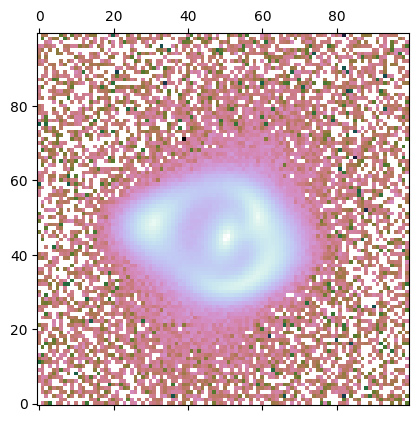

In [7]:
plt.matshow(np.log10(image_data), origin='lower', cmap='cubehelix');

## Building a lens model

Here, we build a lens model. The lens model can be thought of three
components: the lens galaxy's mass model, the lens galaxy's light model, and
the source galaxy's light model. We have to give a list of profiles for each
 component as shown in the next codecell.

The `'EPL'` lens mass profile stands for Elliptical Power Law. The form of
this convergence profile is given by:
$$\kappa(x, y) = \frac{3 - \gamma}{2} \left[ \frac{\theta_{\rm E}}{\sqrt{q
x^2 + y^2 / q}} \right]^{\gamma - 1}. $$

The position angle $\phi$ adjusts the orientation of the mass profile's
major axis. The ellipticity parameters $q$ and $\phi$ can be reformulated as
$$e_1 = \frac{1 - q}{1 + q} \cos 2\phi,$$
$$e_2 = \frac{1 - q}{1 + q} \sin 2\phi.$$

`lenstronomy` uses $e_1$ and $e_2$ instead of $q$ and $\phi$, because $e_1$
and $e_2$ are easier to handle in numerical optimization, for example, in
MCMC. You can check [here](https://github.com/lenstronomy/lenstronomy-tutorials/blob/main/Notebooks/GettingStarted/units_coordinates_parameters_definitions.ipynb) for more details on
parameter definitions and conventions used in `lenstronomy`.


Both the lens galaxy's and the source galaxy's light profiles are modeled
with Sersic function, which is given by:

$$I(x, y) = I_{\rm e} \exp \left[ -b_{n} \left\{ \left( \frac{\sqrt{q x^2
+ y^2/q}}{R_{\rm Sersic}} \right)^{1/n_{\rm Sersic}} - 1 \right\}
\right].$$

In [8]:
lens_model_list = ['EPL']
source_model_list = ['SERSIC_ELLIPSE'] # beta, n_max, center_x, center_y
lens_light_model_list = ['SERSIC_ELLIPSE']

In this cell below, we have to specify the initial values, upper and lower
limits for the model parameters specific to each of the model components
specified in the above lists. The `kwargs_*_sigma` dictionaries/lists are
used to set the initial size of the search area within particle swarm
optimization (PSO) or MCMC.

In [9]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({})
kwargs_lens_init.append({'theta_E': 1., 'gamma': 2., 'e1': 0., 'e2': 0.,
                         'center_x': 0., 'center_y': 0.})

kwargs_lens_sigma.append({'theta_E': .2, 'gamma': .1, 'e1': 0.05, 'e2': 0.05,
                         'center_x': 0.5, 'center_y': 0.5})

kwargs_lower_lens.append({'theta_E': 0.01, 'gamma': 1., 'e1': -0.5,
                          'e2': -0.5, 'center_x': -10, 'center_y': -10})

kwargs_upper_lens.append({'theta_E': 10., 'gamma': 3., 'e1': 0.5, 'e2': 0.5,
                          'center_x': 10, 'center_y': 10})


lens_params = [kwargs_lens_init, kwargs_lens_sigma, fixed_lens, kwargs_lower_lens, kwargs_upper_lens]


# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({'n_sersic': 4.})
kwargs_lens_light_init.append({'R_sersic': 0.5, 'n_sersic': 2, 'e1': 0, 'e2': 0, 'center_x': 0., 'center_y': 0, 'amp': 16})
kwargs_lens_light_sigma.append({'n_sersic': 1, 'R_sersic': 0.3, 'e1': 0.05, 'e2': 0.05, 'center_x': 0.1, 'center_y': 0.1, 'amp': 10})
kwargs_lower_lens_light.append({'e1': -0.5, 'e2': -0.5, 'R_sersic': 0.001, 'n_sersic': .5, 'center_x': -10, 'center_y': -10, 'amp': 0})
kwargs_upper_lens_light.append({'e1': 0.5, 'e2': 0.5, 'R_sersic': 10, 'n_sersic': 5., 'center_x': 10, 'center_y': 10, 'amp': 100})

joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [kwargs_lens_light_init, kwargs_lens_light_sigma, fixed_lens_light, kwargs_lower_lens_light, kwargs_upper_lens_light]


# source galaxy's light model
fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({'n_sersic': 1.})

kwargs_source_init.append({'R_sersic': 0.2, 'n_sersic': 1, 'e1': 0, 'e2': 0, 'center_x': 0., 'center_y': 0, 'amp': 16})

kwargs_source_sigma.append({'n_sersic': 0.5, 'R_sersic': 0.1, 'e1': 0.05, 'e2': 0.05, 'center_x': 0.2, 'center_y': 0.2,
                            'amp': 10})

kwargs_lower_source.append({'e1': -0.5, 'e2': -0.5, 'R_sersic': 0.001, 'n_sersic': .5, 'center_x': -10, 'center_y': -10,
                            'amp': 0})

kwargs_upper_source.append({'e1': 0.5, 'e2': 0.5, 'R_sersic': 10, 'n_sersic': 5., 'center_x': 10, 'center_y': 10,
                            'amp': 100})

source_params = [kwargs_source_init, kwargs_source_sigma, fixed_source, kwargs_lower_source, kwargs_upper_source]


# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {'lens_model': lens_params,
                 'source_model': source_params,
                 'lens_light_model': lens_light_params}

kwargs_constraints = {'joint_lens_with_light': joint_lens_with_light}

#### Numerical settings

No need to change anything here for now. It's also fine to not
understand these settings for now.

In [10]:
kwargs_likelihood = {'check_bounds': True}

kwargs_numerics = {'supersampling_factor': 1,
                   'supersampling_convolution': False
                   }

#### Combining all the information to be sent to lenstronomy

In [11]:
kwargs_model = {'lens_model_list': lens_model_list,
                'source_light_model_list': source_model_list,
                'lens_light_model_list': lens_light_model_list}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {'multi_band_list': multi_band_list,
                     'multi_band_type': 'single-band'
                     # 'multi-linear': every imaging band has independent solutions of the surface brightness, 'joint-linear': there is one joint solution of the linear coefficients demanded across the bands.
                    }

## Here the model fiting is done

In [12]:
from lenstronomy.Workflow.fitting_sequence import FittingSequence


fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params)

fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 200,
                                'n_iterations': 100}],
                       #['MCMC', {'n_burn': 200, 'n_run': 600, 'n_walkers':
                       # 200, 'sigma_scale': .1}]
        ]

chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lenstronomy\LensModel\Profiles\epl.py:284: RuntimeWarning: invalid value encountered in divide
  R_omega = Z*hyp2f1(1, t/2, 2-t/2, -(1-q)/(1+q)*(Z/Z.conj()))


Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
Max iteration reached! Stopping.
-1.0132563825996037 reduced X^2 of best position
-5059.189118319821 log likelihood
9986 effective number of data points
[{'theta_E': 0.7328347923551196, 'gamma': 1.9057179095660575, 'e1': -0.17340142589070376, 'e2': -0.1559951234719886, 'center_x': -0.024546243478952744, 'center_y': -0.2729537961787805}] lens result
[{'amp': 1, 'R_sersic': 0.14066172350235653, 'n_sersic': 1.0, 'e1': 0.31886951277312653, 'e2': 0.0007528856112254858, 'center_x': 0.177726093398238, 'center_y': -0.27247423219036115}] source result
[{'amp': 1, 'R_sersic': 0.4507056964769794, 'n_sersic': 4.0, 'e1': -0.17340142589070376, 'e2': -0.1559951234719886, 'center_x': -0.024546243478952744, 'center_y': -0.2729537961787805}] lens light result
[] point source result
{} special param result
217.40868282318115 time used for  PSO


## Visualizing the fitted model

-1.0118378236639642 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0118378236639642


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lenstronomy\Plots\model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
C:\Users\user\AppData\Local\Temp\ipykernel_8436\2155025866.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


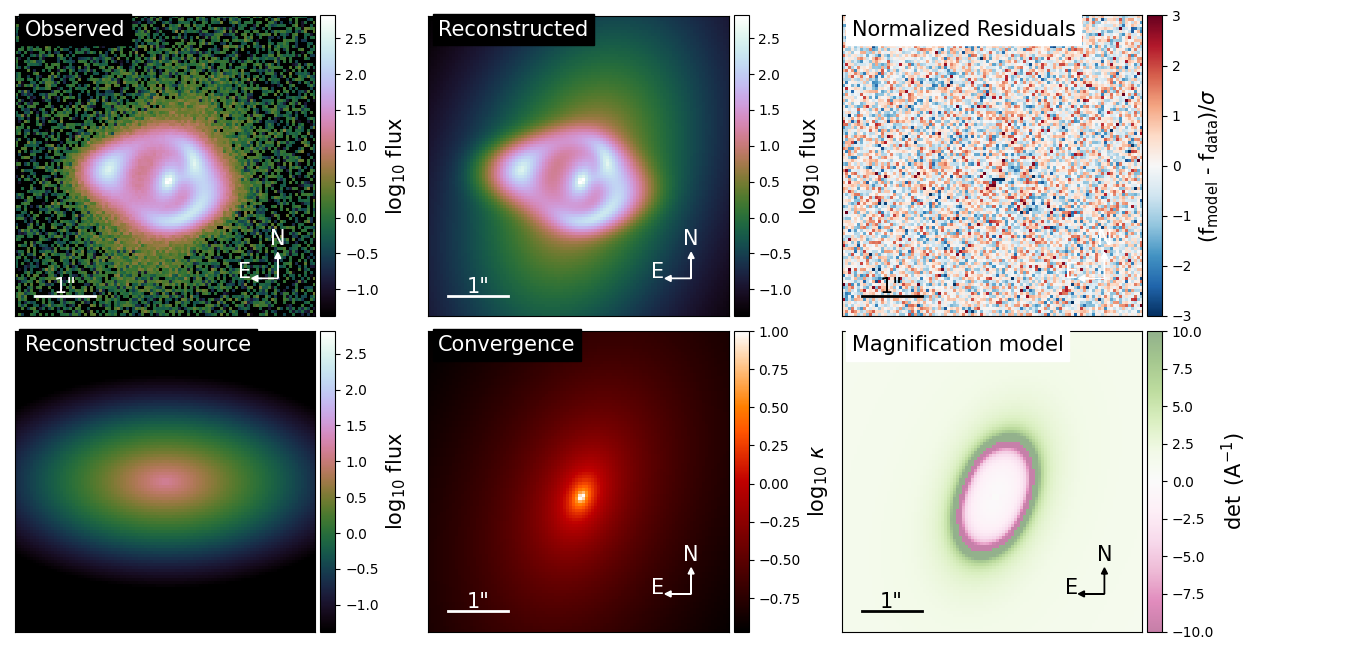

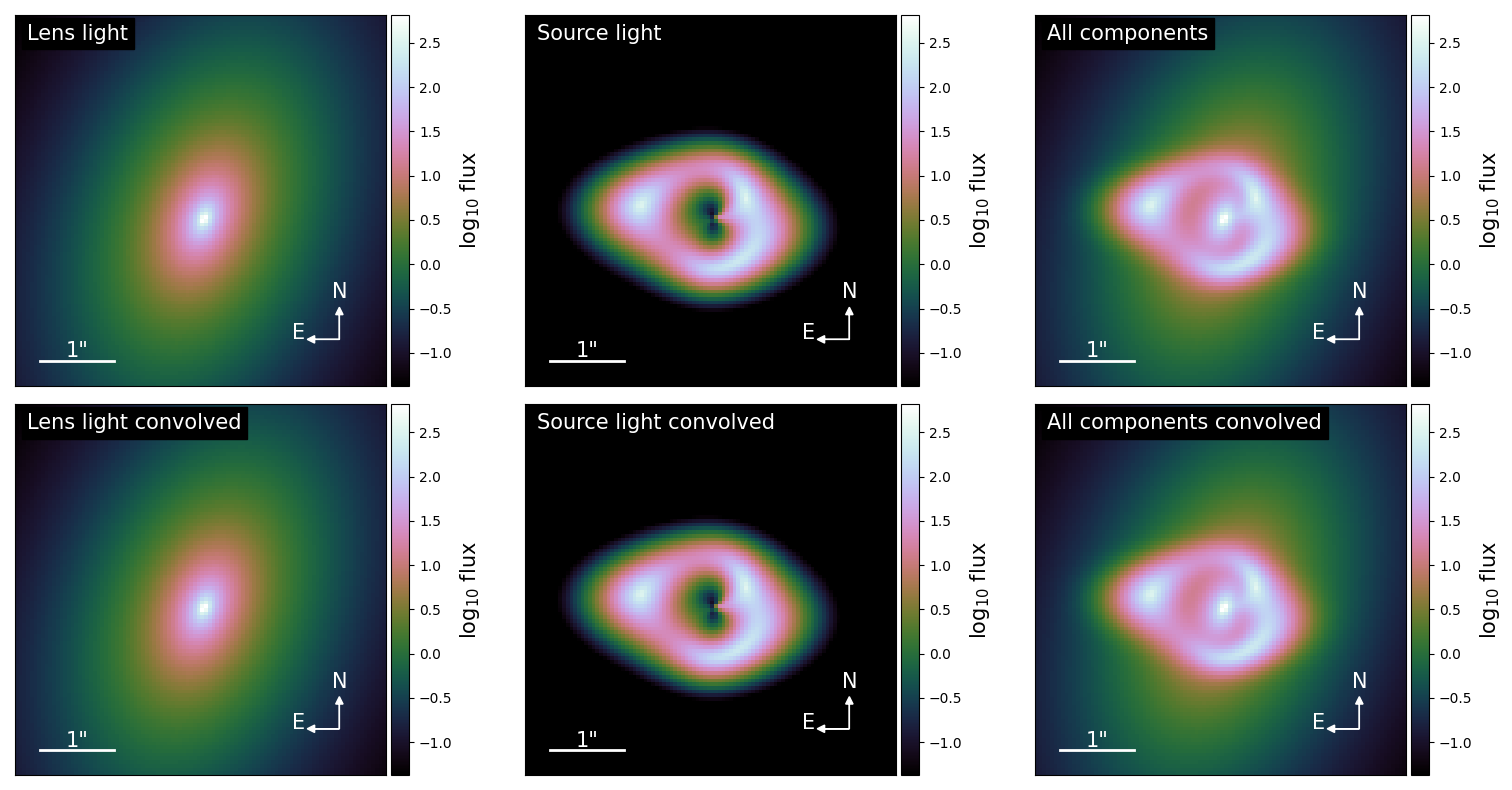

{'kwargs_lens': [{'theta_E': 0.7328347923551196, 'gamma': 1.9057179095660575, 'e1': -0.17340142589070376, 'e2': -0.1559951234719886, 'center_x': -0.024546243478952744, 'center_y': -0.2729537961787805}], 'kwargs_source': [{'amp': 1, 'R_sersic': 0.14066172350235653, 'n_sersic': 1.0, 'e1': 0.31886951277312653, 'e2': 0.0007528856112254858, 'center_x': 0.177726093398238, 'center_y': -0.27247423219036115}], 'kwargs_lens_light': [{'amp': 1, 'R_sersic': 0.4507056964769794, 'n_sersic': 4.0, 'e1': -0.17340142589070376, 'e2': -0.1559951234719886, 'center_x': -0.024546243478952744, 'center_y': -0.2729537961787805}], 'kwargs_ps': [], 'kwargs_special': {}, 'kwargs_extinction': []}


In [13]:
from lenstronomy.Plots.model_plot import ModelPlot

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02,
                      cmap_string="cubehelix",
                      )

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-3, v_max=3,
                                   cmap='RdBu_r')
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1, cmap='gist_heat')
modelPlot.magnification_plot(ax=axes[1, 2], cmap='PiYG')
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()
print(kwargs_result)

#### visualizing the MCMC chain, if run

In [16]:
if len(chain_list) > 1:
    sampler_type, samples_mcmc, param_mcmc, dist_mcmc  = chain_list[1]

    param_class = fitting_seq.param_class

    print("number of non-linear parameters in the MCMC process: ", len(param_mcmc))
    print("parameters in order: ", param_mcmc)
    print("number of evaluations in the MCMC process: ", np.shape(samples_mcmc)[0])
    n_sample = len(samples_mcmc)
    print(n_sample)
    samples_mcmc_cut = samples_mcmc[int(n_sample*1/2.):]
    if not samples_mcmc == []:
        n, num_param = np.shape(samples_mcmc_cut)
        plot = corner.corner(samples_mcmc_cut[:,:], labels=param_mcmc[:], show_titles=True)